In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "1"
!echo $CUDA_VISIBLE_DEVICES

0


In [2]:
import sys
sys.path.insert(0, "../")

import os
os.chdir("../")

In [3]:
from examples.dw4 import *
import target.double_well as dw4
from examples.train import plot_sample_hist, eval_fn
import yaml
import matplotlib.pyplot as plt

/scratch/lim24/augmented-equivariant-flows/examples/train.py:10: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm
2023-02-06 14:47:54.596634: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-02-06 14:47:54.596712: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-02-06 14:47:54.596719: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.

In [4]:
USE_64_BIT = False
if USE_64_BIT:
    from jax.config import config
    config.update("jax_enable_x64", True)

In [5]:
cfg = DictConfig(yaml.safe_load(open("examples/config/dw4.yaml")))
cfg

{'hydra': {'job': {'chdir': False}}, 'flow': {'dim': 2, 'nodes': 4, 'n_layers': 4, 'identity_init': True, 'type': 'proj_v2', 'kwargs': {'proj_v2': {'gram_schmidt': False}}, 'fast_compile': True, 'compile_n_unroll': 1, 'egnn': {'emile_net': False, 'mlp_units': [32, 32], 'n_layers': 3, 'normalize_by_norms': True, 'variance_scaling_init': 0.001, 'tanh': False, 'agg': 'mean', 'phi_x_max': 1.0, 'h': {'linear_softmax': True, 'share_h': True}}, 'transformer': {'mlp_units': [32, 32], 'num_heads': 3, 'key_size': 4, 'w_init_scale': 0.1, 'n_layers': 3}}, 'training': {'lr': '1e-3', 'n_epoch': 50, 'batch_size': 100, 'plot_batch_size': 256, 'max_global_norm': None, 'seed': 0, 'reload_aug_per_epoch': True, 'train_set_size': 1000, 'test_set_size': 1000, 'n_plots': 6, 'n_checkpoints': 0, 'n_eval': 10, 'K_marginal_log_lik': 20, 'save': True, 'save_dir': 'dw4_results'}, 'logger': {'wandb': {'name': 'dw4_${flow.type}', 'project': 'fab', 'entity': 'flow-ais-bootstrap', 'tags': ['dw4']}}}

In [6]:
cfg.training.lr = 4e-4
cfg.flow.egnn.mlp_units = (16,)
cfg.flow.n_layers = 2 # Small number of layers

cfg.flow.transformer.mlp_units = (16,)
cfg.flow.transformer.n_layers = 3
cfg.flow.transformer.num_heads = 3
cfg.flow.transformer.key_size =  4


cfg.flow.egnn.n_layers = 3
cfg.training.batch_size = 100
cfg.training.n_epoch = 100
cfg.training.save = False
cfg.training.plot_batch_size = 128
cfg.logger = DictConfig({"list_logger": None})
cfg.flow.type= "proj_v2"

training data size of 1000


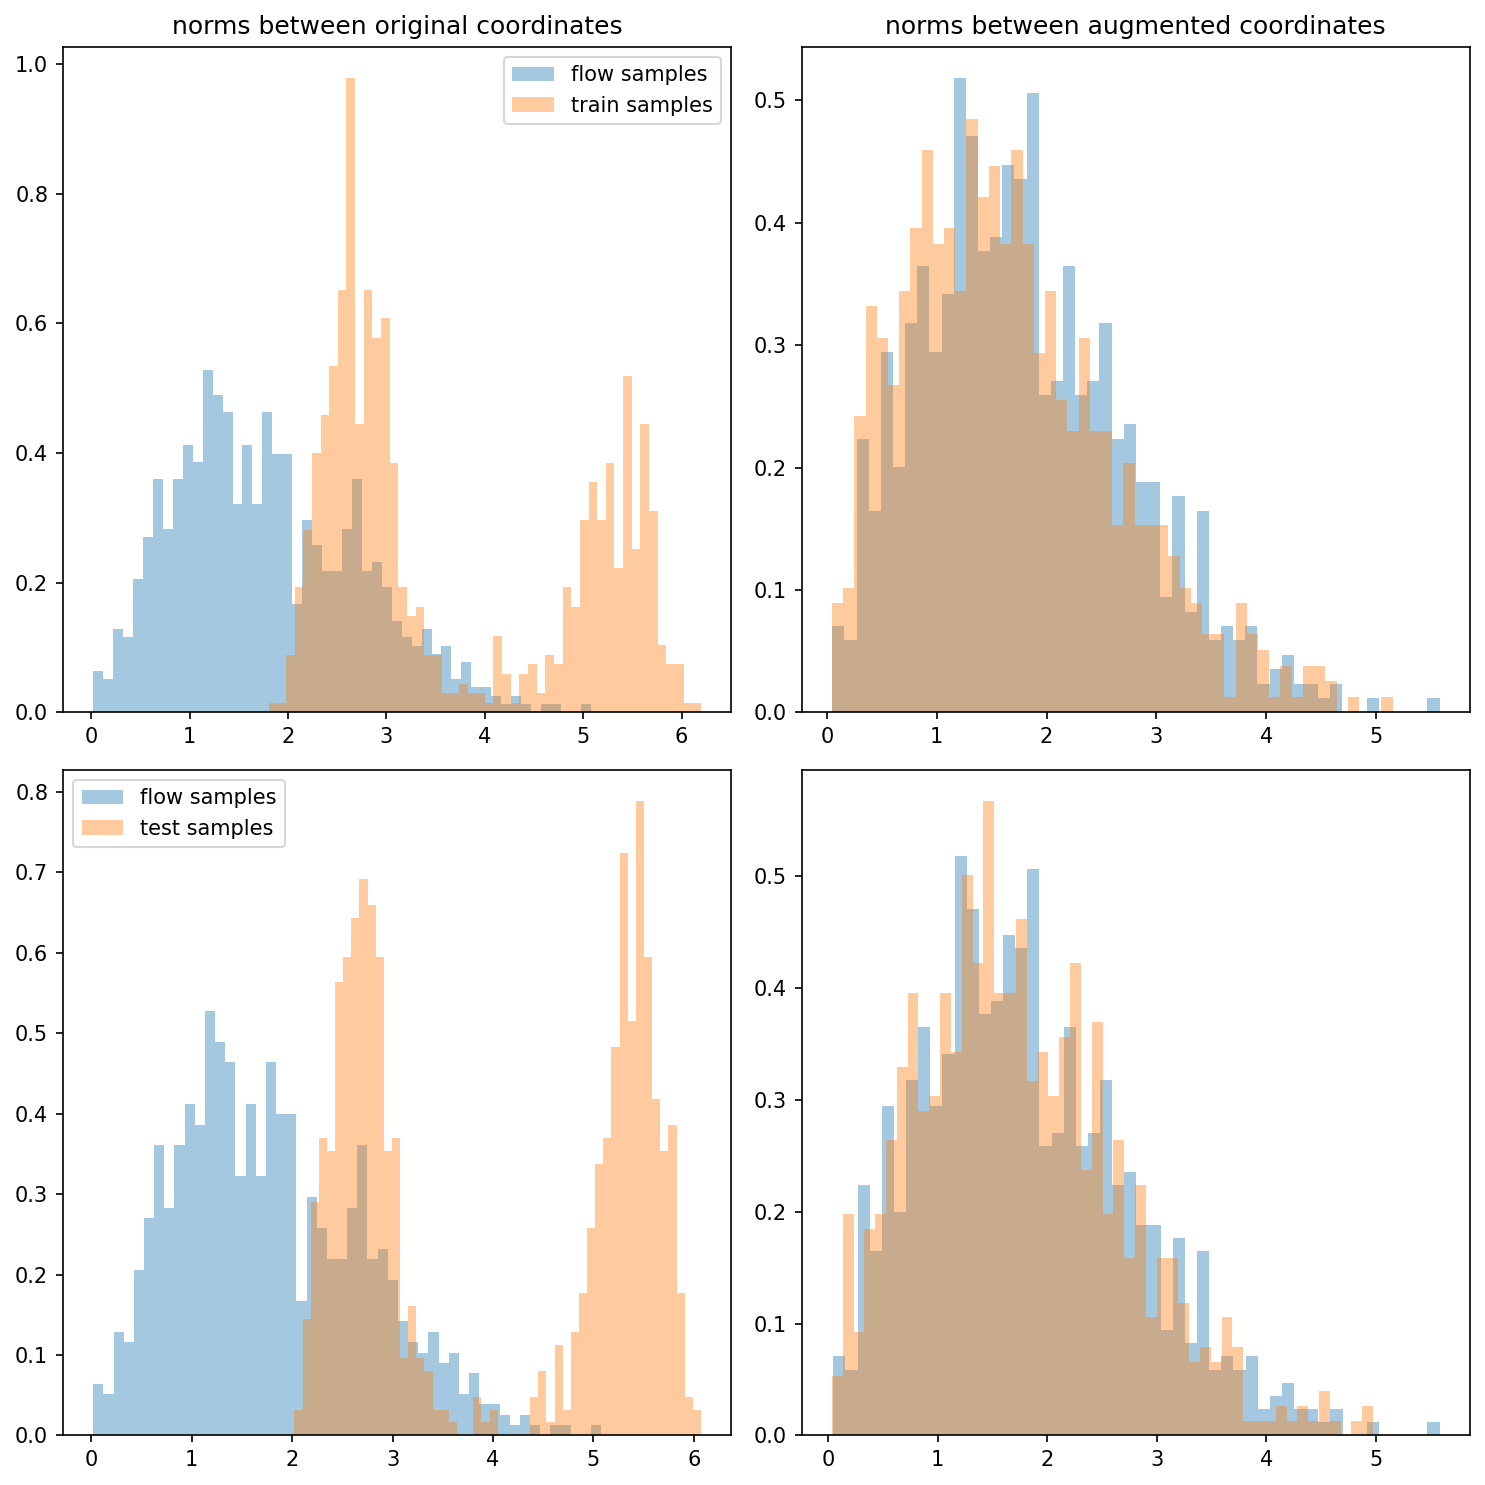

  0%|                                                                                                                                                                              | 0/100 [00:00<?, ?it/s]

non numeric history values being saved


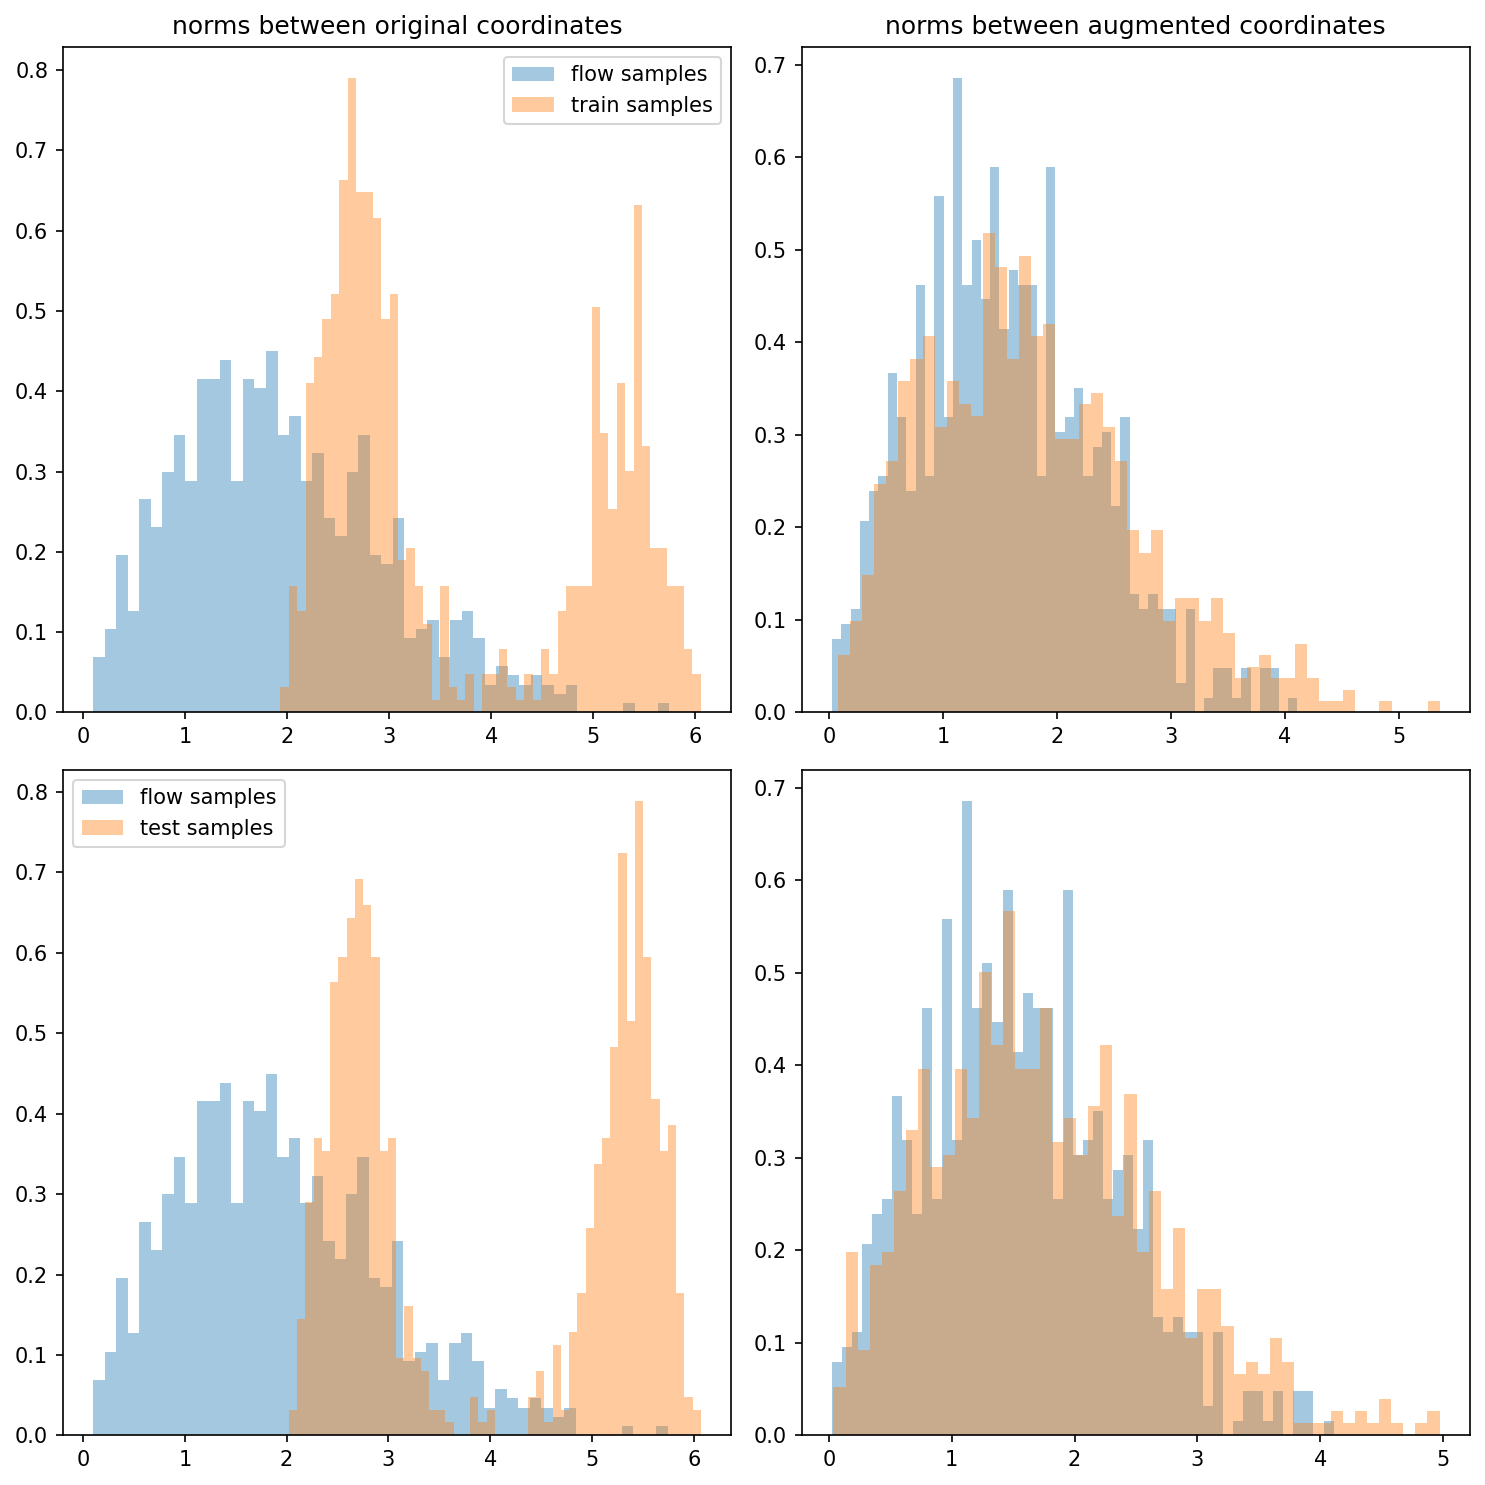

  1%|█▋                                                                                                                                                                    | 1/100 [00:33<55:04, 33.38s/it]

{'eval_log_lik': Array(-25.578993, dtype=float32), 'eval_marginal_log_lik': Array(-15.246836, dtype=float32)}


 12%|███████████████████▊                                                                                                                                                 | 12/100 [00:35<00:34,  2.55it/s]

{'eval_log_lik': Array(-22.942102, dtype=float32), 'eval_marginal_log_lik': Array(-12.585809, dtype=float32)}


 19%|███████████████████████████████▎                                                                                                                                     | 19/100 [00:36<00:16,  4.98it/s]

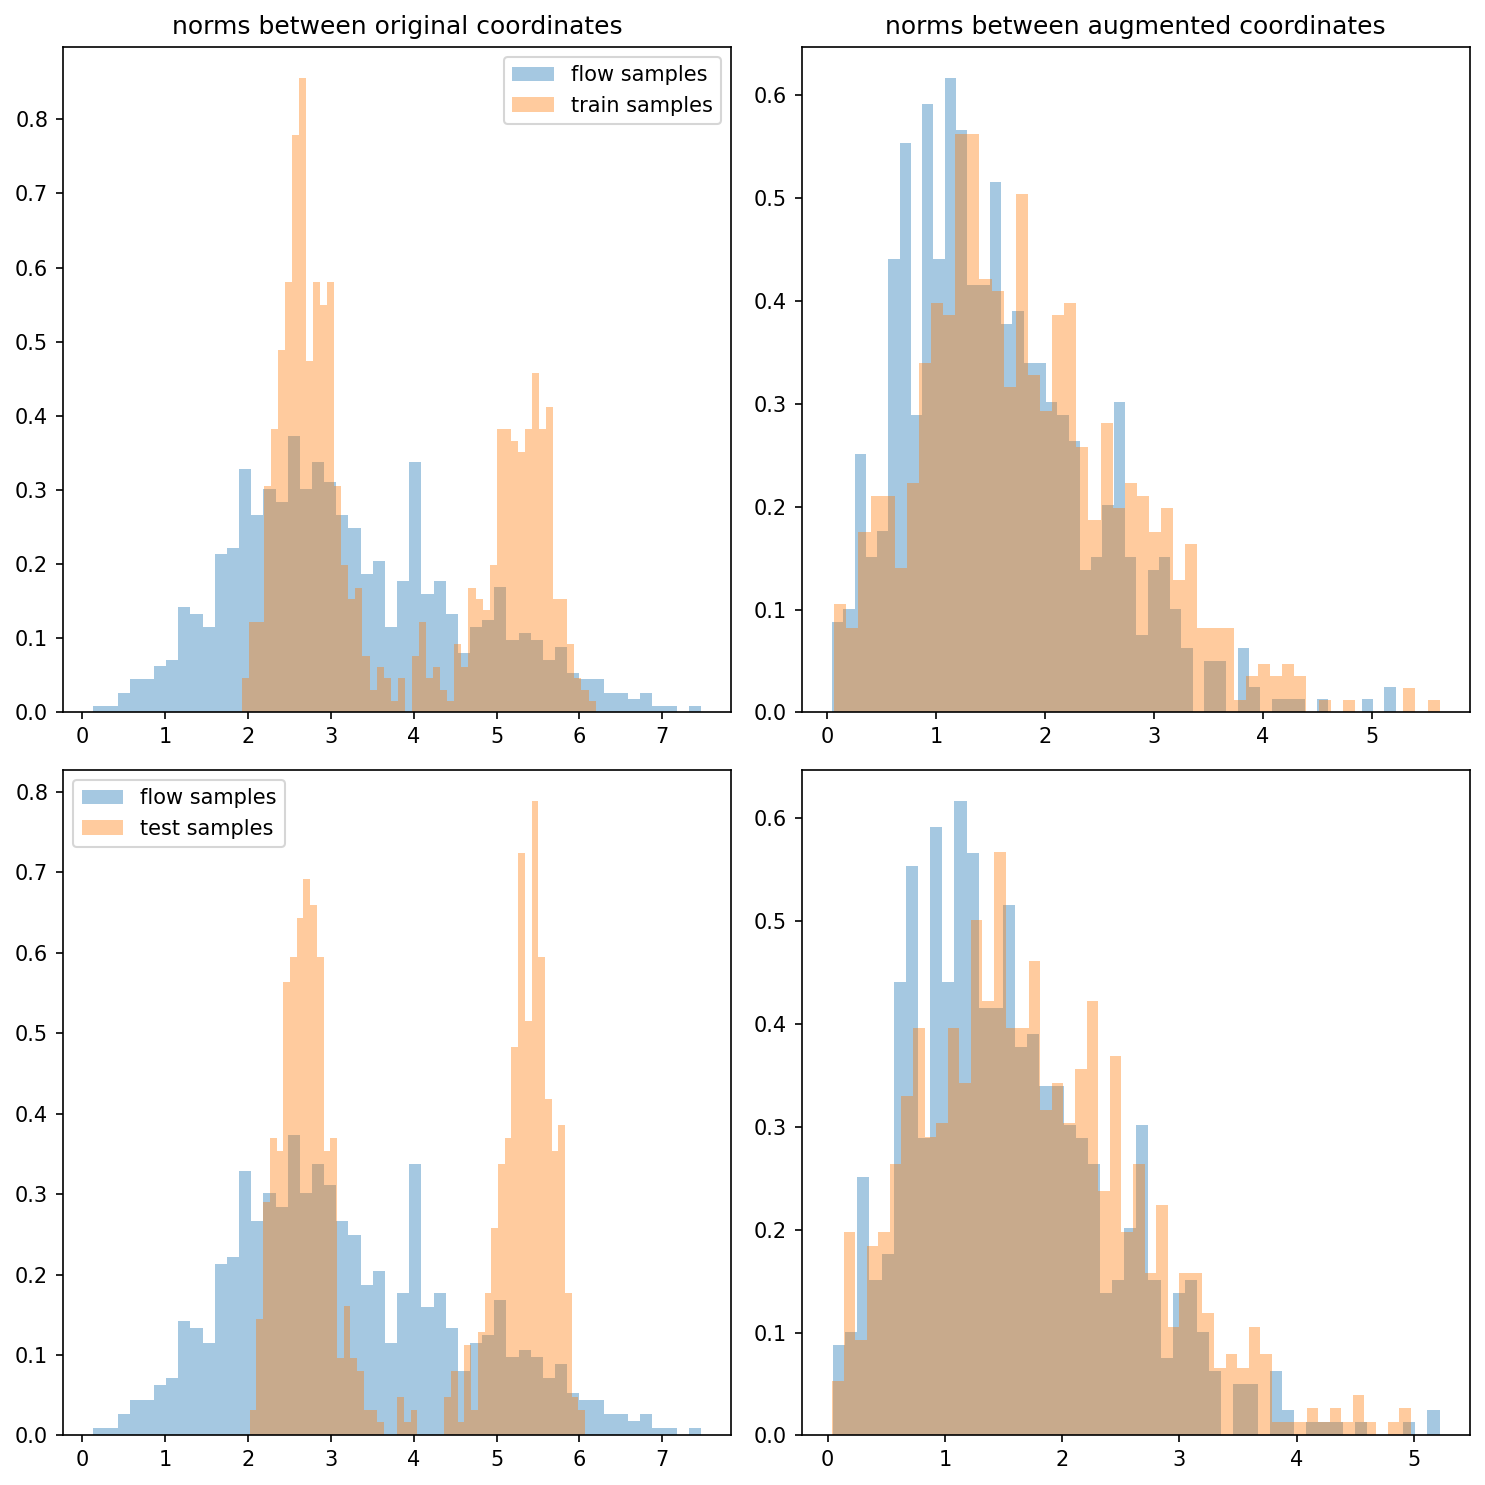

 24%|███████████████████████████████████████▌                                                                                                                             | 24/100 [00:40<00:28,  2.70it/s]

{'eval_log_lik': Array(-22.22898, dtype=float32), 'eval_marginal_log_lik': Array(-11.87514, dtype=float32)}


 35%|█████████████████████████████████████████████████████████▋                                                                                                           | 35/100 [00:42<00:12,  5.19it/s]

{'eval_log_lik': Array(-22.01311, dtype=float32), 'eval_marginal_log_lik': Array(-11.597623, dtype=float32)}


 39%|████████████████████████████████████████████████████████████████▎                                                                                                    | 39/100 [00:42<00:11,  5.41it/s]

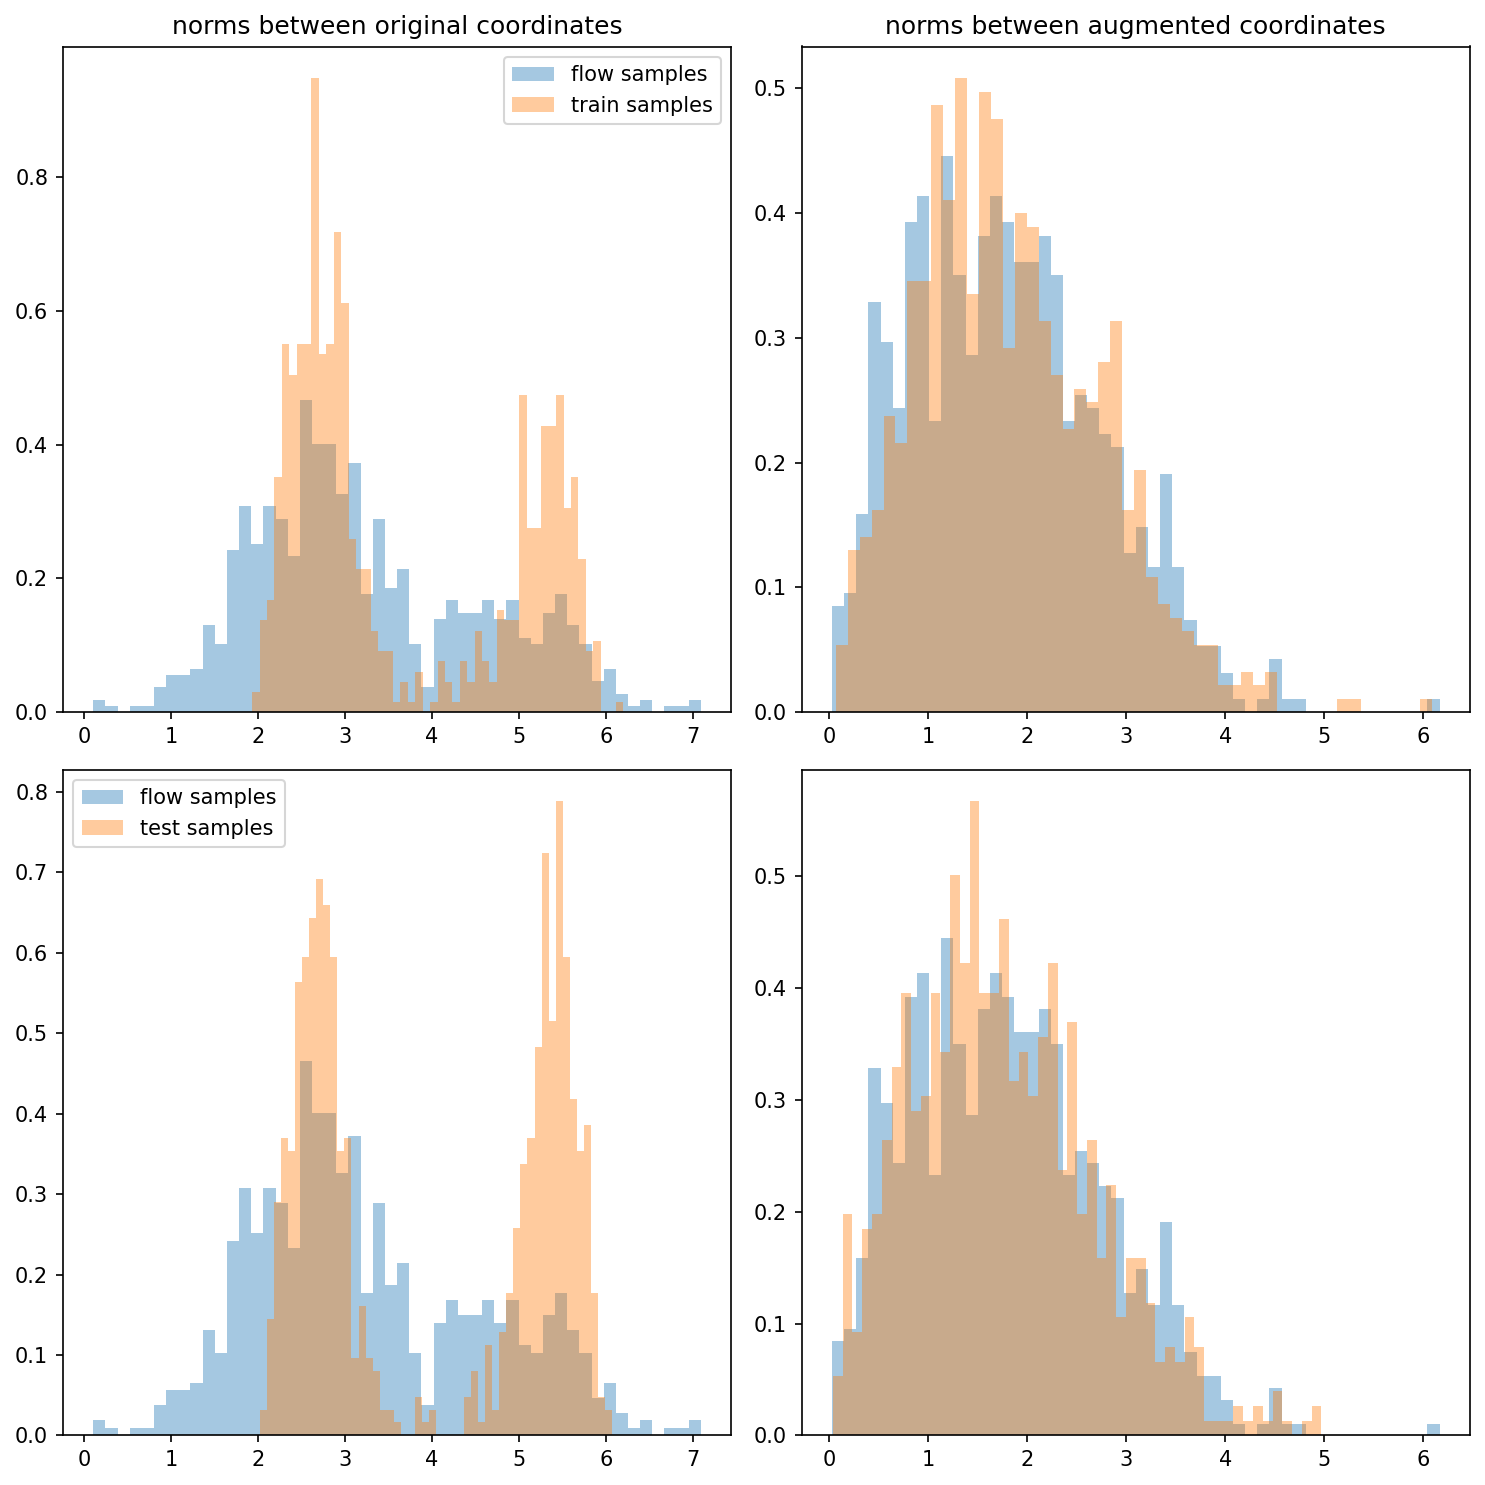

 46%|███████████████████████████████████████████████████████████████████████████▉                                                                                         | 46/100 [00:46<00:14,  3.73it/s]

{'eval_log_lik': Array(-21.763187, dtype=float32), 'eval_marginal_log_lik': Array(-11.4161005, dtype=float32)}


 57%|██████████████████████████████████████████████████████████████████████████████████████████████                                                                       | 57/100 [00:48<00:08,  5.25it/s]

{'eval_log_lik': Array(-22.118673, dtype=float32), 'eval_marginal_log_lik': Array(-11.837497, dtype=float32)}


 59%|█████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                   | 59/100 [00:48<00:07,  5.37it/s]

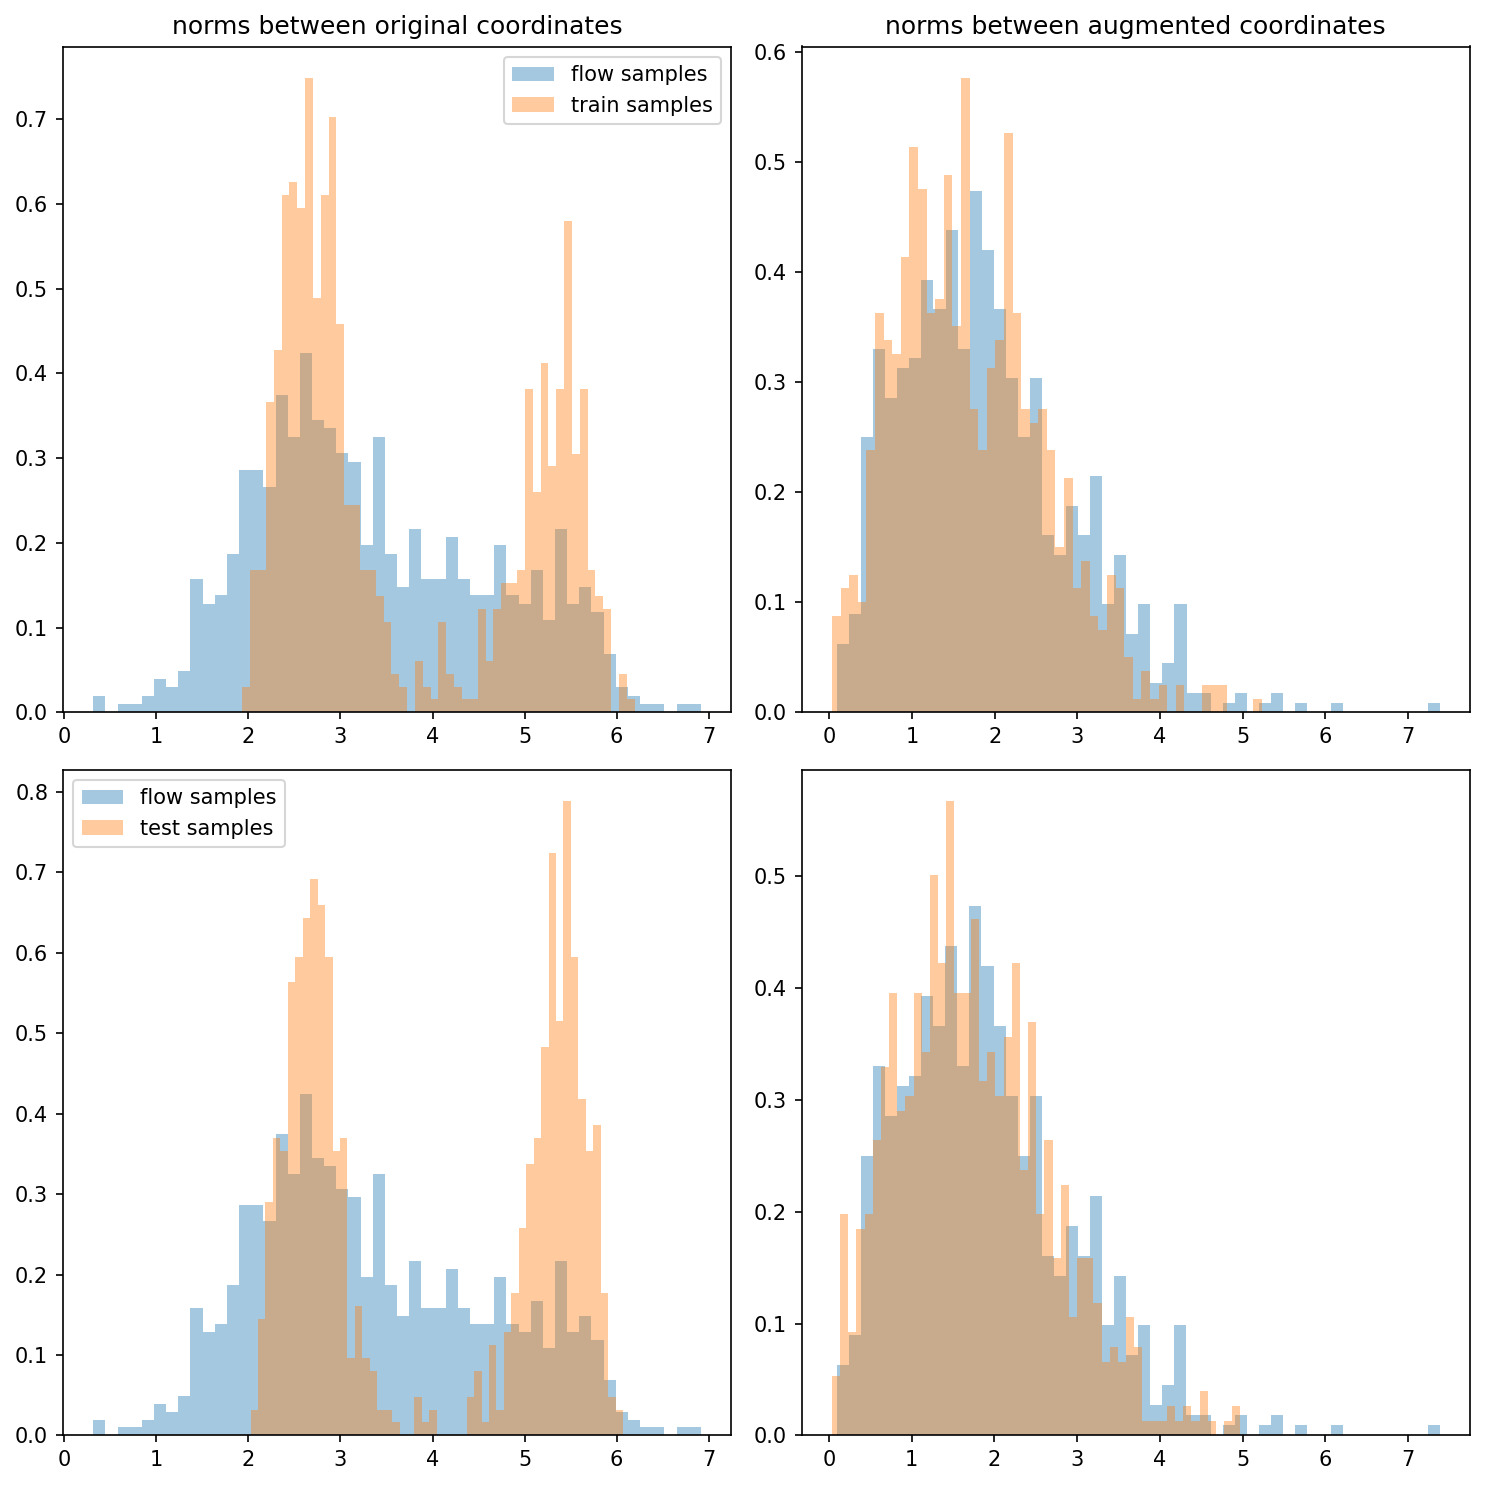

 68%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                    | 68/100 [00:52<00:07,  4.40it/s]

{'eval_log_lik': Array(-22.703407, dtype=float32), 'eval_marginal_log_lik': Array(-12.339229, dtype=float32)}


 79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                  | 79/100 [00:54<00:03,  5.27it/s]

{'eval_log_lik': Array(-22.515892, dtype=float32), 'eval_marginal_log_lik': Array(-12.182655, dtype=float32)}


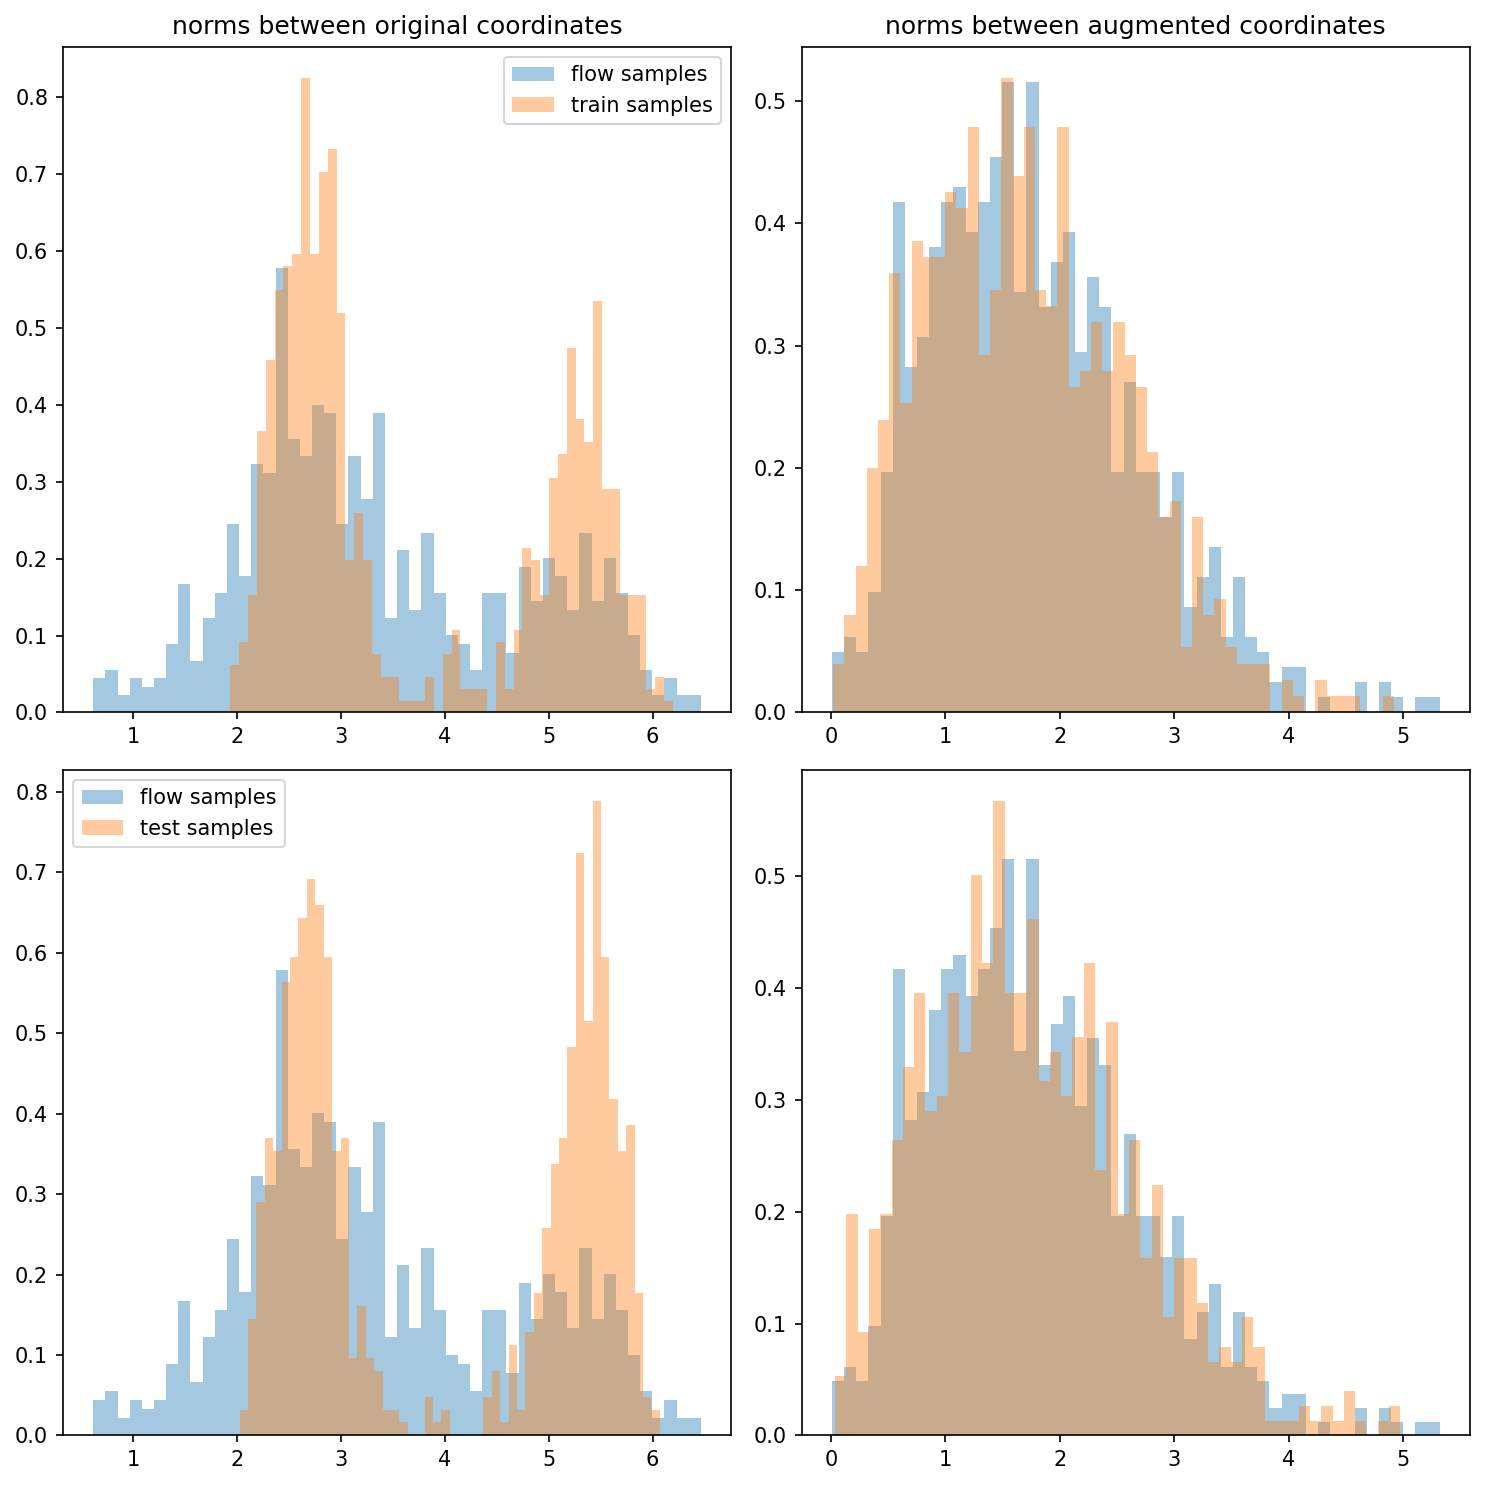

 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                | 90/100 [00:58<00:02,  4.82it/s]

{'eval_log_lik': Array(-22.932848, dtype=float32), 'eval_marginal_log_lik': Array(-12.670759, dtype=float32)}


 99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎ | 99/100 [01:00<00:00,  5.44it/s]

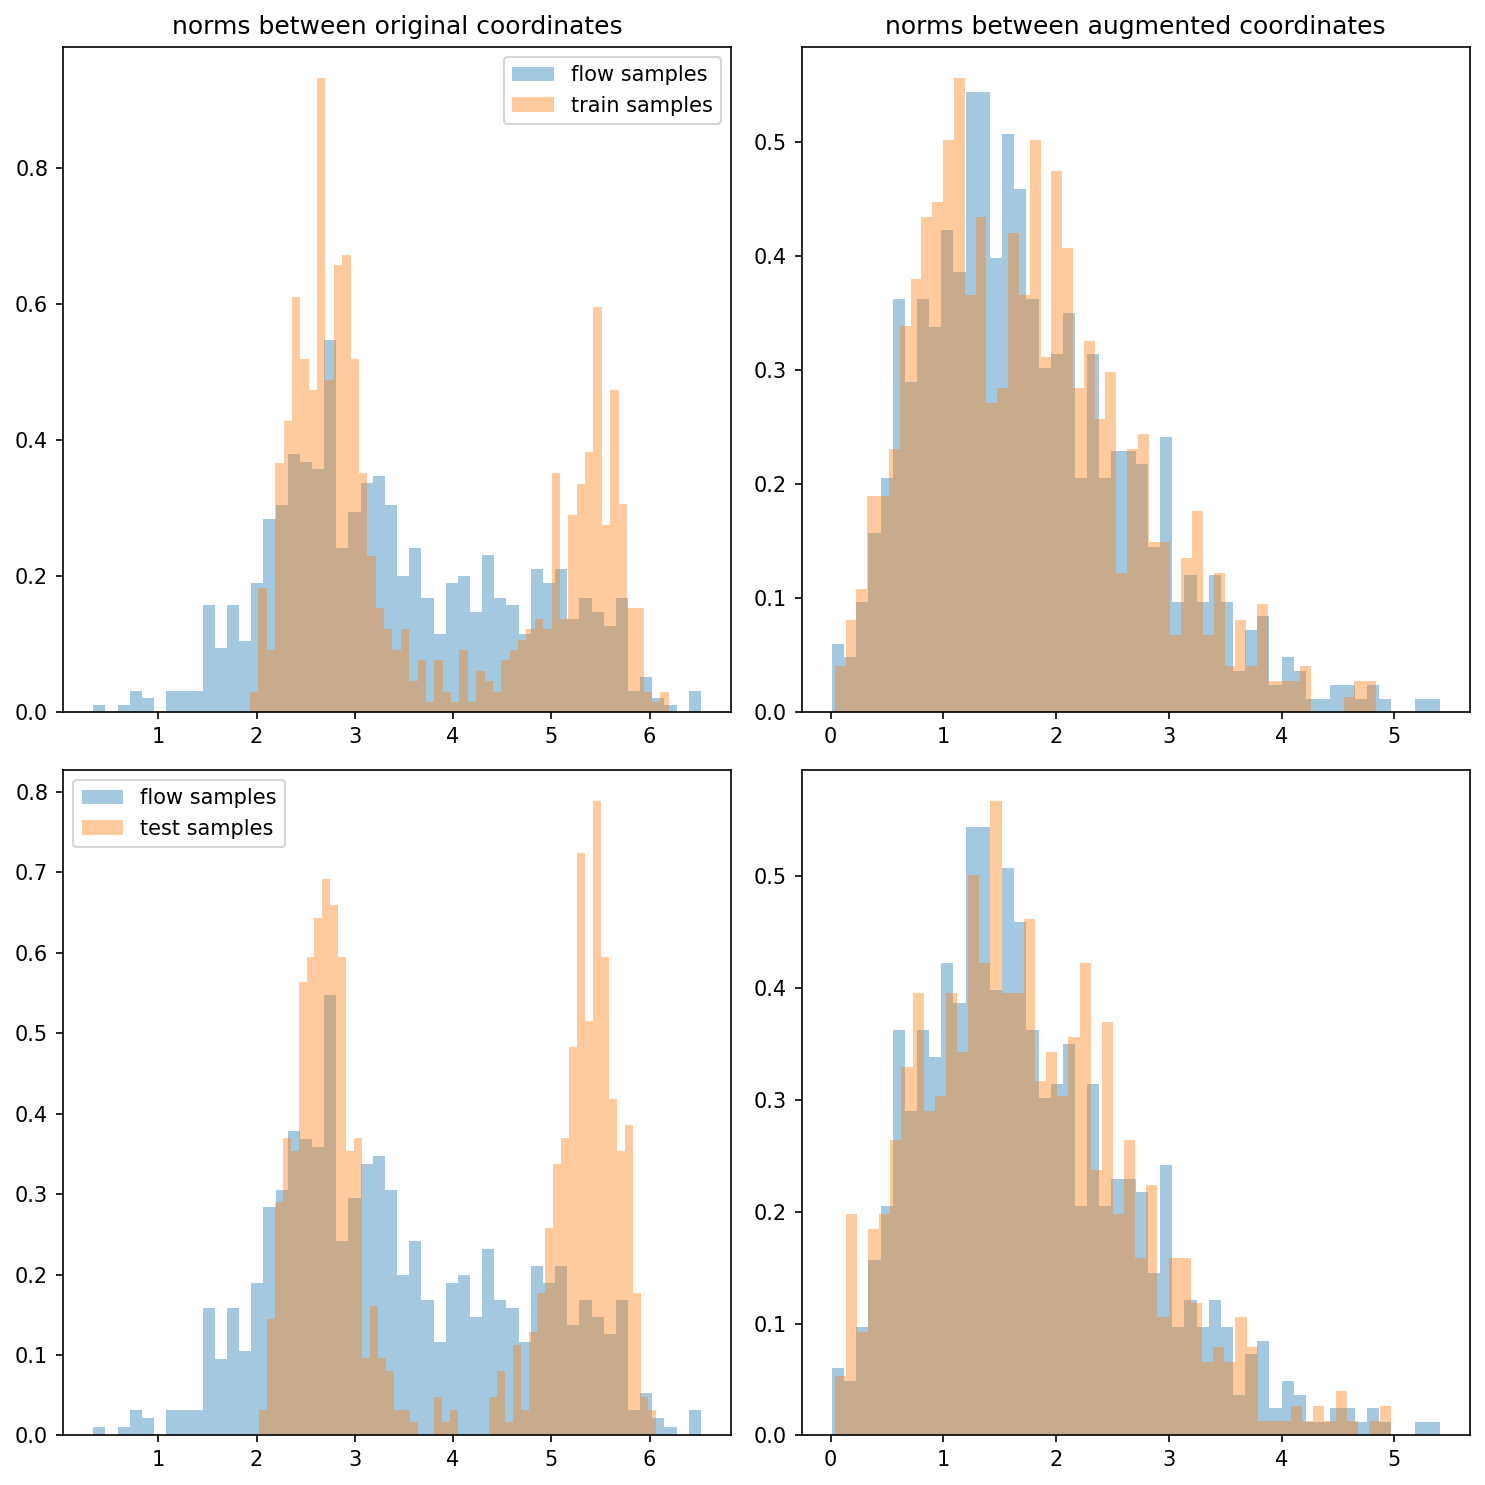

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [01:03<00:00,  1.58it/s]


{'eval_log_lik': Array(-22.862232, dtype=float32), 'eval_marginal_log_lik': Array(-12.512271, dtype=float32)}


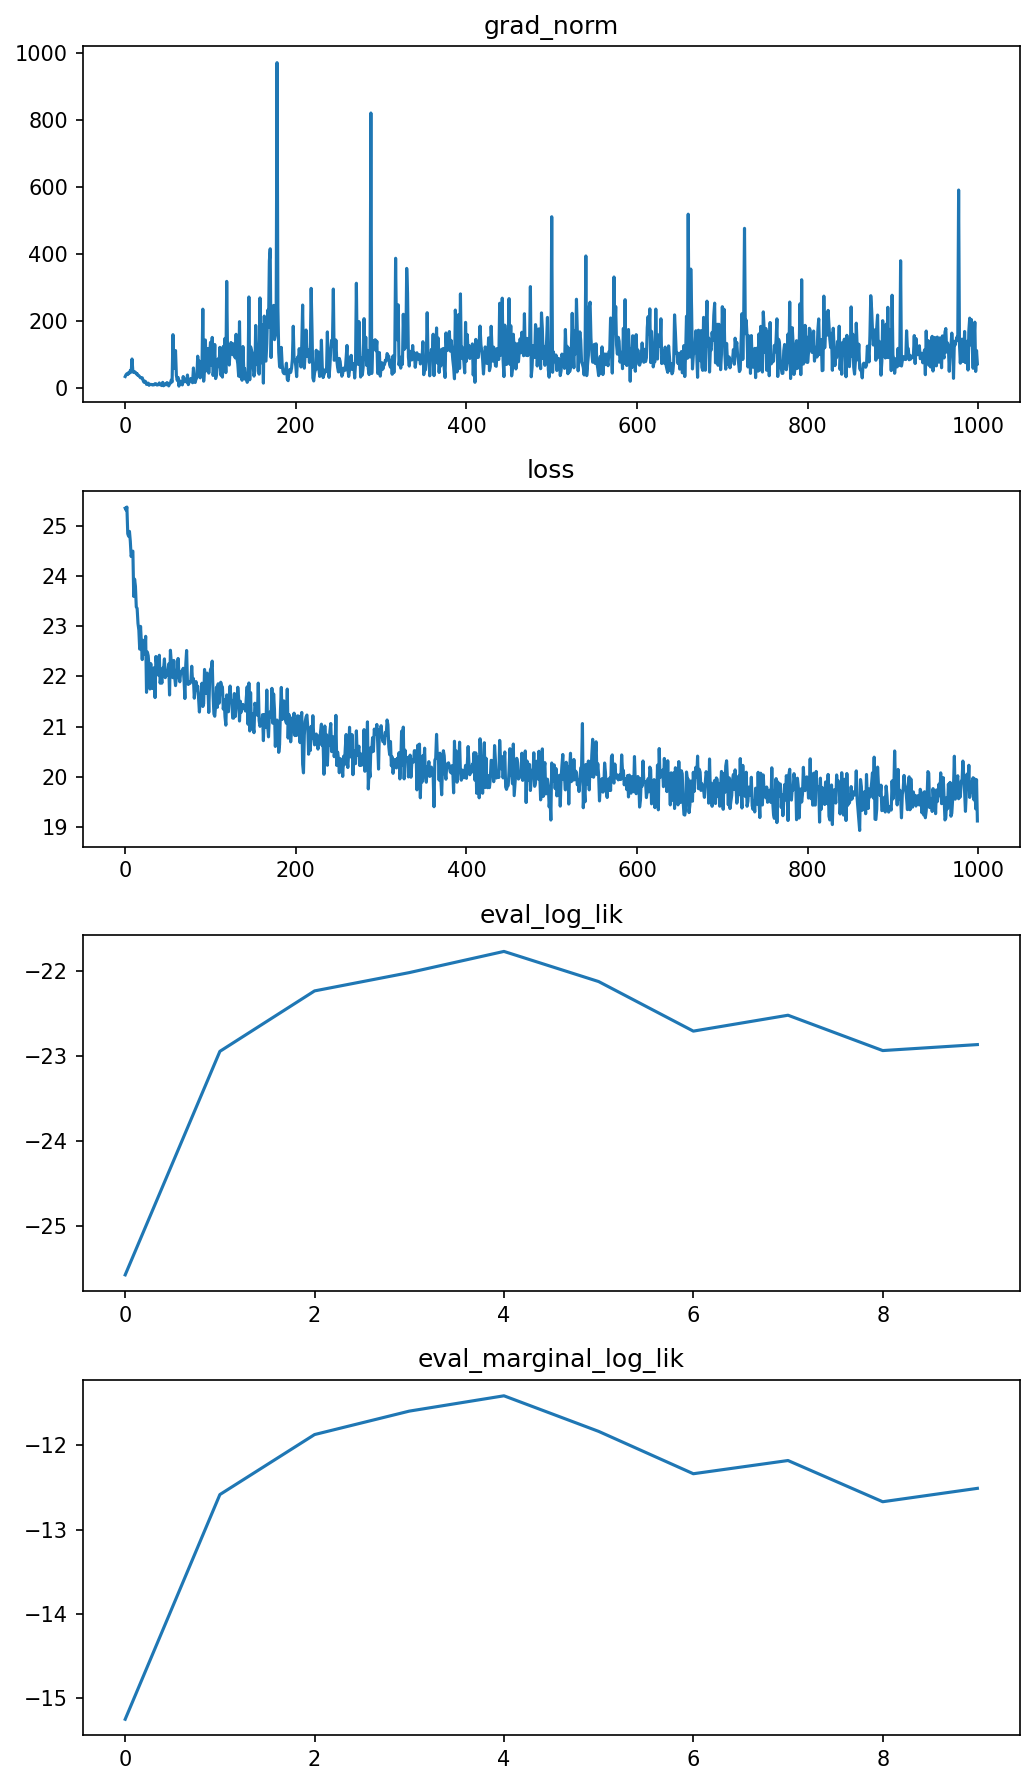

In [7]:
experiment_config = create_train_config(cfg, dim=2, n_nodes=4,
                                        load_dataset=load_dataset)

logger, params, log_prob_fn, sample_and_log_prob_fn = train(experiment_config)



In [8]:
train_data, test_data = load_dataset(batch_size=cfg.training.batch_size, train_set_size=1000, test_set_size=1000)
x = sample_and_log_prob_fn.apply(params, jax.random.PRNGKey(1), (512,))[0]

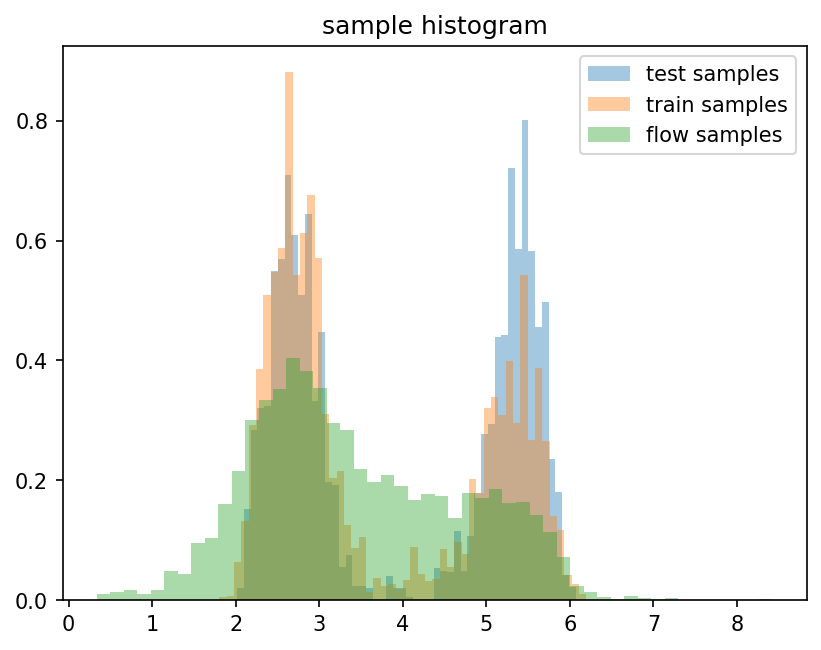

In [9]:
fig, axs = plt.subplots()
plot_sample_hist(test_data, axs, original_coords=True, label='test samples')
plot_sample_hist(train_data, axs, original_coords=True, label='train samples')
plot_sample_hist(x, axs, original_coords=True, label='flow samples')
axs.set_title("sample histogram")
axs.legend()

In [10]:
eval_fn(params=params, x=test_data, flow_log_prob_fn=log_prob_fn,
                                flow_sample_and_log_prob_fn=sample_and_log_prob_fn,
                                target_log_prob=dw4.log_prob_fn,
                                key=jax.random.PRNGKey(1), batch_size=cfg.training.batch_size,
                                K=50)

{'ess': Array(0.07062006, dtype=float32),
 'eval_kl': Array(-299.42133, dtype=float32),
 'eval_log_lik': Array(-22.862232, dtype=float32),
 'eval_marginal_log_lik': Array(-12.145434, dtype=float32)}

# Smaller transformer

In [11]:
cfg.flow.transformer.mlp_units = (4,)

training data size of 1000


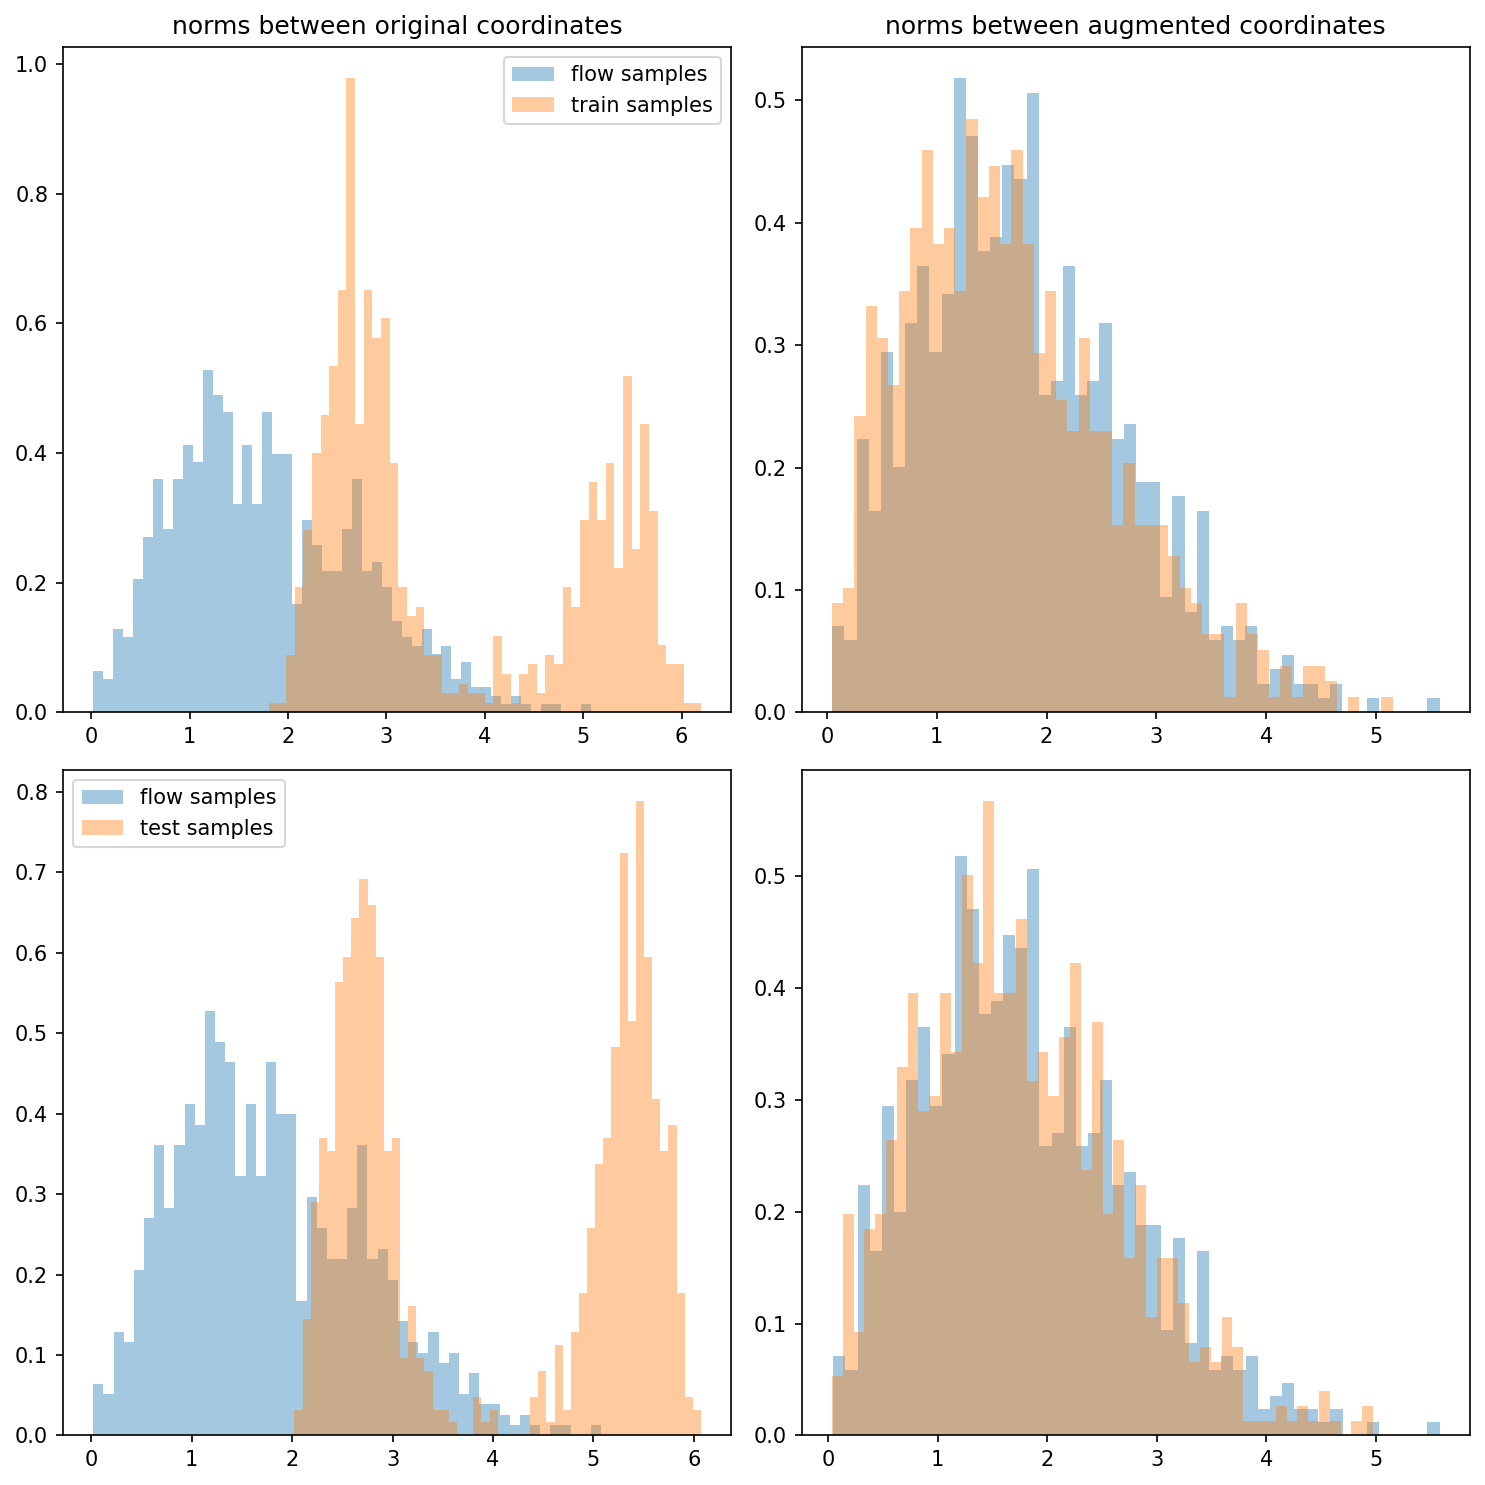

  0%|                                                                                                                                                                              | 0/100 [00:00<?, ?it/s]

non numeric history values being saved


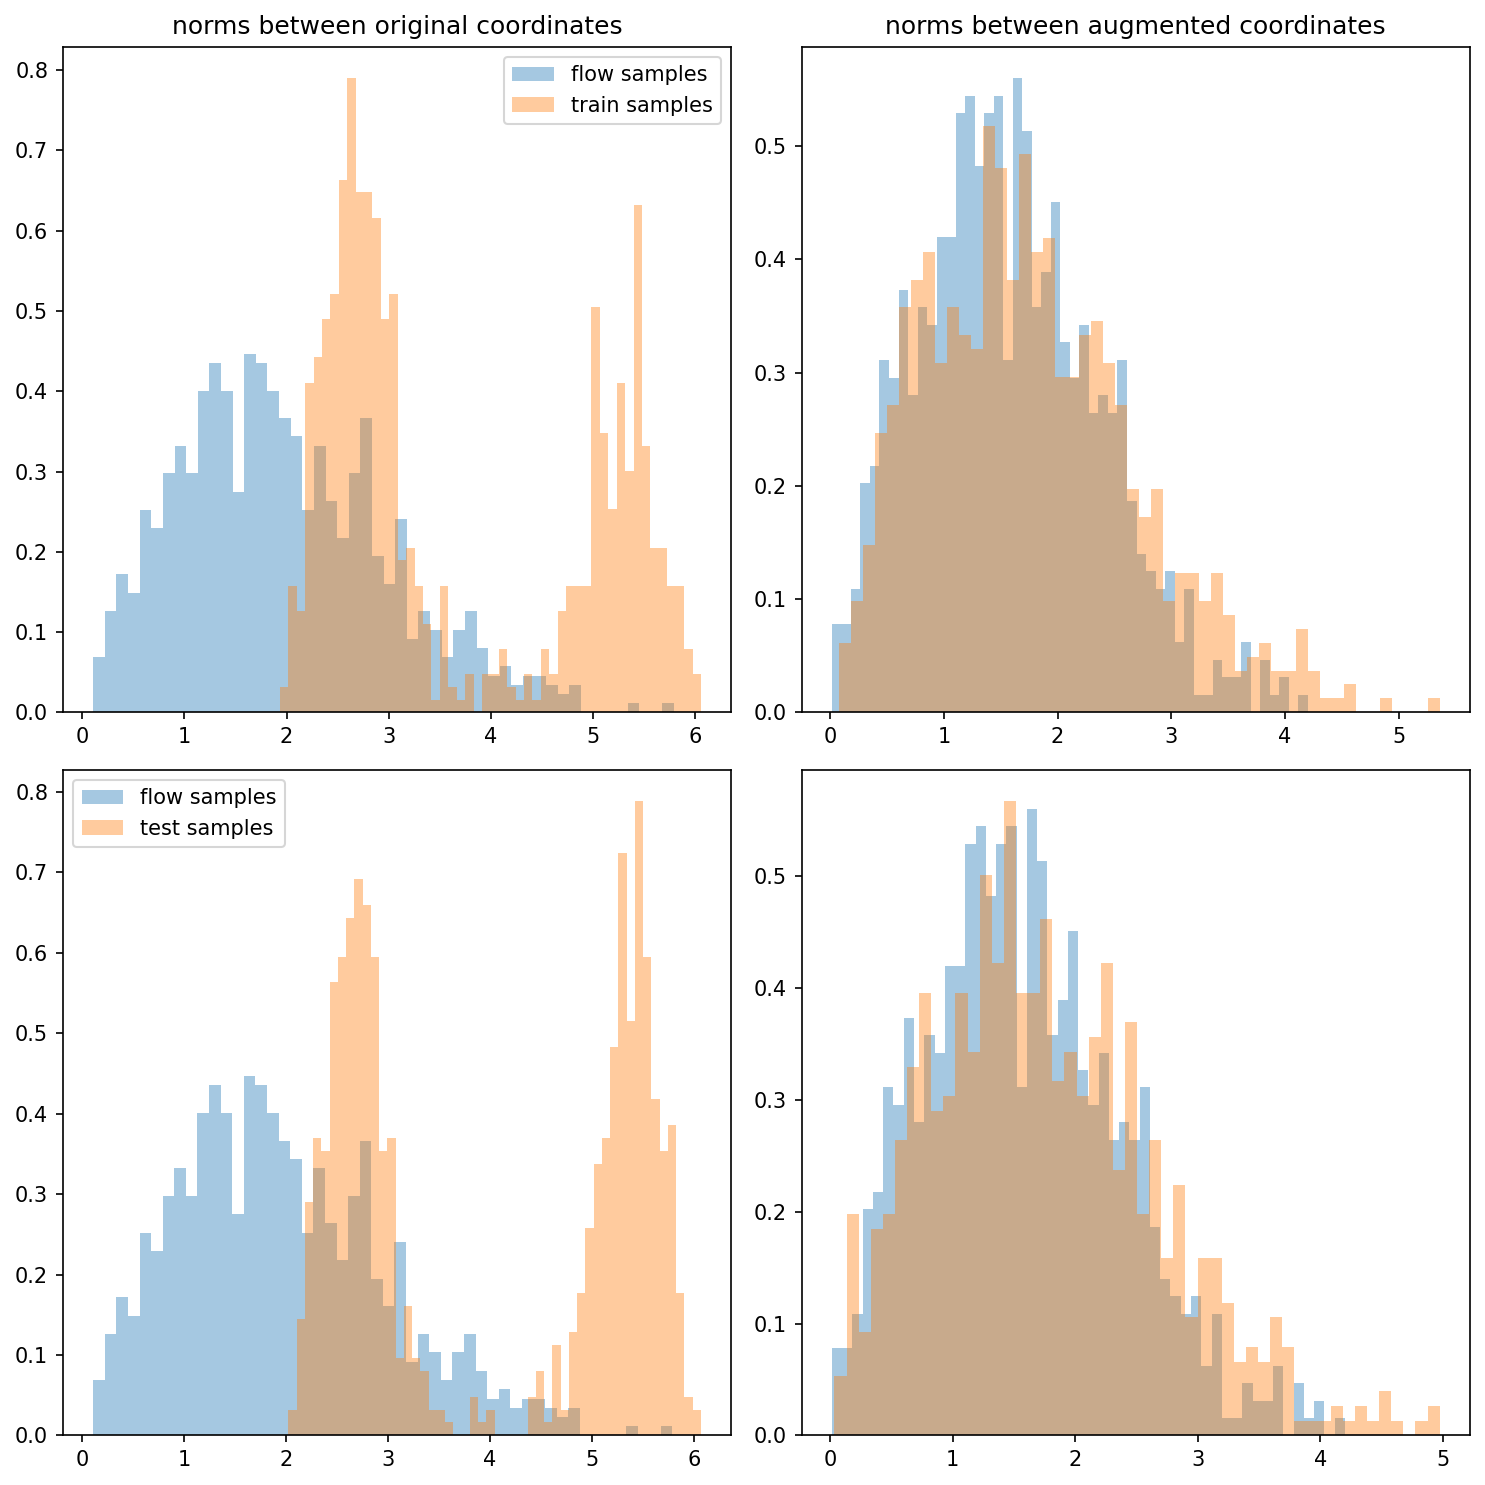

  1%|█▋                                                                                                                                                                    | 1/100 [00:31<52:26, 31.78s/it]

{'eval_log_lik': Array(-25.453394, dtype=float32), 'eval_marginal_log_lik': Array(-15.121238, dtype=float32)}


 13%|█████████████████████▍                                                                                                                                               | 13/100 [00:34<00:28,  3.10it/s]

{'eval_log_lik': Array(-22.67627, dtype=float32), 'eval_marginal_log_lik': Array(-12.319973, dtype=float32)}


 19%|███████████████████████████████▎                                                                                                                                     | 19/100 [00:35<00:16,  5.01it/s]

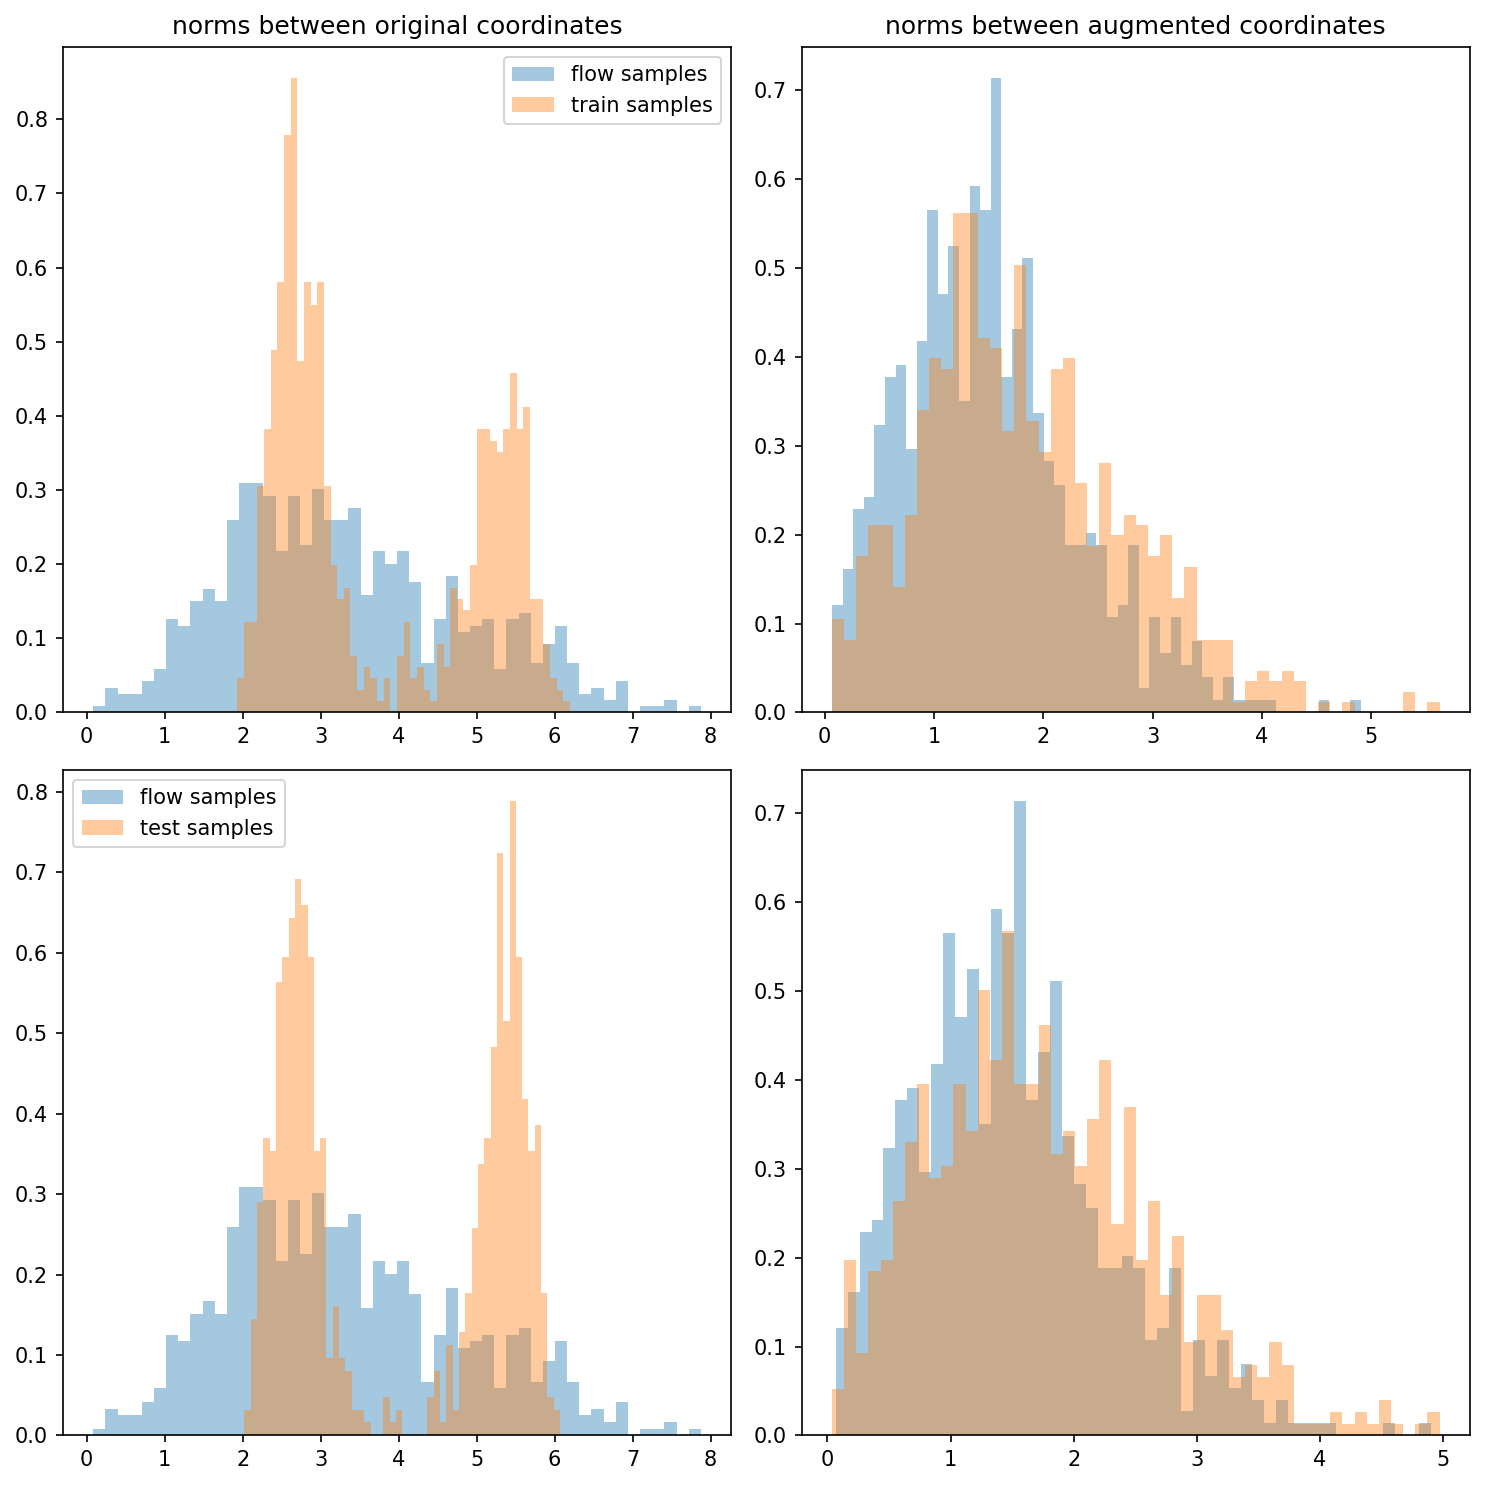

 23%|█████████████████████████████████████▉                                                                                                                               | 23/100 [00:38<00:35,  2.15it/s]

{'eval_log_lik': Array(-22.28466, dtype=float32), 'eval_marginal_log_lik': Array(-11.9308195, dtype=float32)}


 34%|████████████████████████████████████████████████████████                                                                                                             | 34/100 [00:40<00:13,  5.03it/s]

{'eval_log_lik': Array(-21.80899, dtype=float32), 'eval_marginal_log_lik': Array(-11.393506, dtype=float32)}


 39%|████████████████████████████████████████████████████████████████▎                                                                                                    | 39/100 [00:41<00:11,  5.34it/s]

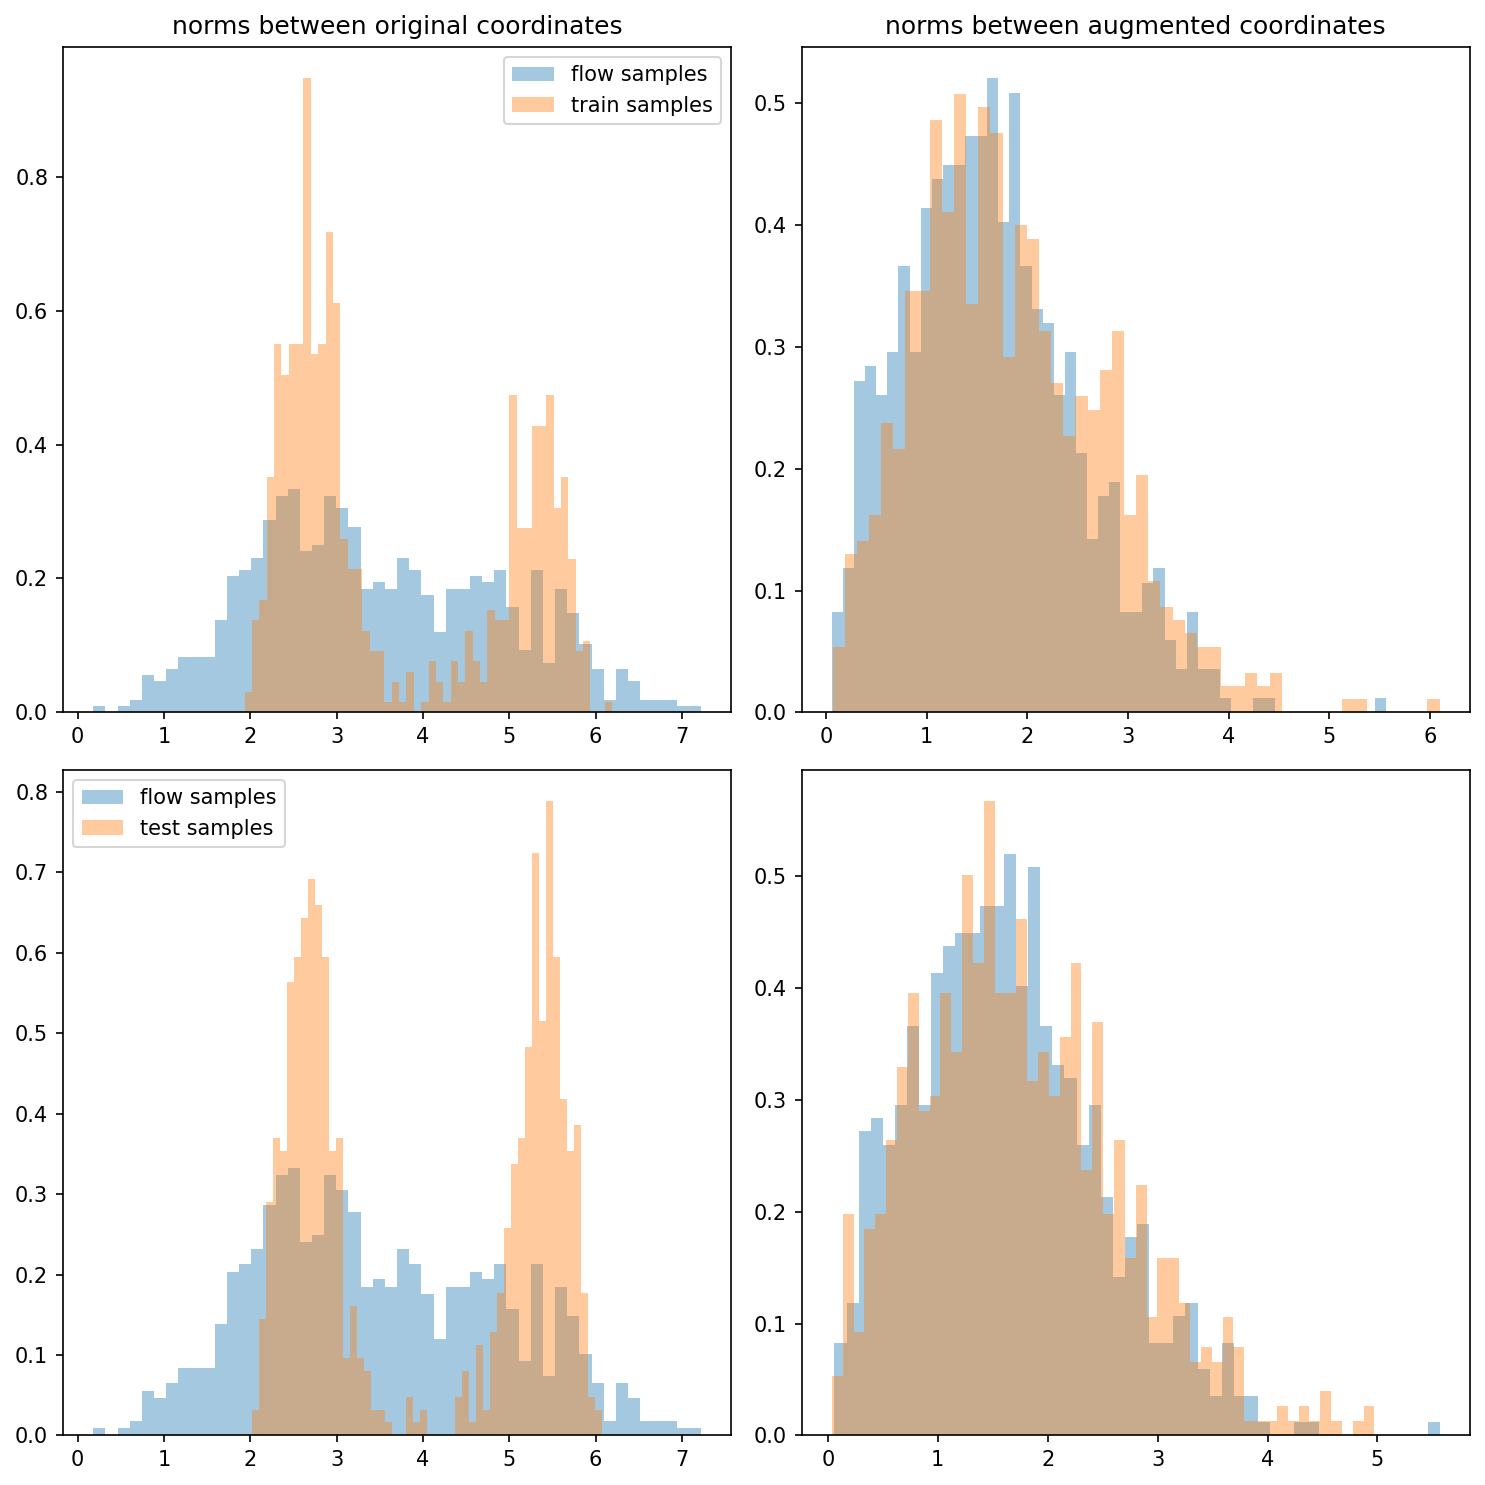

 45%|██████████████████████████████████████████████████████████████████████████▎                                                                                          | 45/100 [00:44<00:16,  3.29it/s]

{'eval_log_lik': Array(-21.55949, dtype=float32), 'eval_marginal_log_lik': Array(-11.212402, dtype=float32)}


 56%|████████████████████████████████████████████████████████████████████████████████████████████▍                                                                        | 56/100 [00:46<00:08,  4.92it/s]

{'eval_log_lik': Array(-21.705446, dtype=float32), 'eval_marginal_log_lik': Array(-11.42427, dtype=float32)}


 59%|█████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                   | 59/100 [00:47<00:08,  5.10it/s]

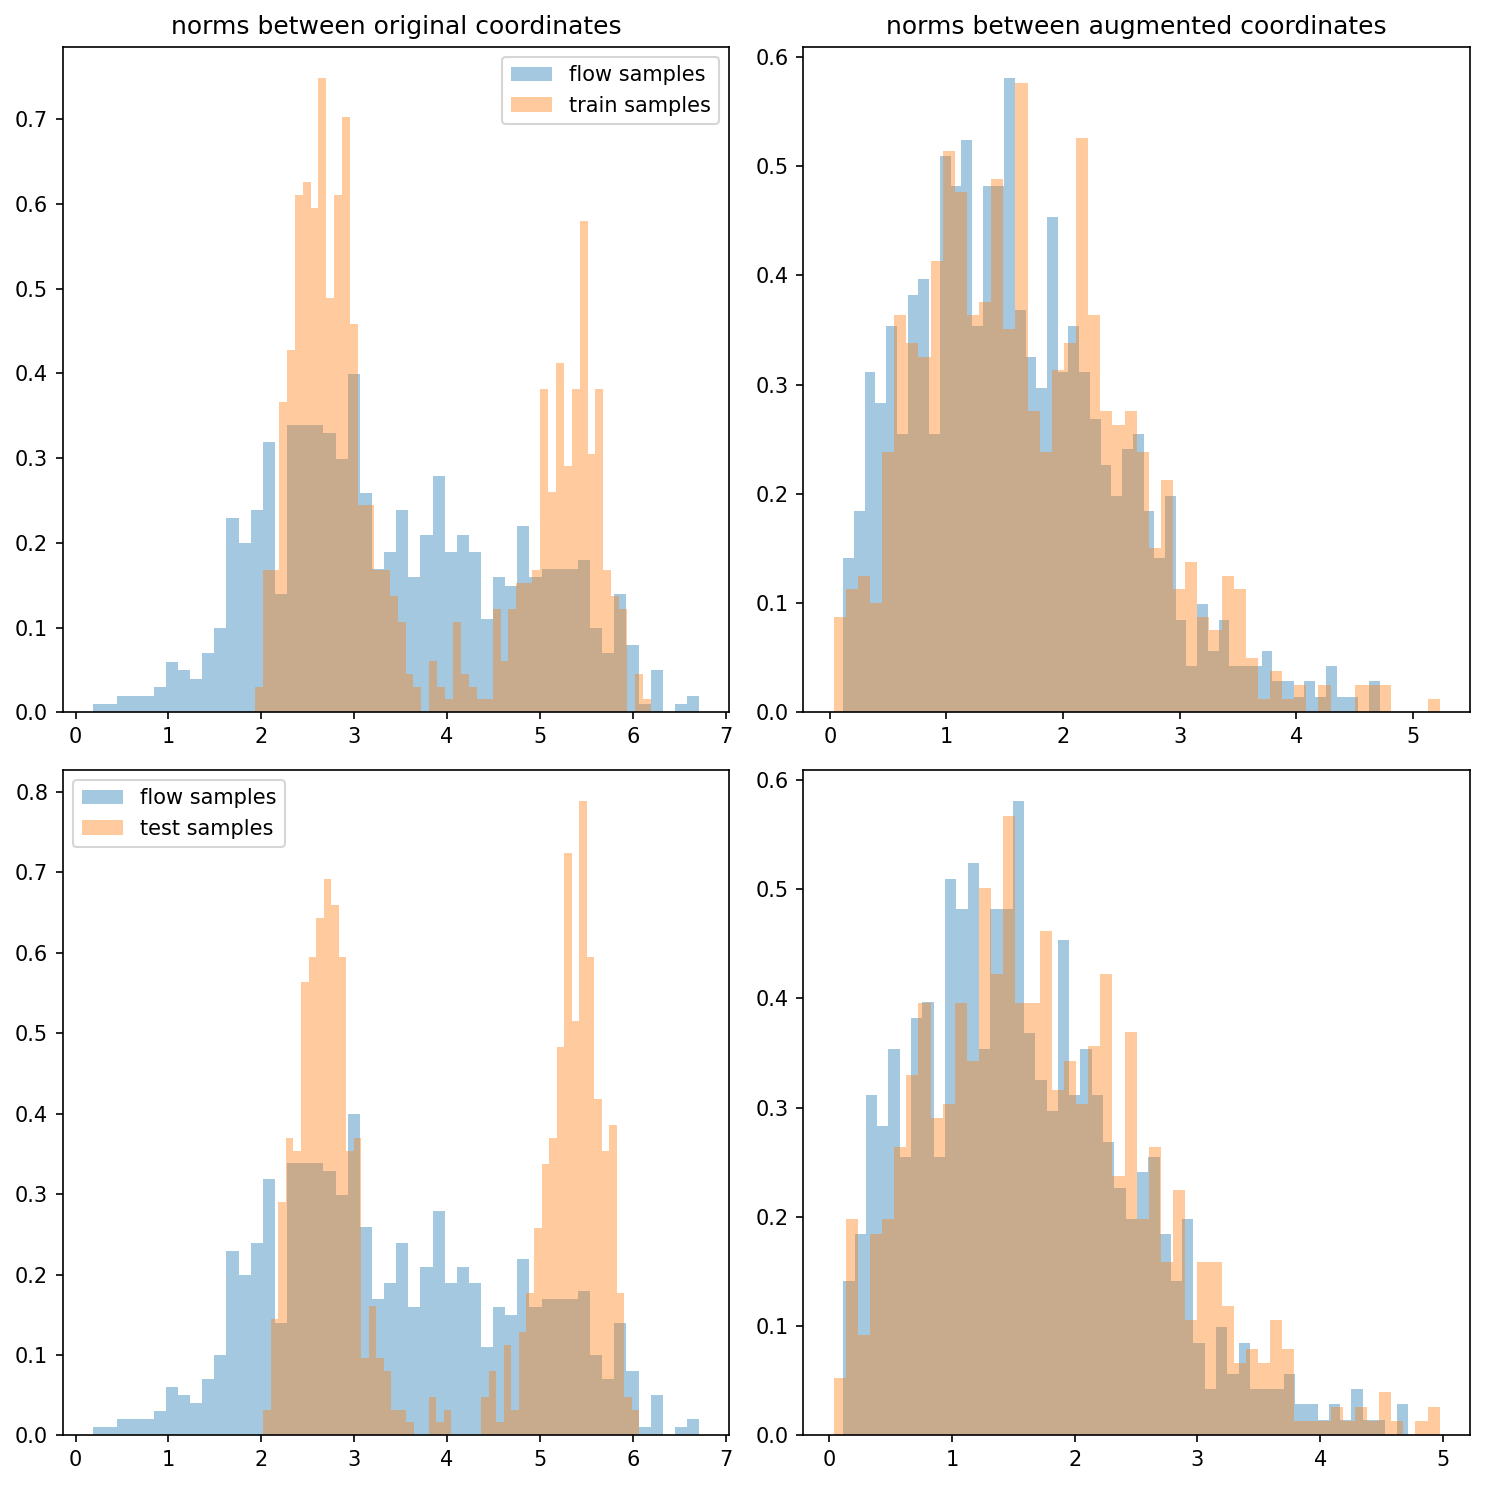

 67%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                      | 67/100 [00:51<00:08,  3.92it/s]

{'eval_log_lik': Array(-21.437899, dtype=float32), 'eval_marginal_log_lik': Array(-11.07372, dtype=float32)}


 78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                    | 78/100 [00:53<00:04,  4.99it/s]

{'eval_log_lik': Array(-21.623453, dtype=float32), 'eval_marginal_log_lik': Array(-11.290215, dtype=float32)}


 79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                  | 79/100 [00:53<00:04,  4.94it/s]

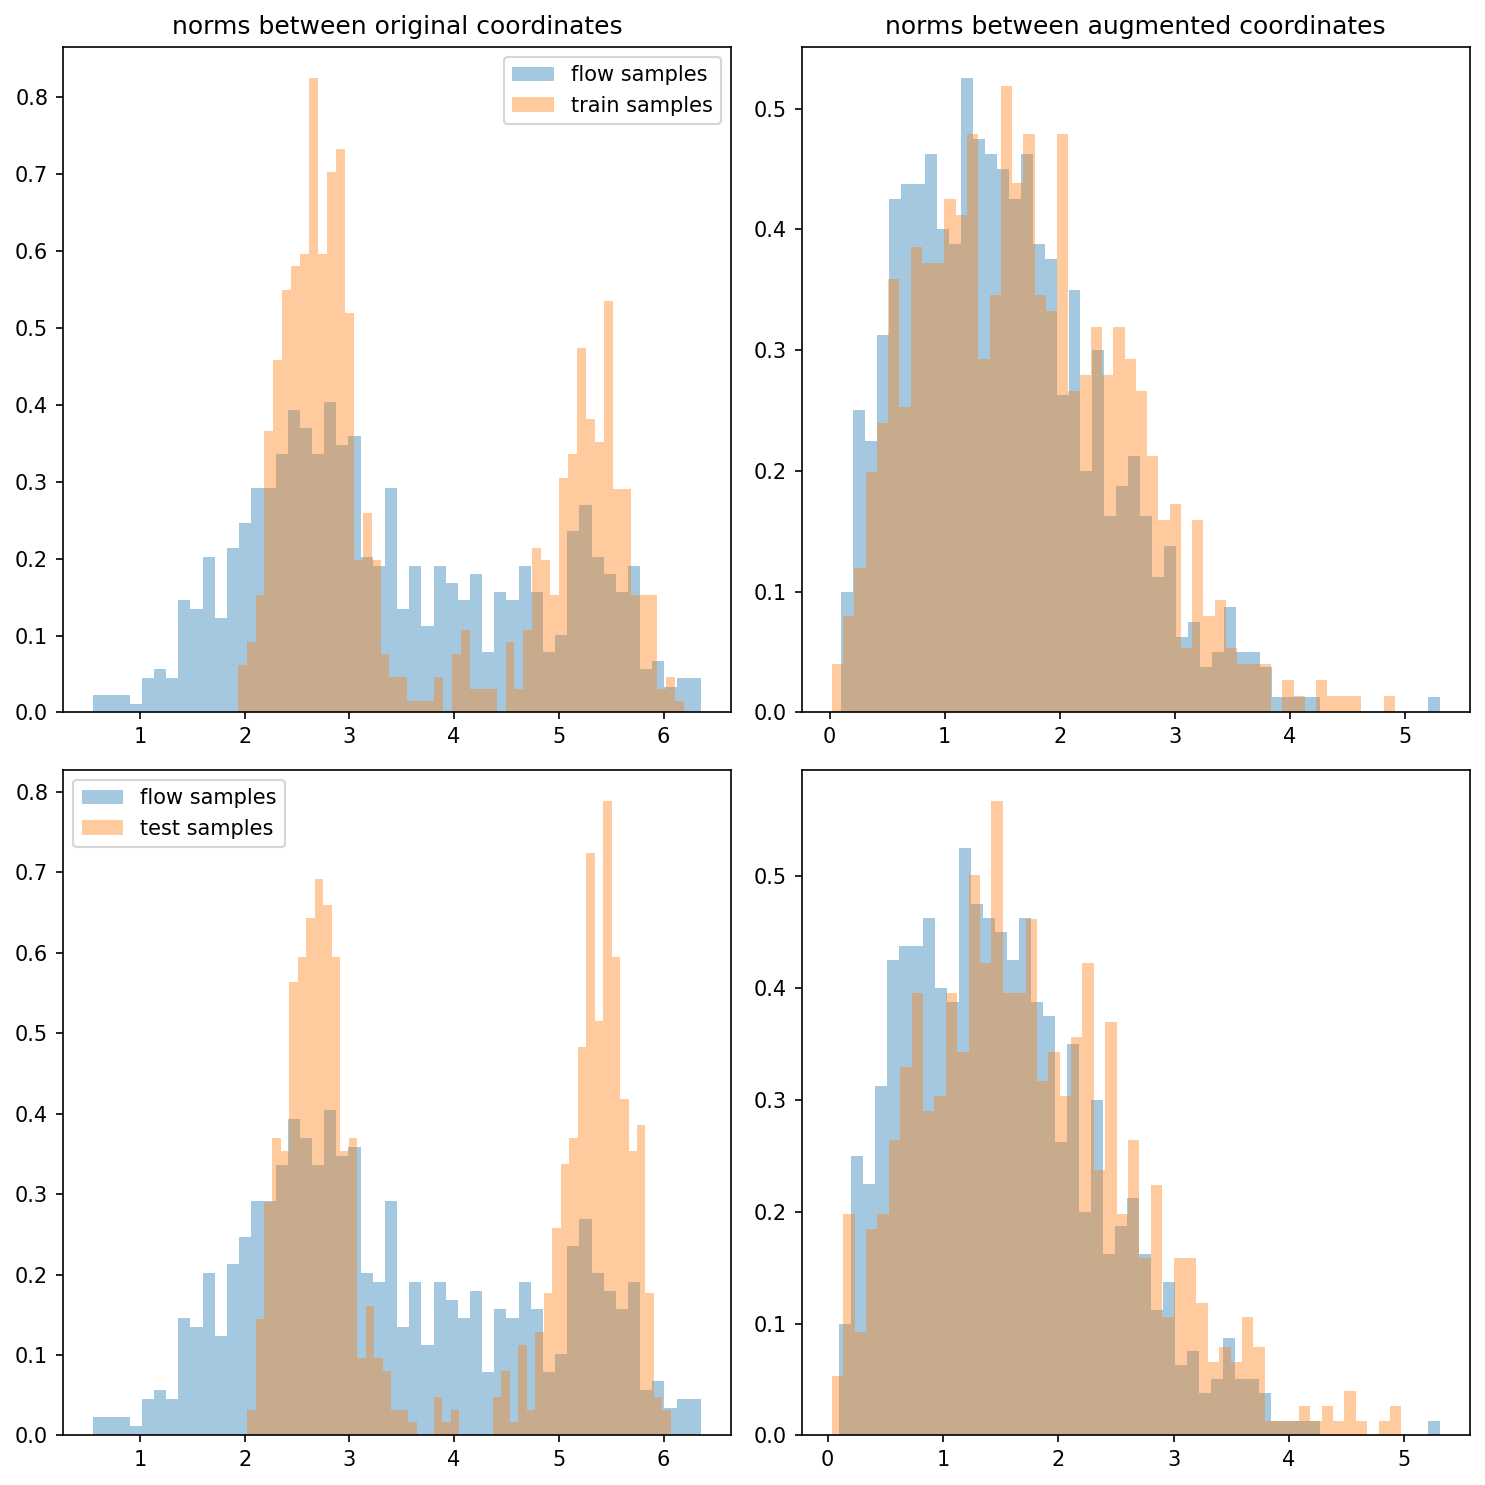

 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                | 90/100 [00:57<00:02,  4.80it/s]

{'eval_log_lik': Array(-21.463934, dtype=float32), 'eval_marginal_log_lik': Array(-11.201845, dtype=float32)}


 99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎ | 99/100 [00:59<00:00,  5.42it/s]

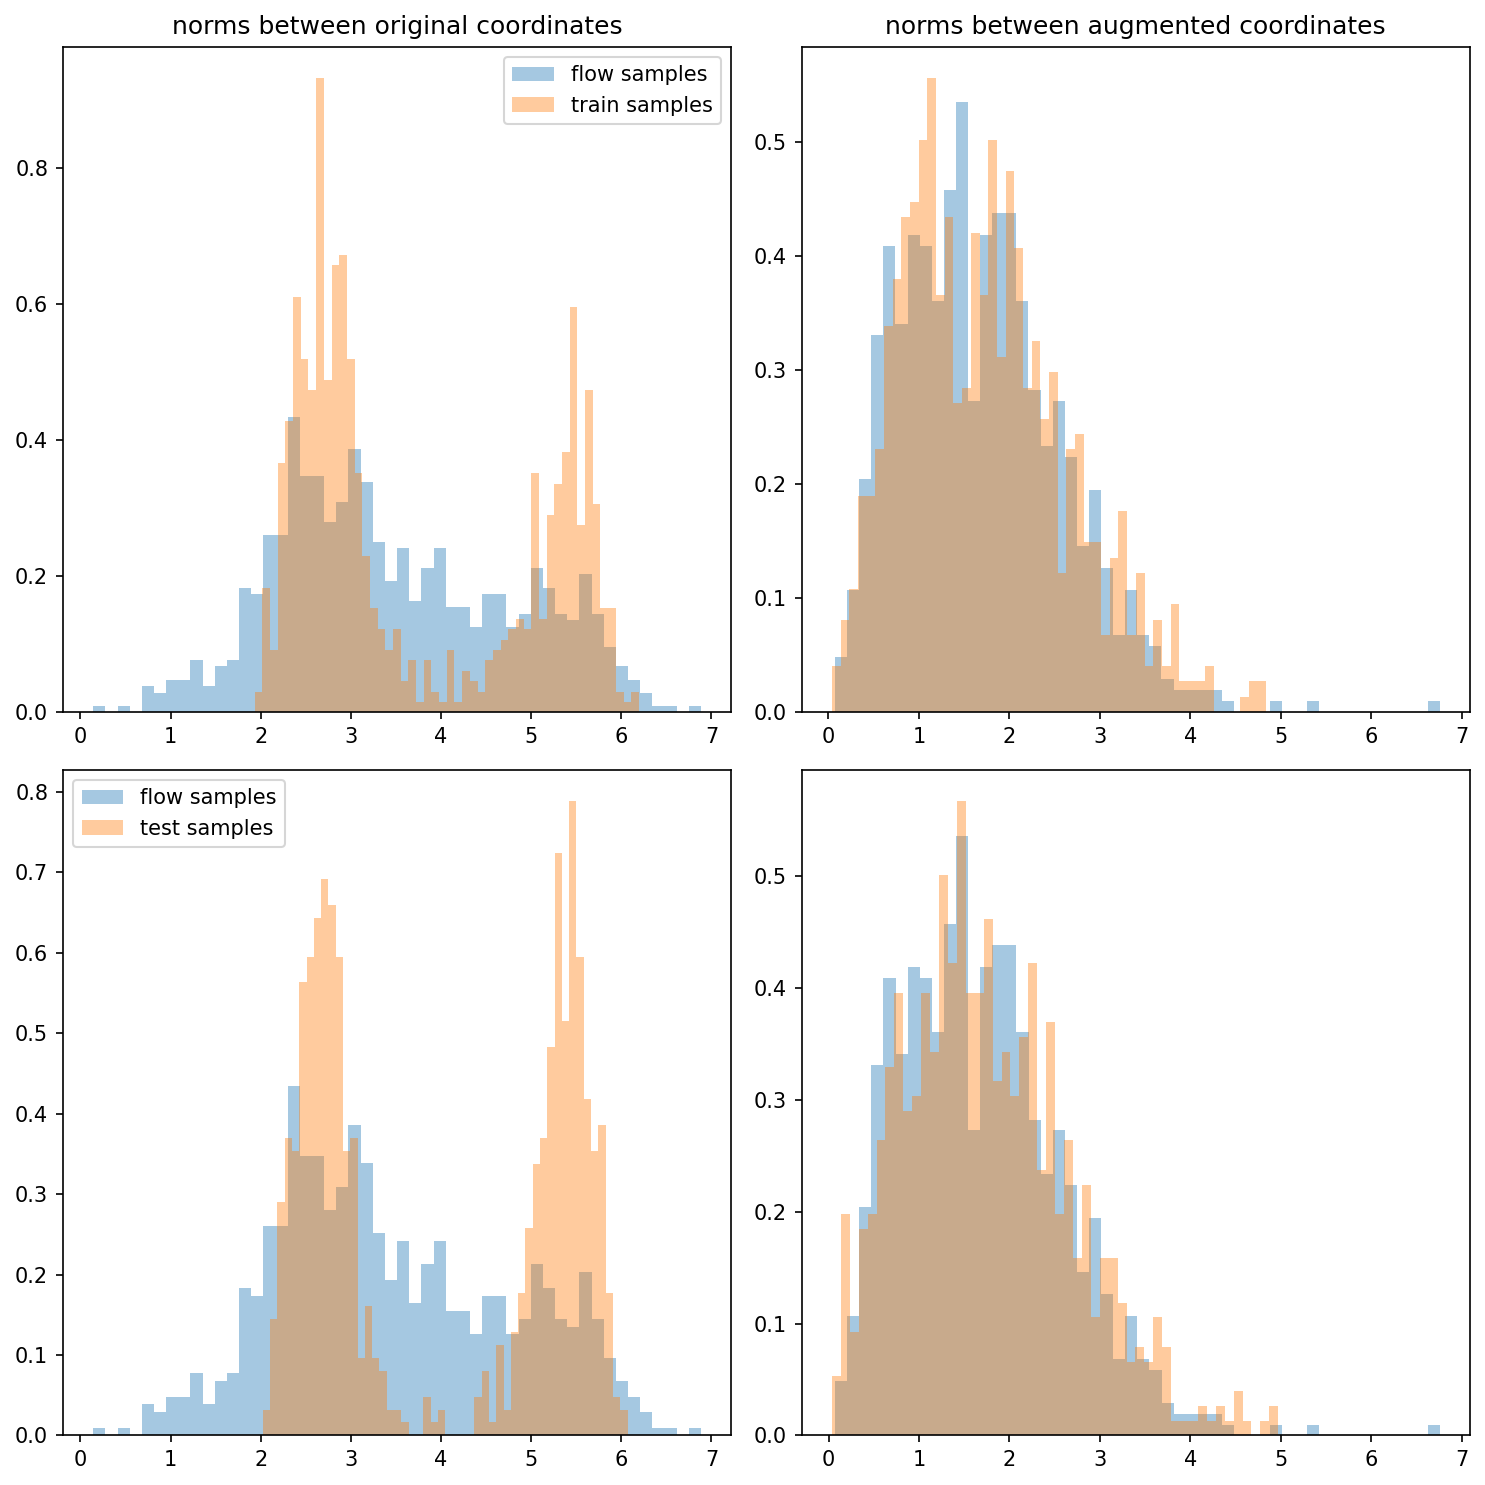

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [01:01<00:00,  1.62it/s]


{'eval_log_lik': Array(-21.279594, dtype=float32), 'eval_marginal_log_lik': Array(-10.929633, dtype=float32)}


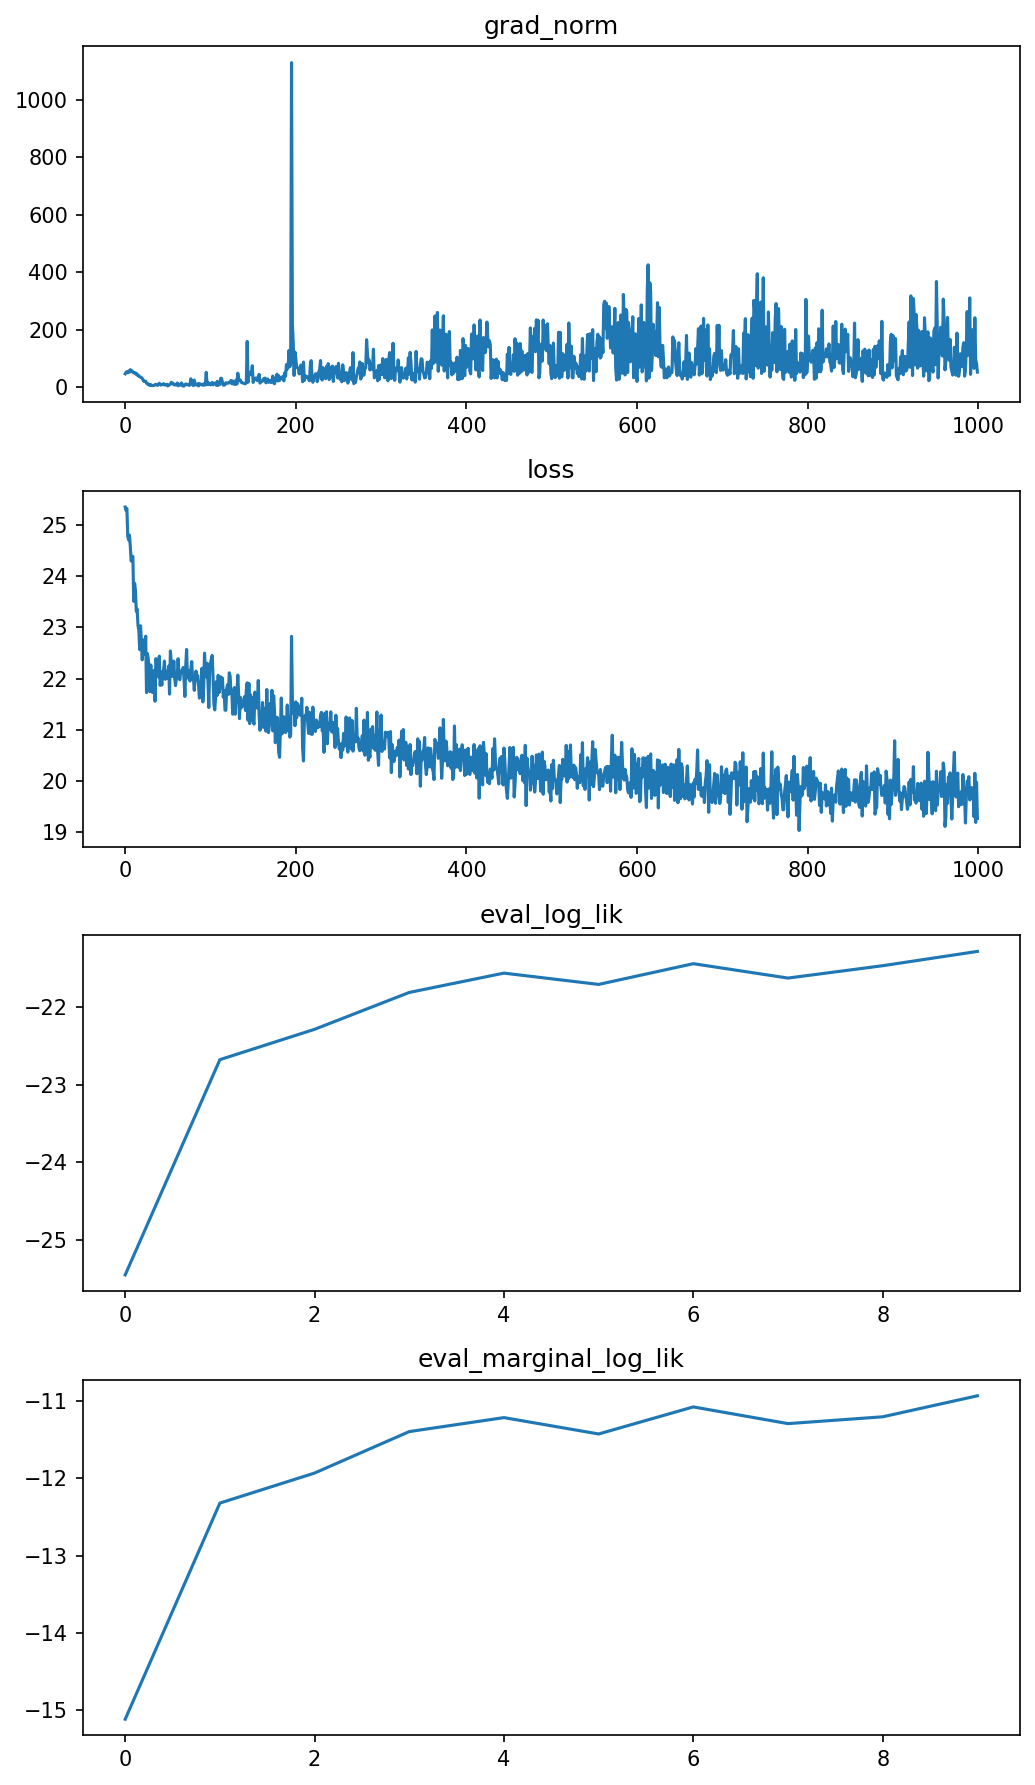

In [12]:
experiment_config = create_train_config(cfg, dim=2, n_nodes=4,
                                        load_dataset=load_dataset)

logger, params, log_prob_fn, sample_and_log_prob_fn = train(experiment_config)

## Larger transformer

In [13]:
cfg.flow.transformer.mlp_units = (32, 32)

training data size of 1000


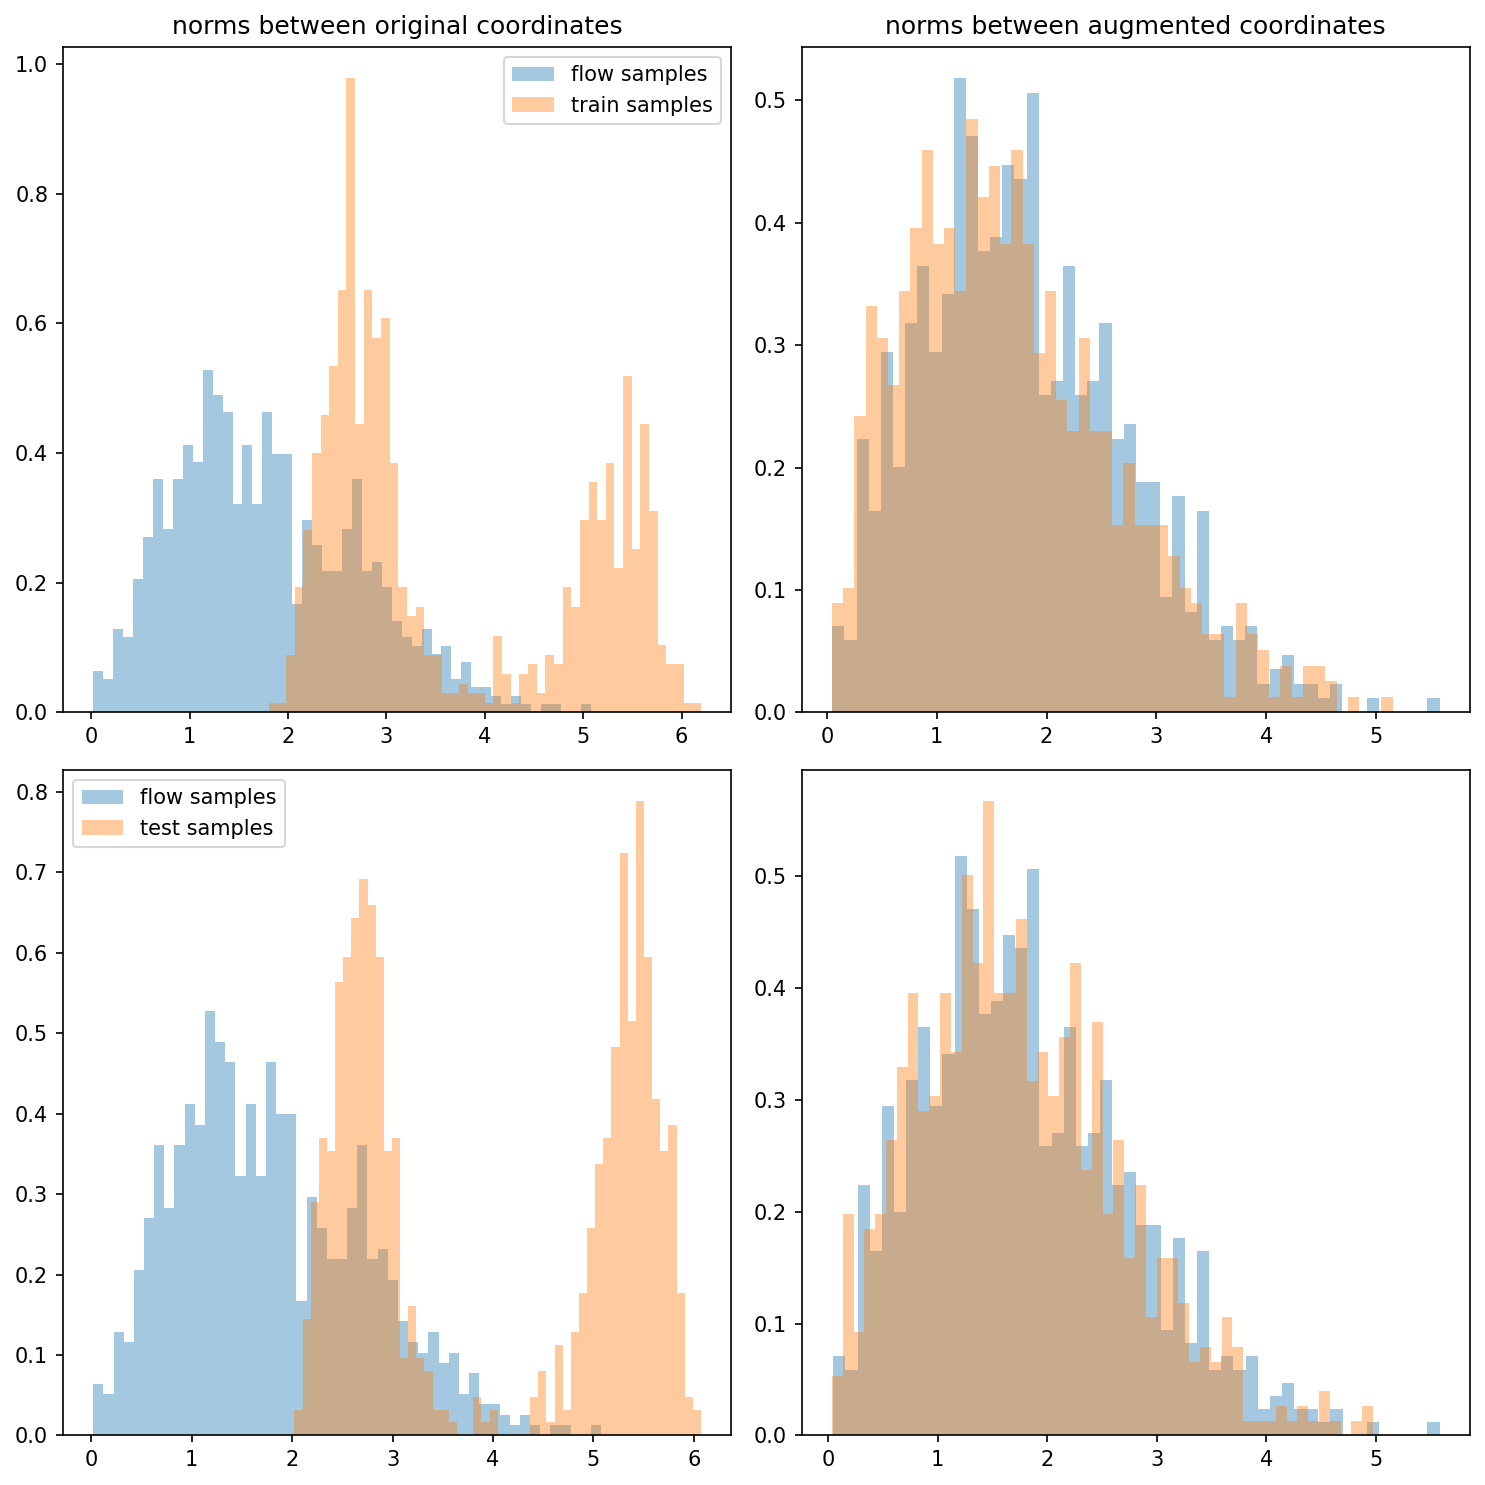

  0%|                                                                                                                                                                              | 0/100 [00:00<?, ?it/s]

non numeric history values being saved


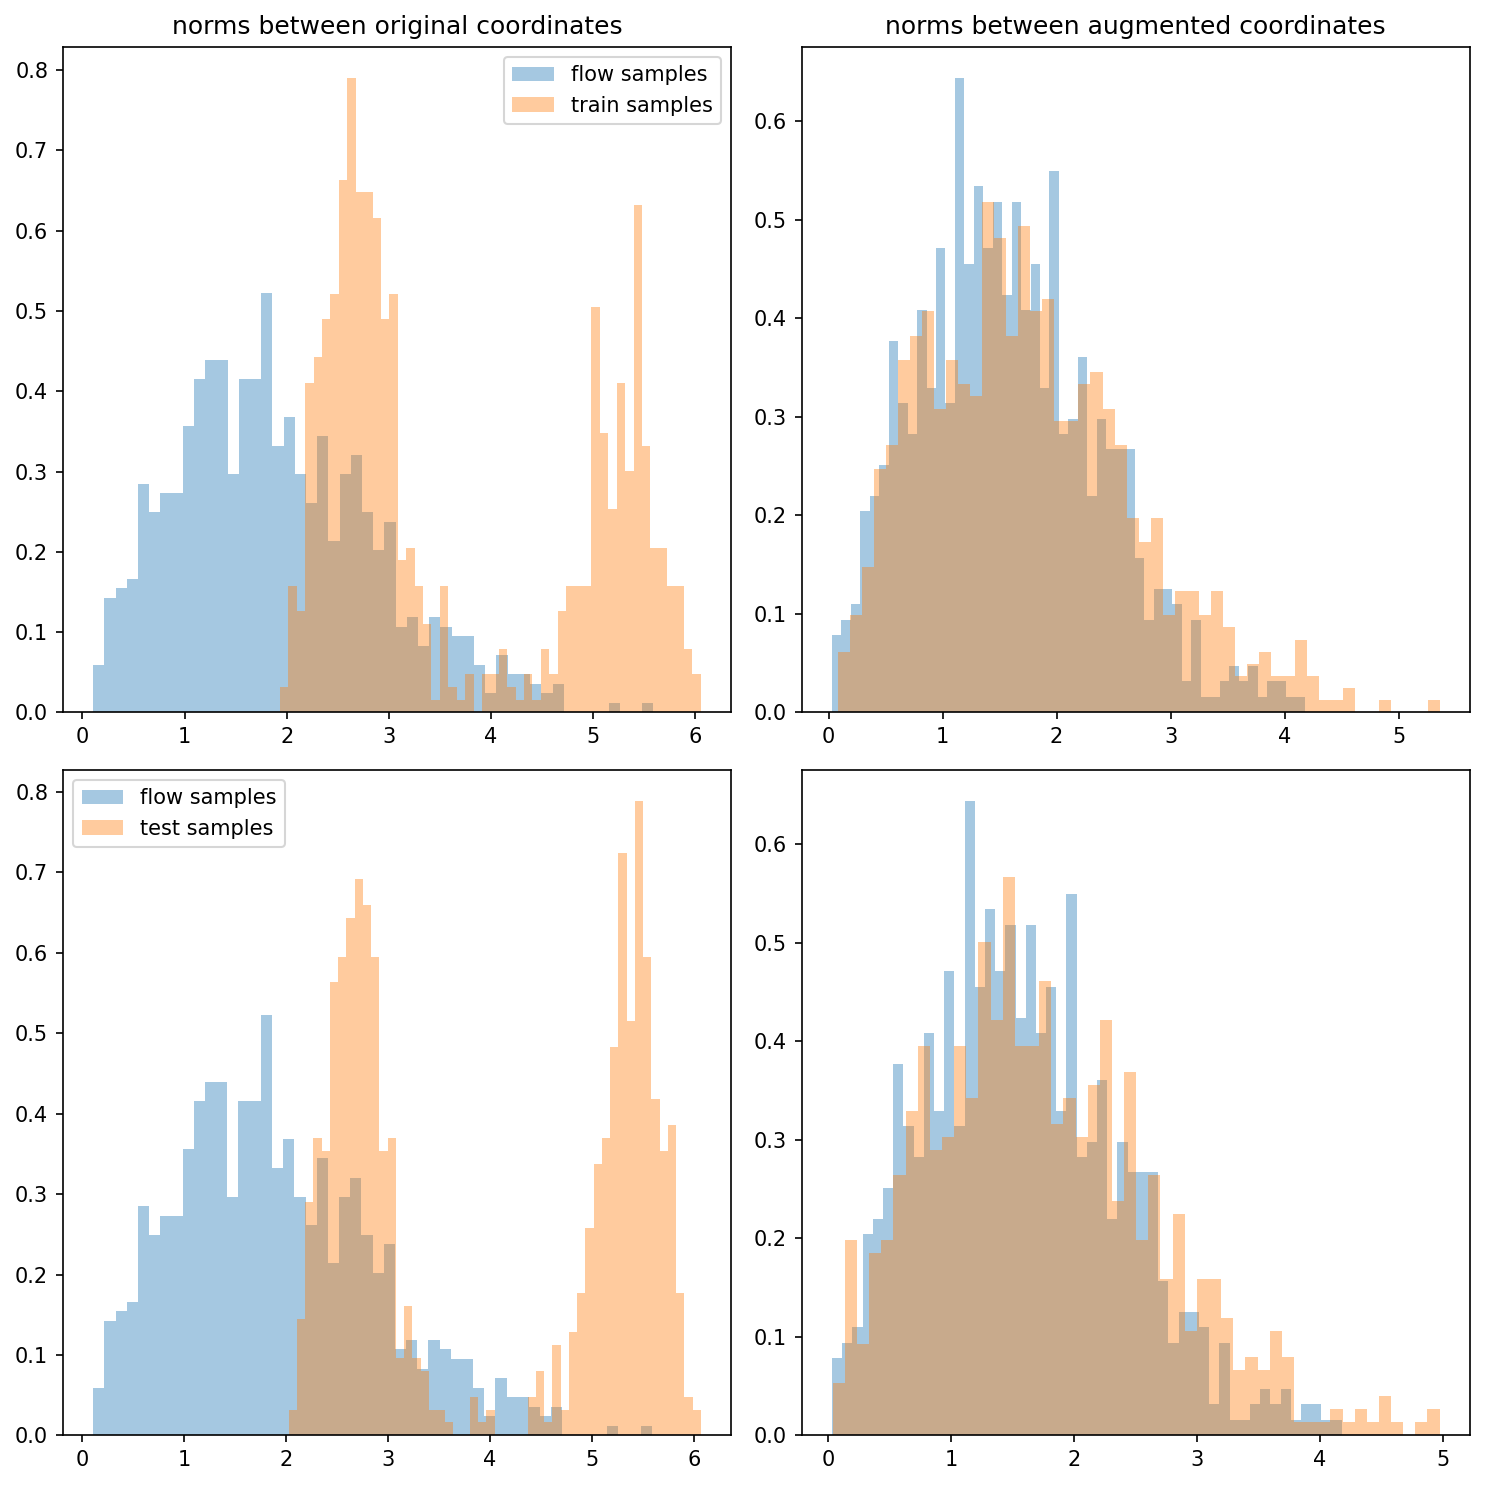

  1%|█▋                                                                                                                                                                    | 1/100 [00:34<56:18, 34.13s/it]

{'eval_log_lik': Array(-25.87212, dtype=float32), 'eval_marginal_log_lik': Array(-15.539963, dtype=float32)}


 13%|█████████████████████▍                                                                                                                                               | 13/100 [00:36<00:29,  2.93it/s]

{'eval_log_lik': Array(-22.572464, dtype=float32), 'eval_marginal_log_lik': Array(-12.216167, dtype=float32)}


 19%|███████████████████████████████▎                                                                                                                                     | 19/100 [00:37<00:16,  4.78it/s]

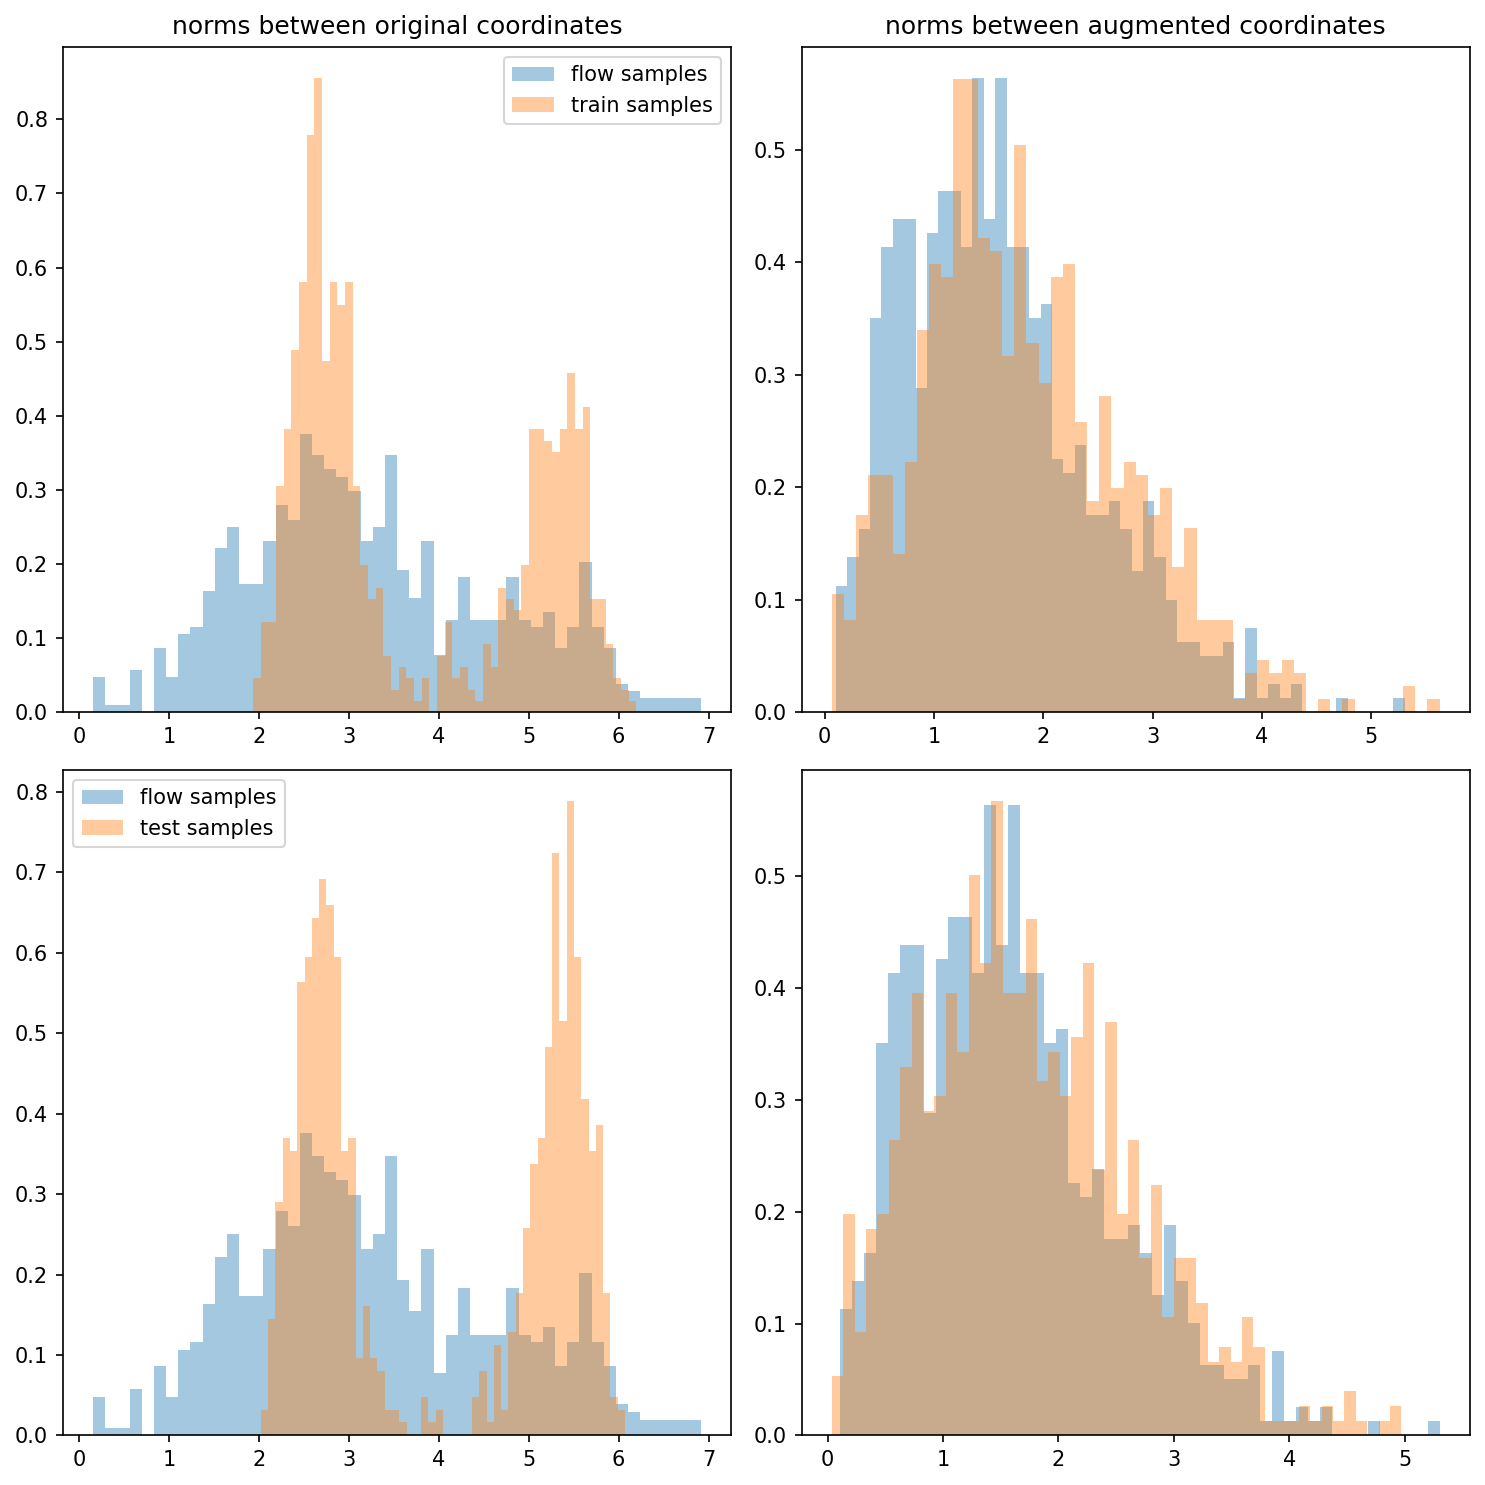

 23%|█████████████████████████████████████▉                                                                                                                               | 23/100 [00:40<00:33,  2.29it/s]

{'eval_log_lik': Array(-22.44958, dtype=float32), 'eval_marginal_log_lik': Array(-12.095737, dtype=float32)}


 35%|█████████████████████████████████████████████████████████▋                                                                                                           | 35/100 [00:43<00:13,  4.95it/s]

{'eval_log_lik': Array(-22.316677, dtype=float32), 'eval_marginal_log_lik': Array(-11.901191, dtype=float32)}


 39%|████████████████████████████████████████████████████████████████▎                                                                                                    | 39/100 [00:43<00:11,  5.15it/s]

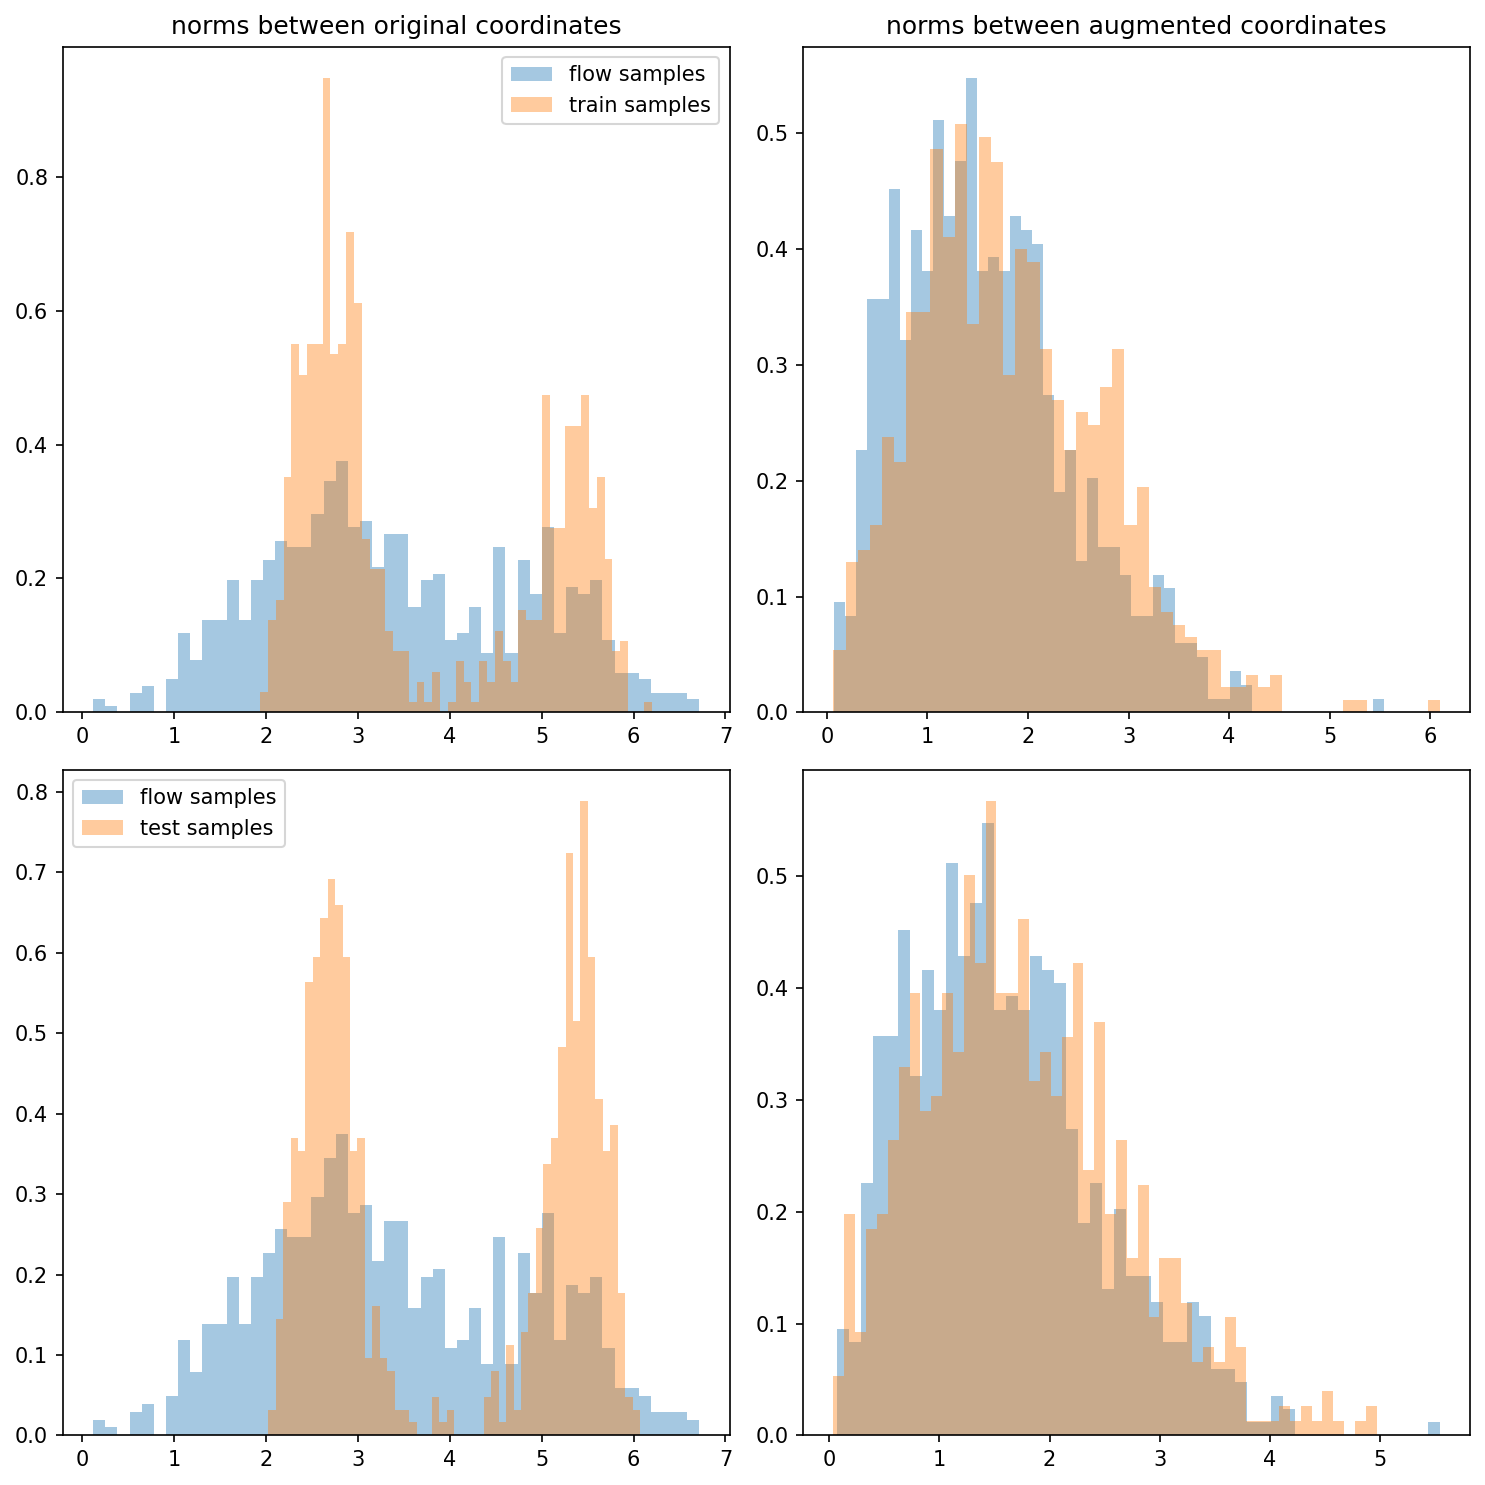

 45%|██████████████████████████████████████████████████████████████████████████▎                                                                                          | 45/100 [00:47<00:17,  3.19it/s]

{'eval_log_lik': Array(-22.680918, dtype=float32), 'eval_marginal_log_lik': Array(-12.33383, dtype=float32)}


 57%|██████████████████████████████████████████████████████████████████████████████████████████████                                                                       | 57/100 [00:49<00:08,  4.83it/s]

{'eval_log_lik': Array(-22.294514, dtype=float32), 'eval_marginal_log_lik': Array(-12.013336, dtype=float32)}


 59%|█████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                   | 59/100 [00:49<00:08,  5.02it/s]

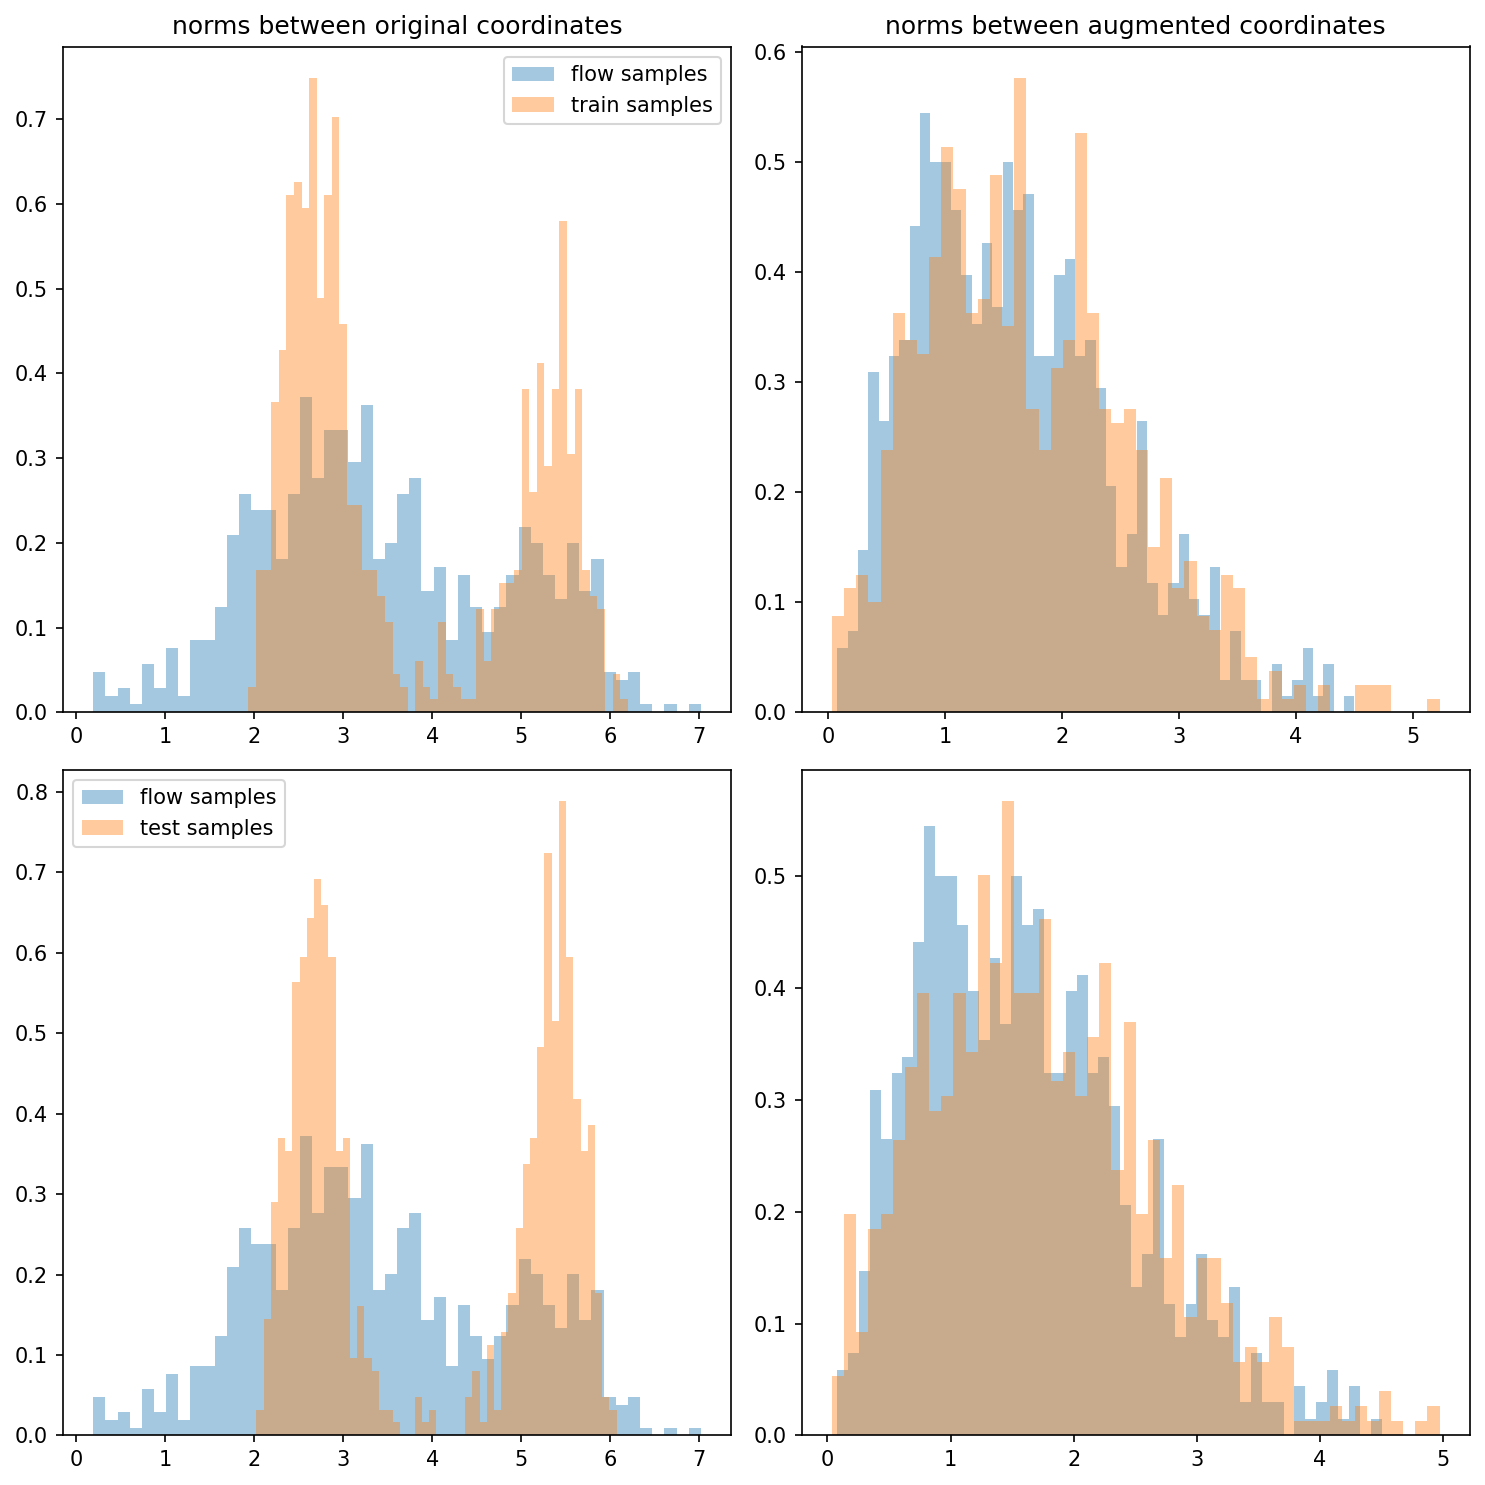

 68%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                    | 68/100 [00:53<00:07,  4.21it/s]

{'eval_log_lik': Array(-22.984758, dtype=float32), 'eval_marginal_log_lik': Array(-12.620578, dtype=float32)}


 78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                    | 78/100 [00:55<00:04,  4.95it/s]

{'eval_log_lik': Array(-24.206278, dtype=float32), 'eval_marginal_log_lik': Array(-13.873039, dtype=float32)}


 79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                  | 79/100 [00:56<00:04,  4.88it/s]

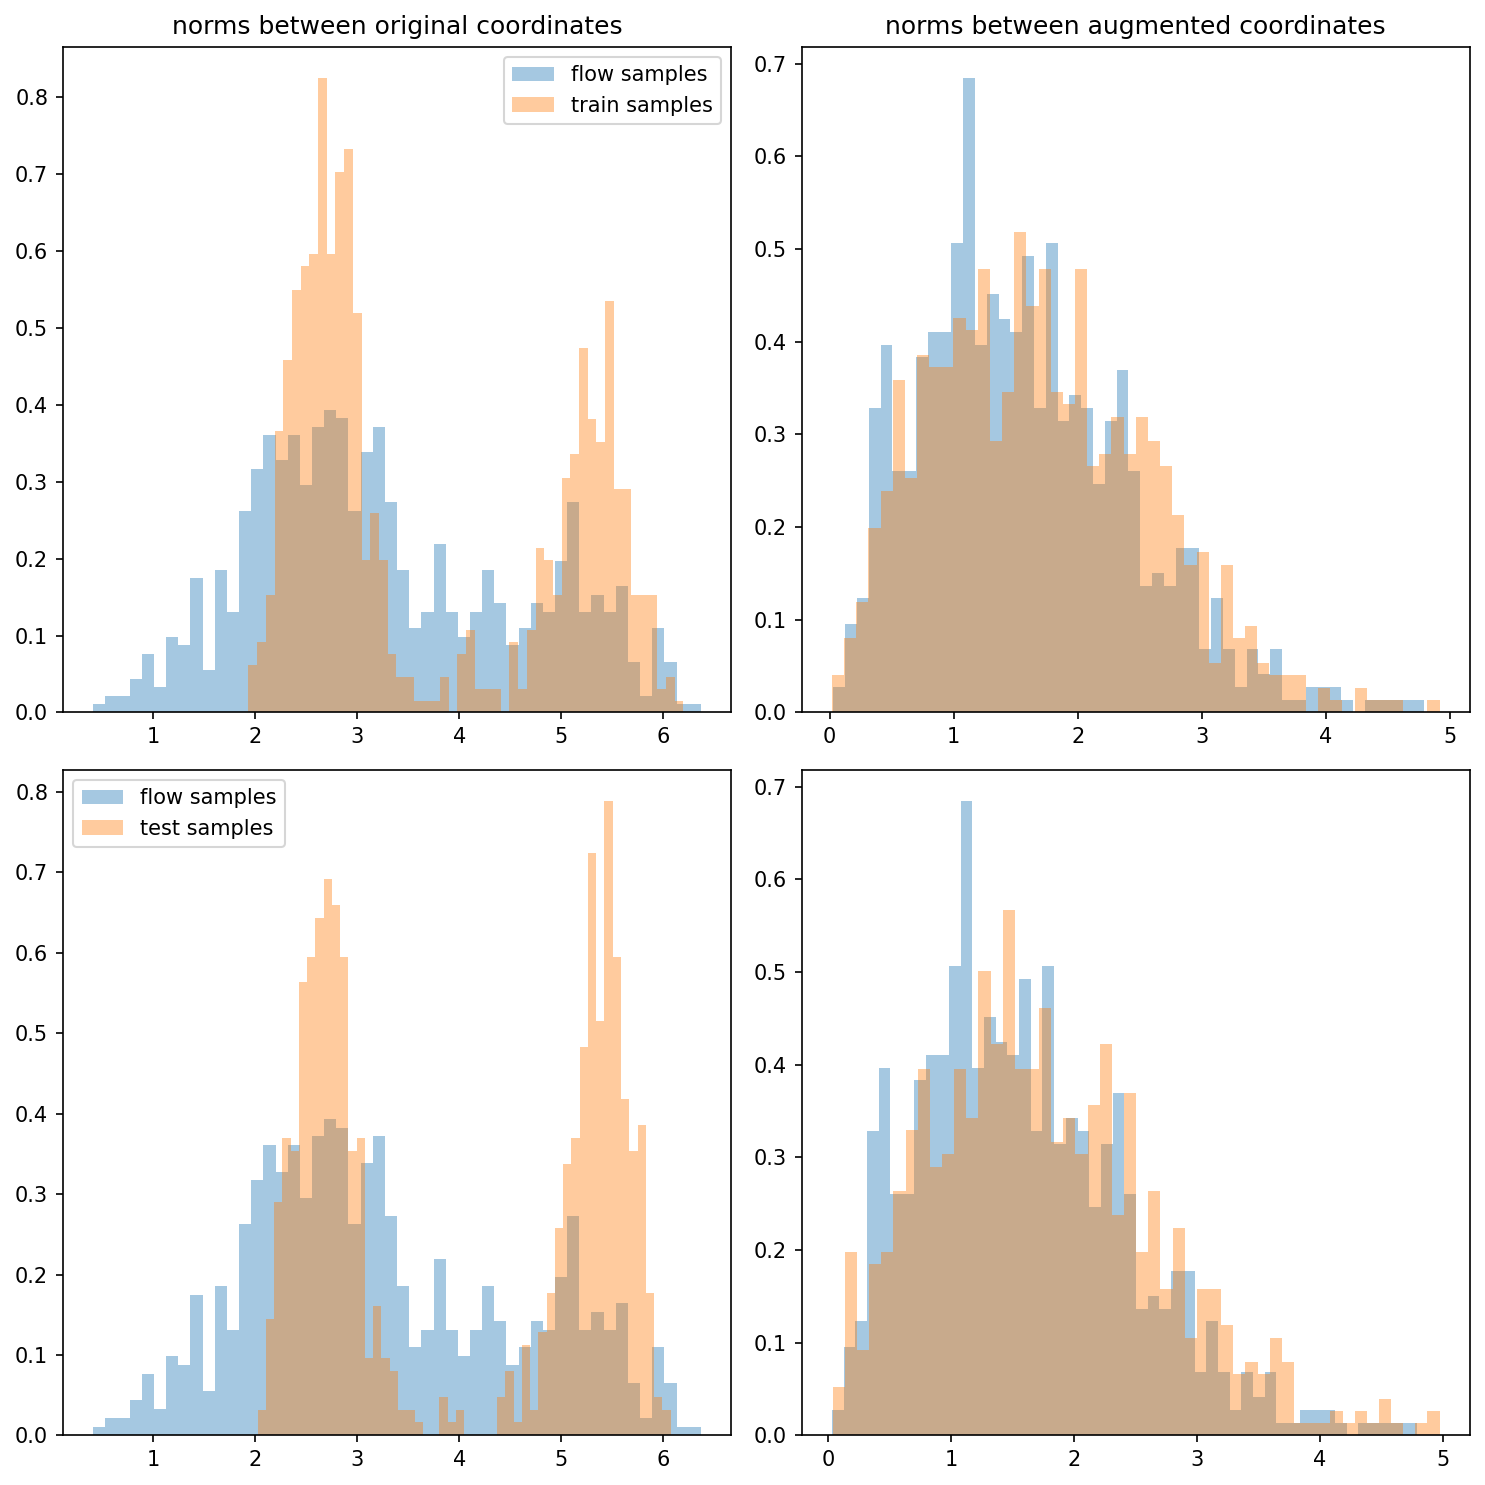

 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                | 90/100 [01:00<00:02,  4.61it/s]

{'eval_log_lik': Array(-24.343706, dtype=float32), 'eval_marginal_log_lik': Array(-14.081616, dtype=float32)}


 99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎ | 99/100 [01:02<00:00,  5.05it/s]

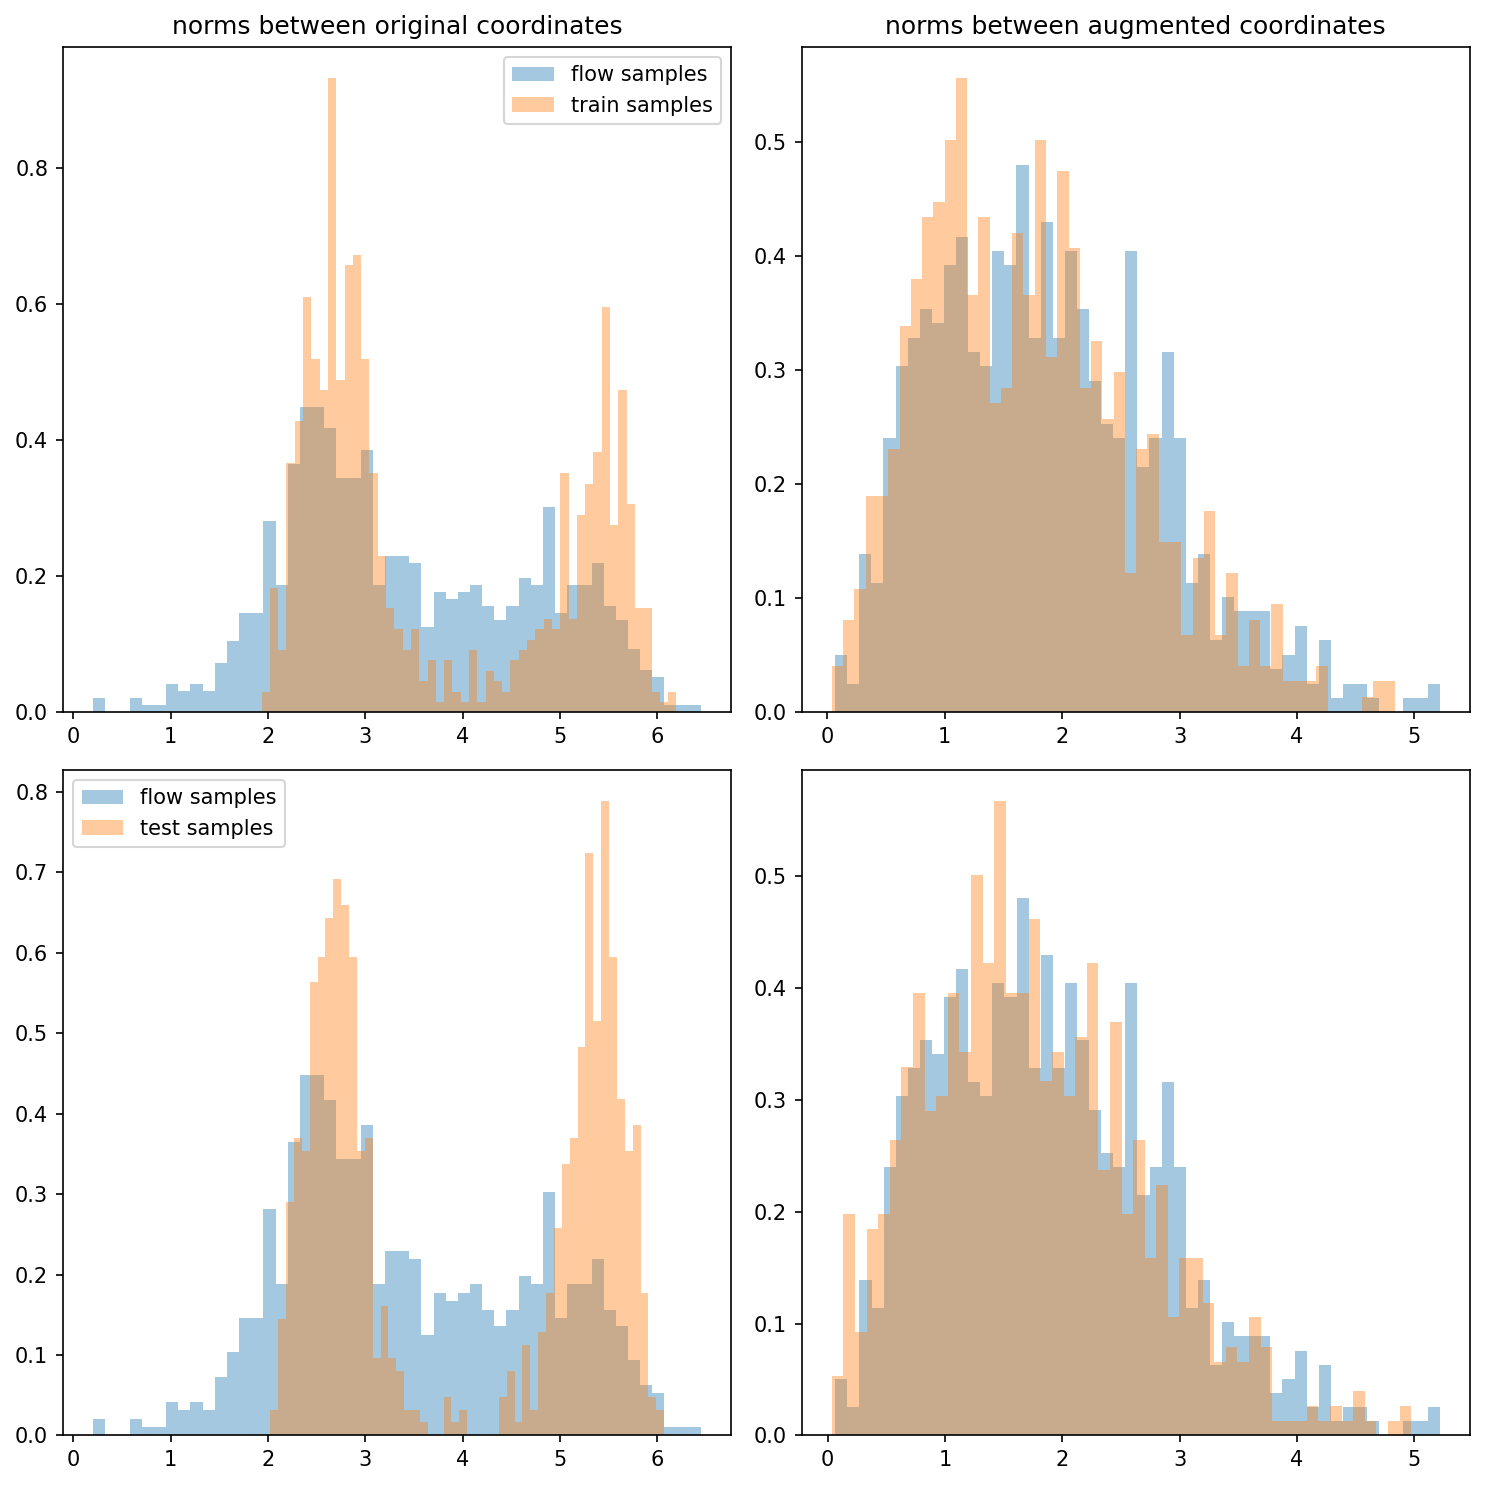

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [01:04<00:00,  1.55it/s]


{'eval_log_lik': Array(-24.880798, dtype=float32), 'eval_marginal_log_lik': Array(-14.530837, dtype=float32)}


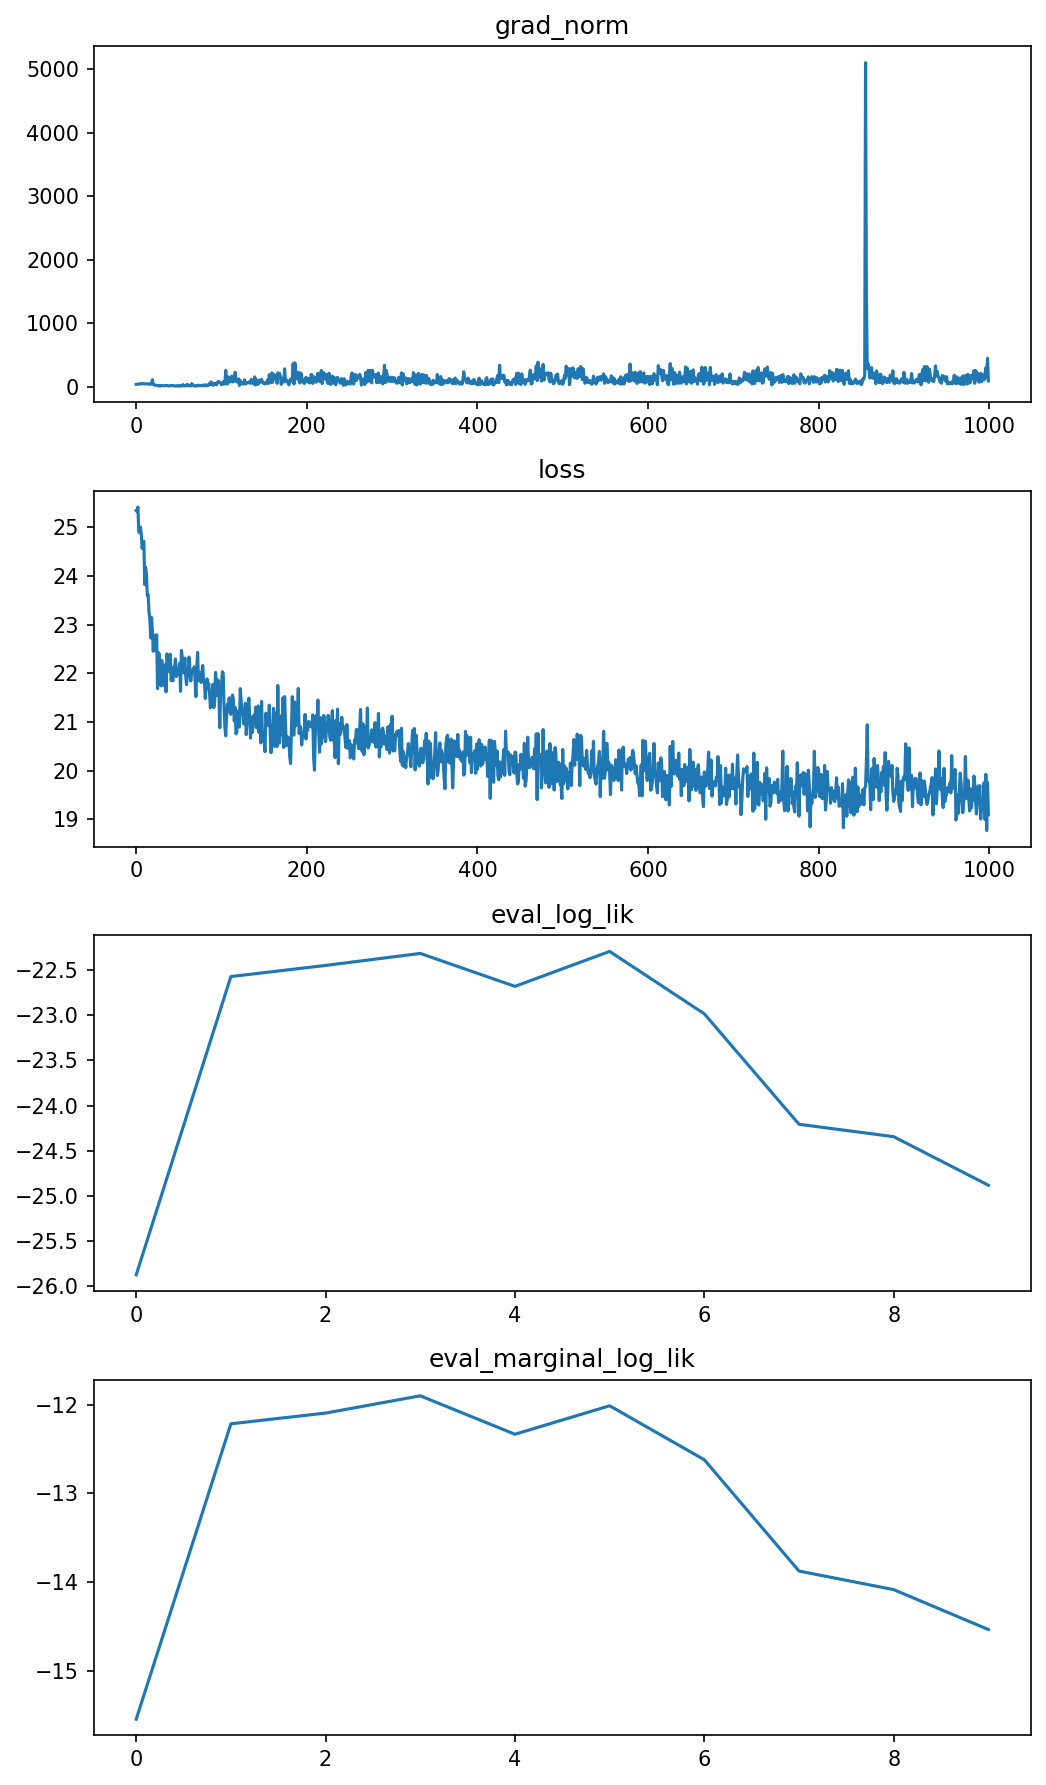

In [14]:
experiment_config = create_train_config(cfg, dim=2, n_nodes=4,
                                        load_dataset=load_dataset)

logger, params, log_prob_fn, sample_and_log_prob_fn = train(experiment_config)

# More keys and heads

In [15]:
cfg.flow.transformer.mlp_units = (32,)
cfg.flow.transformer.n_layers = 3
cfg.flow.transformer.num_heads = 8
cfg.flow.transformer.key_size =  16

training data size of 1000


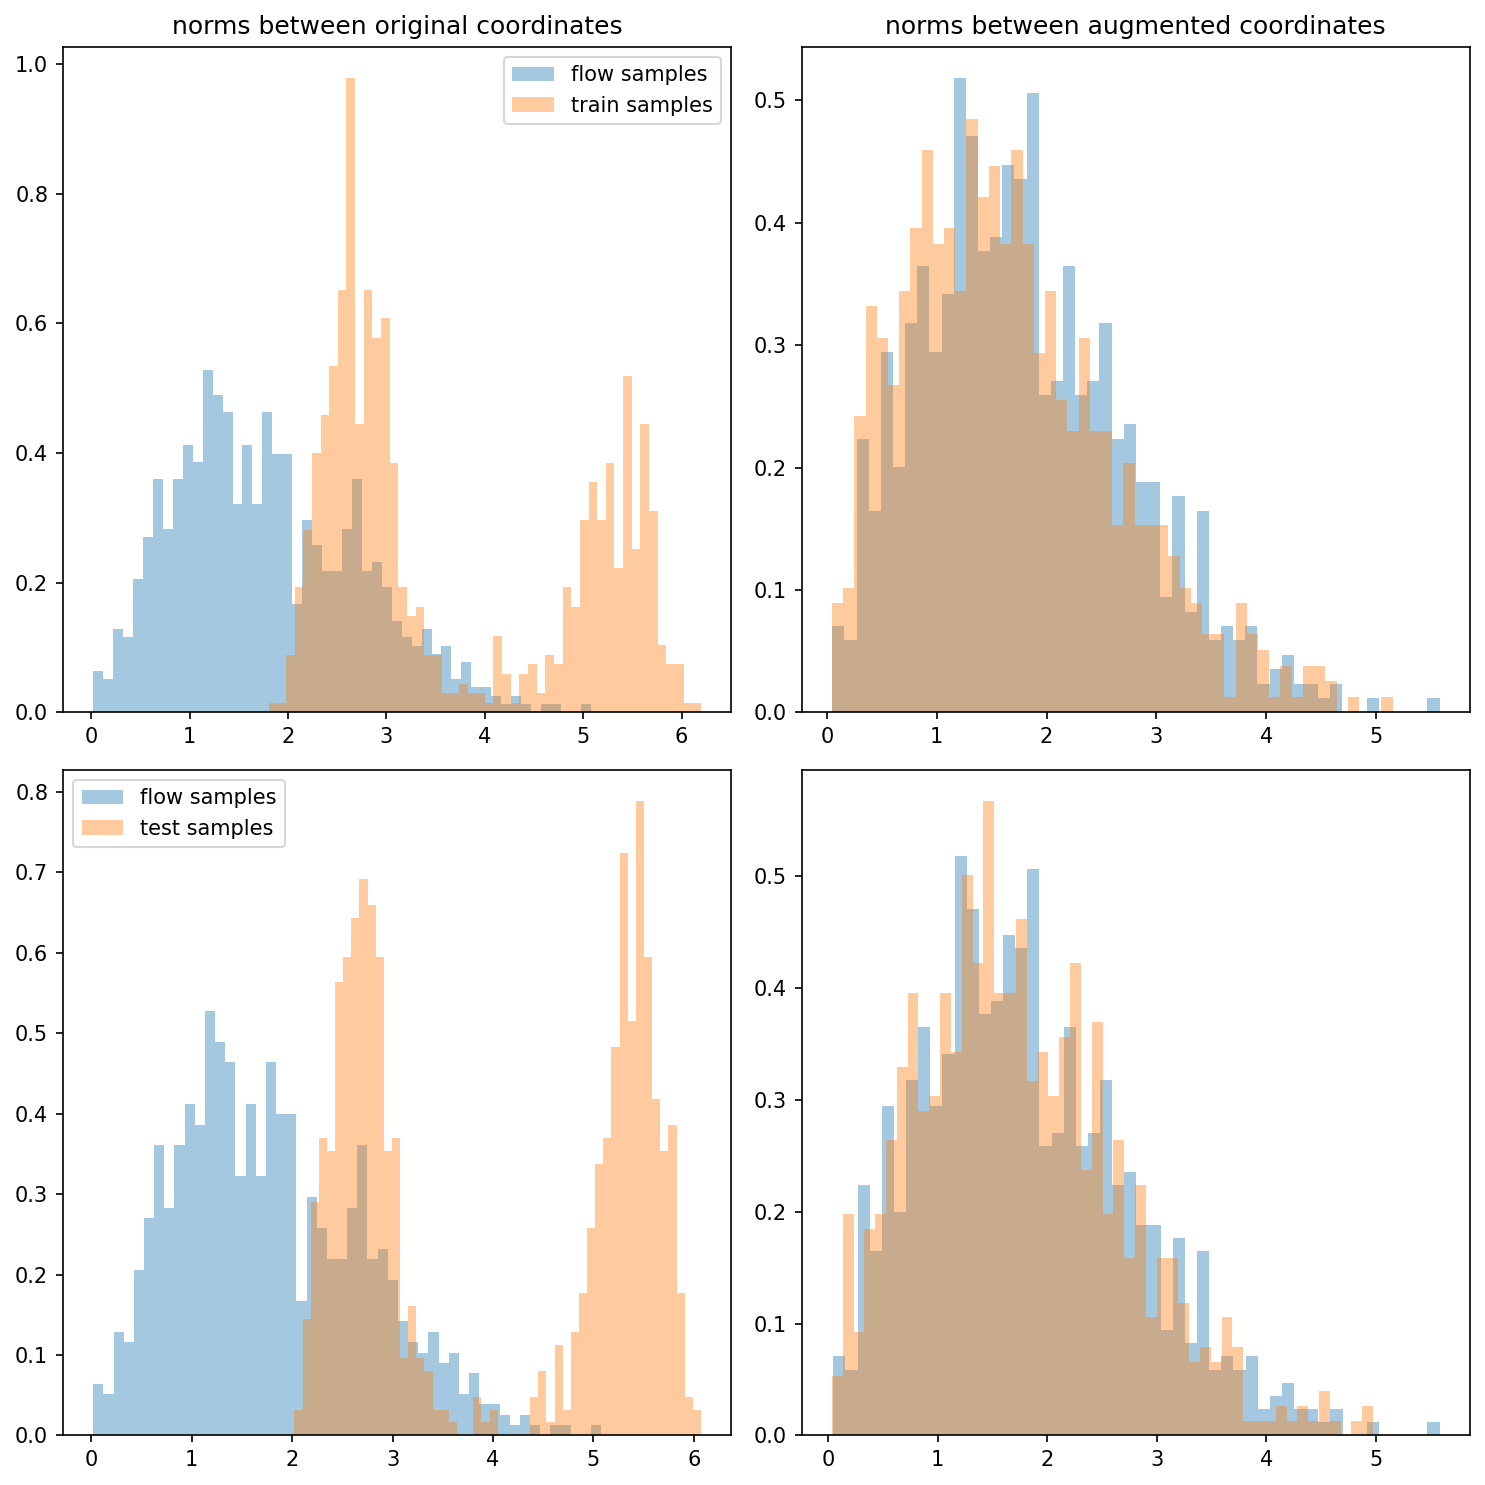

  0%|                                                                                                                                                                              | 0/100 [00:00<?, ?it/s]

non numeric history values being saved


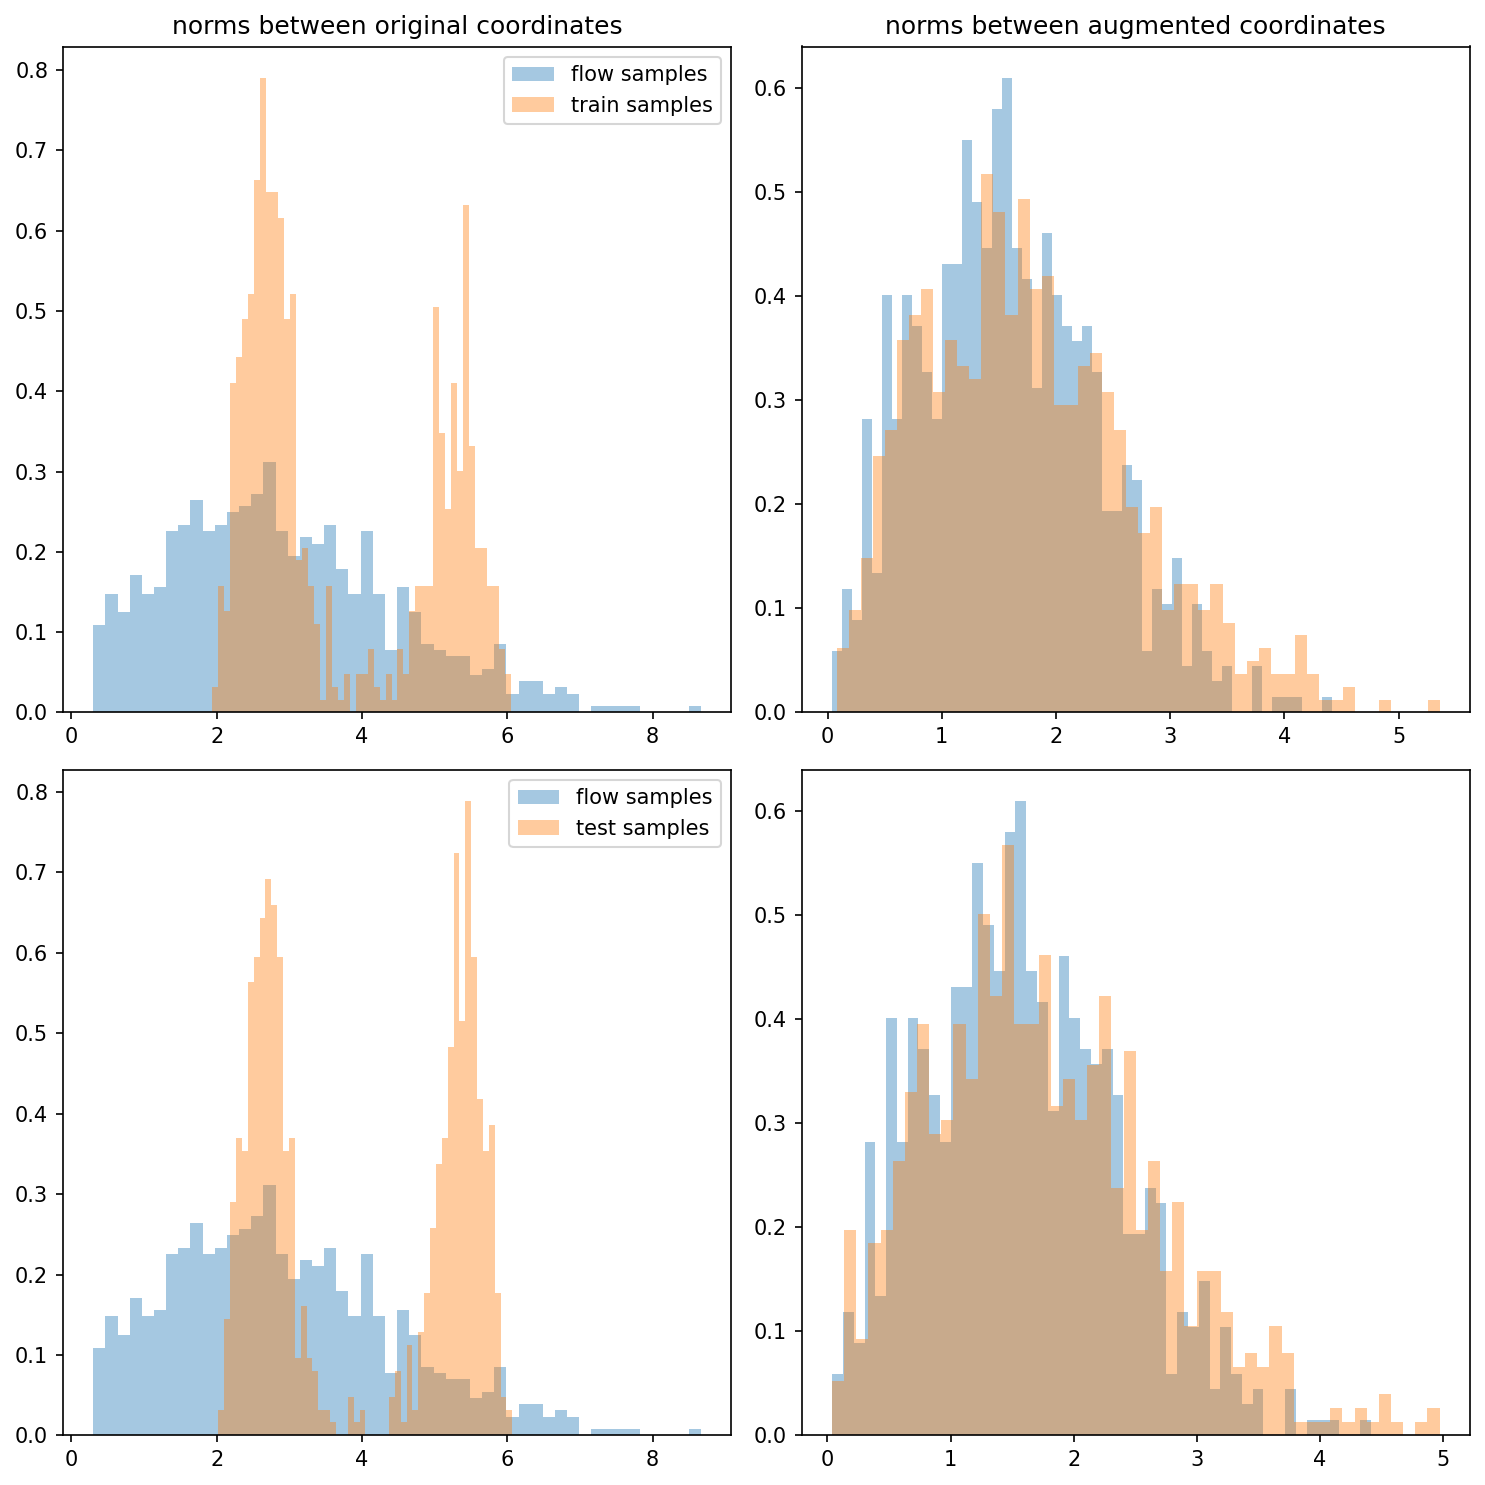

  1%|█▋                                                                                                                                                                    | 1/100 [00:33<55:06, 33.40s/it]

{'eval_log_lik': Array(-22.819279, dtype=float32), 'eval_marginal_log_lik': Array(-12.487122, dtype=float32)}


 12%|███████████████████▊                                                                                                                                                 | 12/100 [00:36<00:39,  2.24it/s]

{'eval_log_lik': Array(-22.671179, dtype=float32), 'eval_marginal_log_lik': Array(-12.314883, dtype=float32)}


 19%|███████████████████████████████▎                                                                                                                                     | 19/100 [00:37<00:20,  3.96it/s]

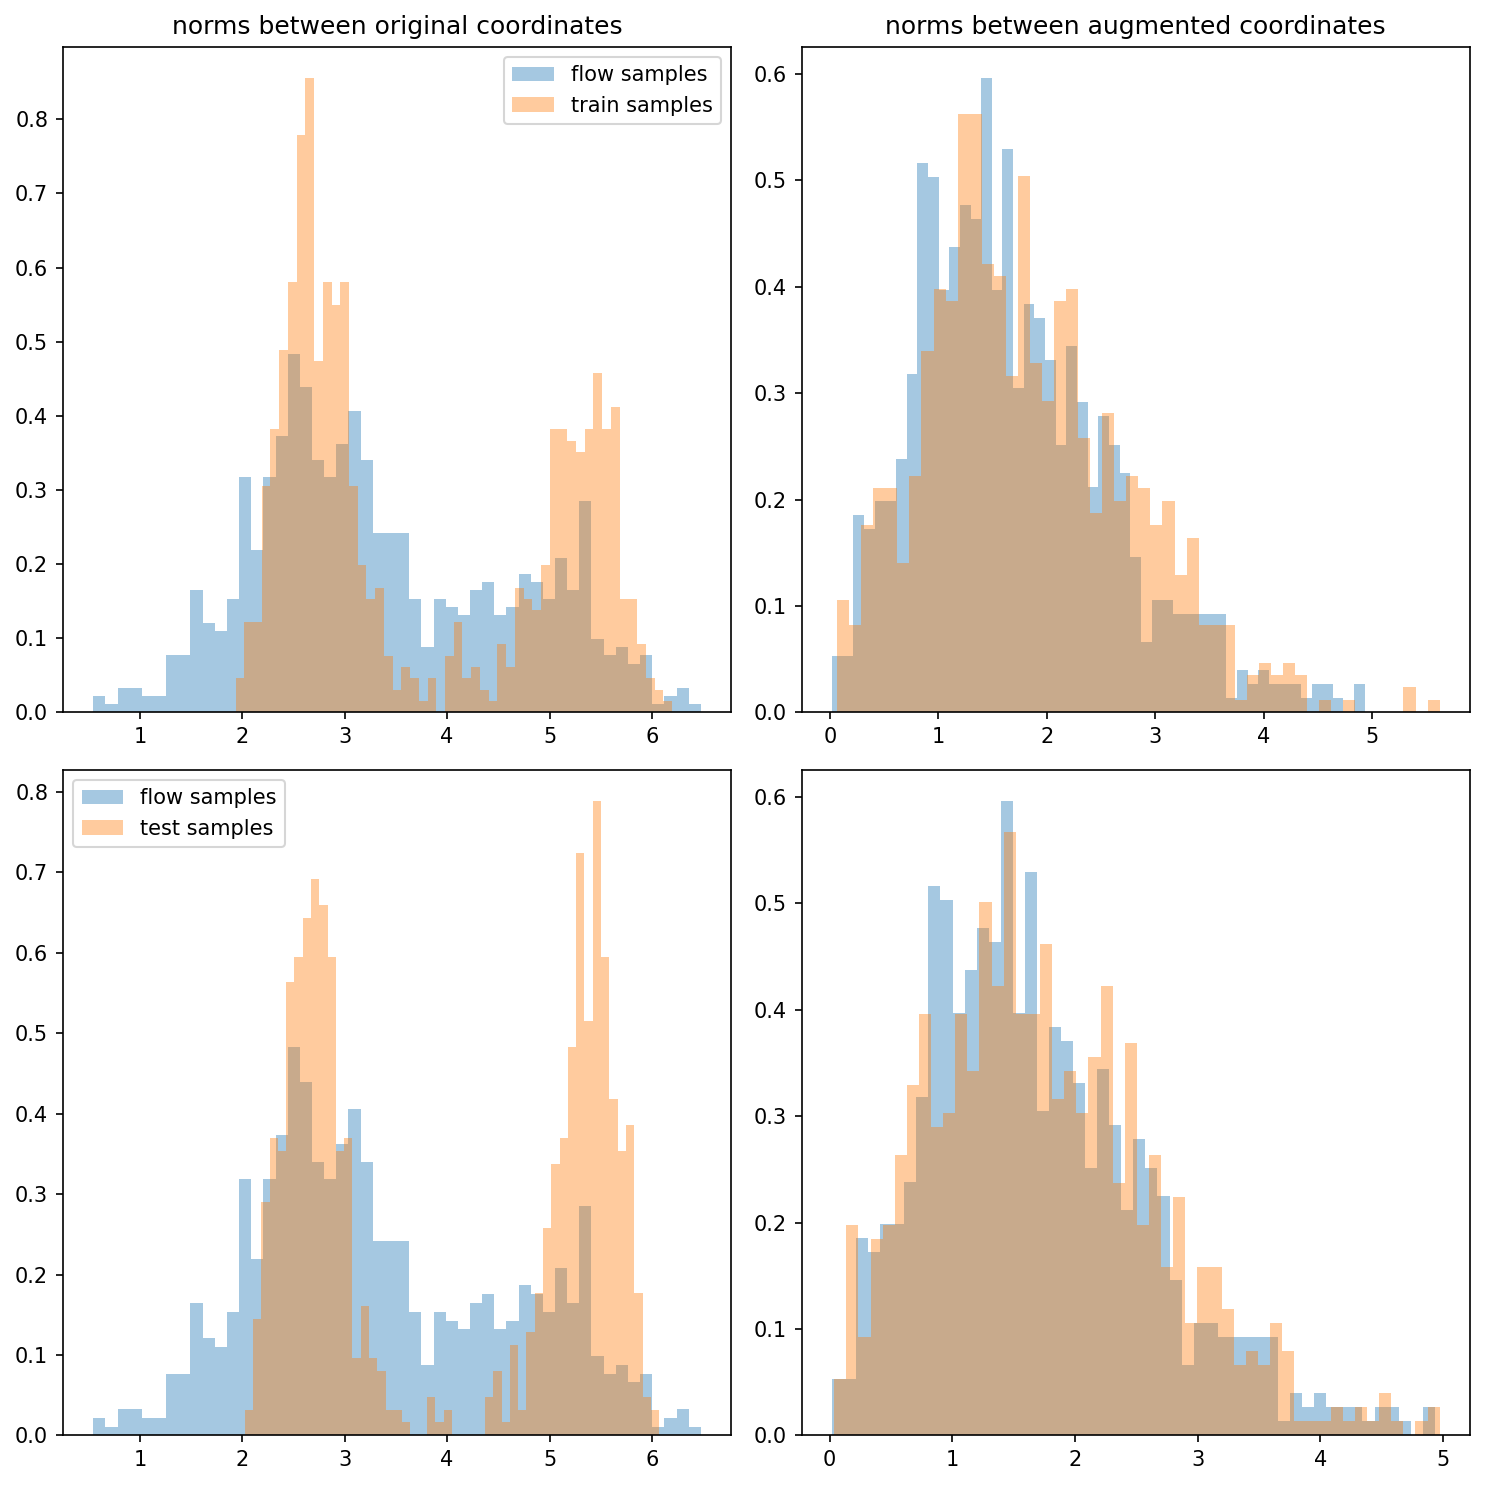

 23%|█████████████████████████████████████▉                                                                                                                               | 23/100 [00:40<00:37,  2.07it/s]

{'eval_log_lik': Array(-22.547384, dtype=float32), 'eval_marginal_log_lik': Array(-12.1935425, dtype=float32)}


 34%|████████████████████████████████████████████████████████                                                                                                             | 34/100 [00:43<00:16,  3.99it/s]

{'eval_log_lik': Array(-21.811865, dtype=float32), 'eval_marginal_log_lik': Array(-11.3963785, dtype=float32)}


 39%|████████████████████████████████████████████████████████████████▎                                                                                                    | 39/100 [00:44<00:14,  4.23it/s]

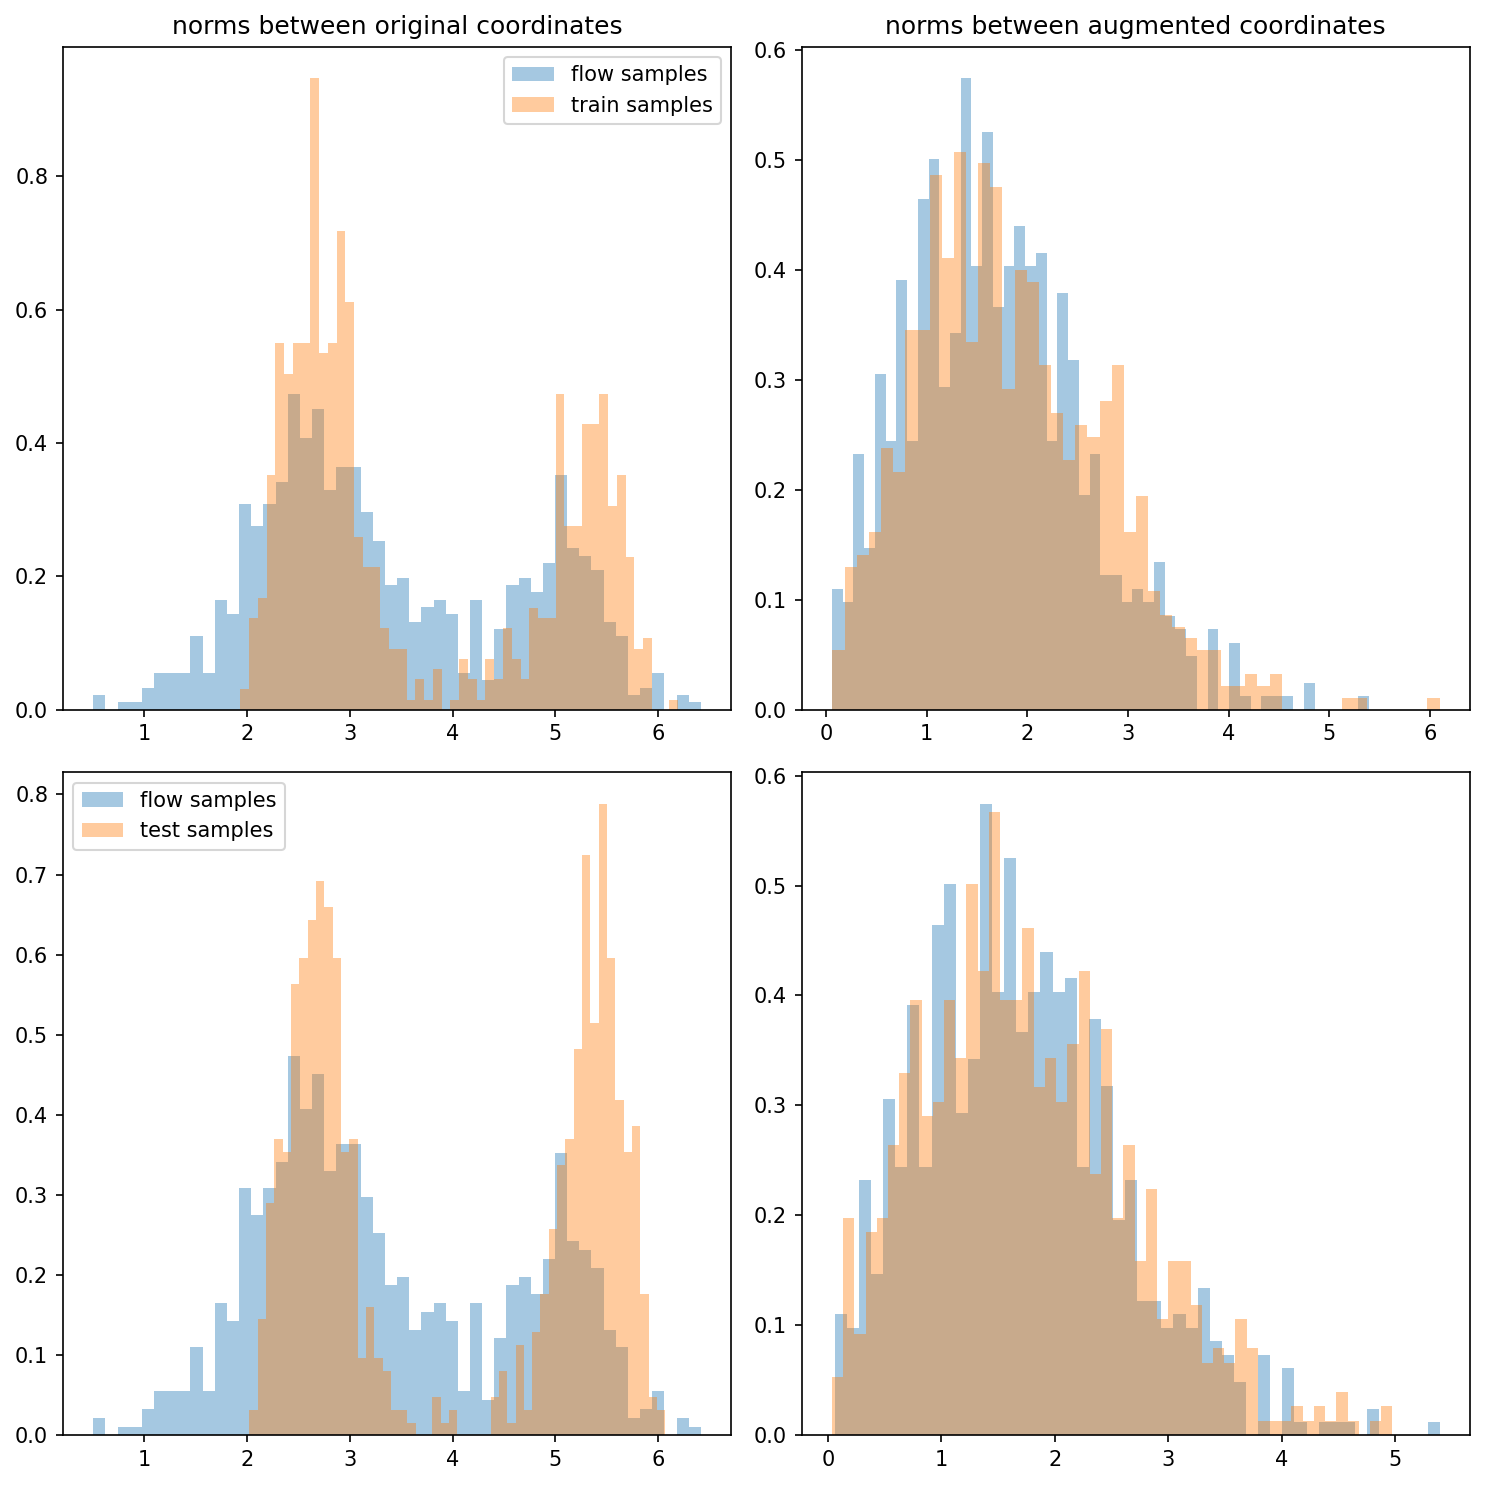

 45%|██████████████████████████████████████████████████████████████████████████▎                                                                                          | 45/100 [00:48<00:19,  2.80it/s]

{'eval_log_lik': Array(-23.492647, dtype=float32), 'eval_marginal_log_lik': Array(-13.14556, dtype=float32)}


 56%|████████████████████████████████████████████████████████████████████████████████████████████▍                                                                        | 56/100 [00:51<00:10,  4.00it/s]

{'eval_log_lik': Array(-23.71763, dtype=float32), 'eval_marginal_log_lik': Array(-13.436454, dtype=float32)}


 59%|█████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                   | 59/100 [00:51<00:09,  4.18it/s]

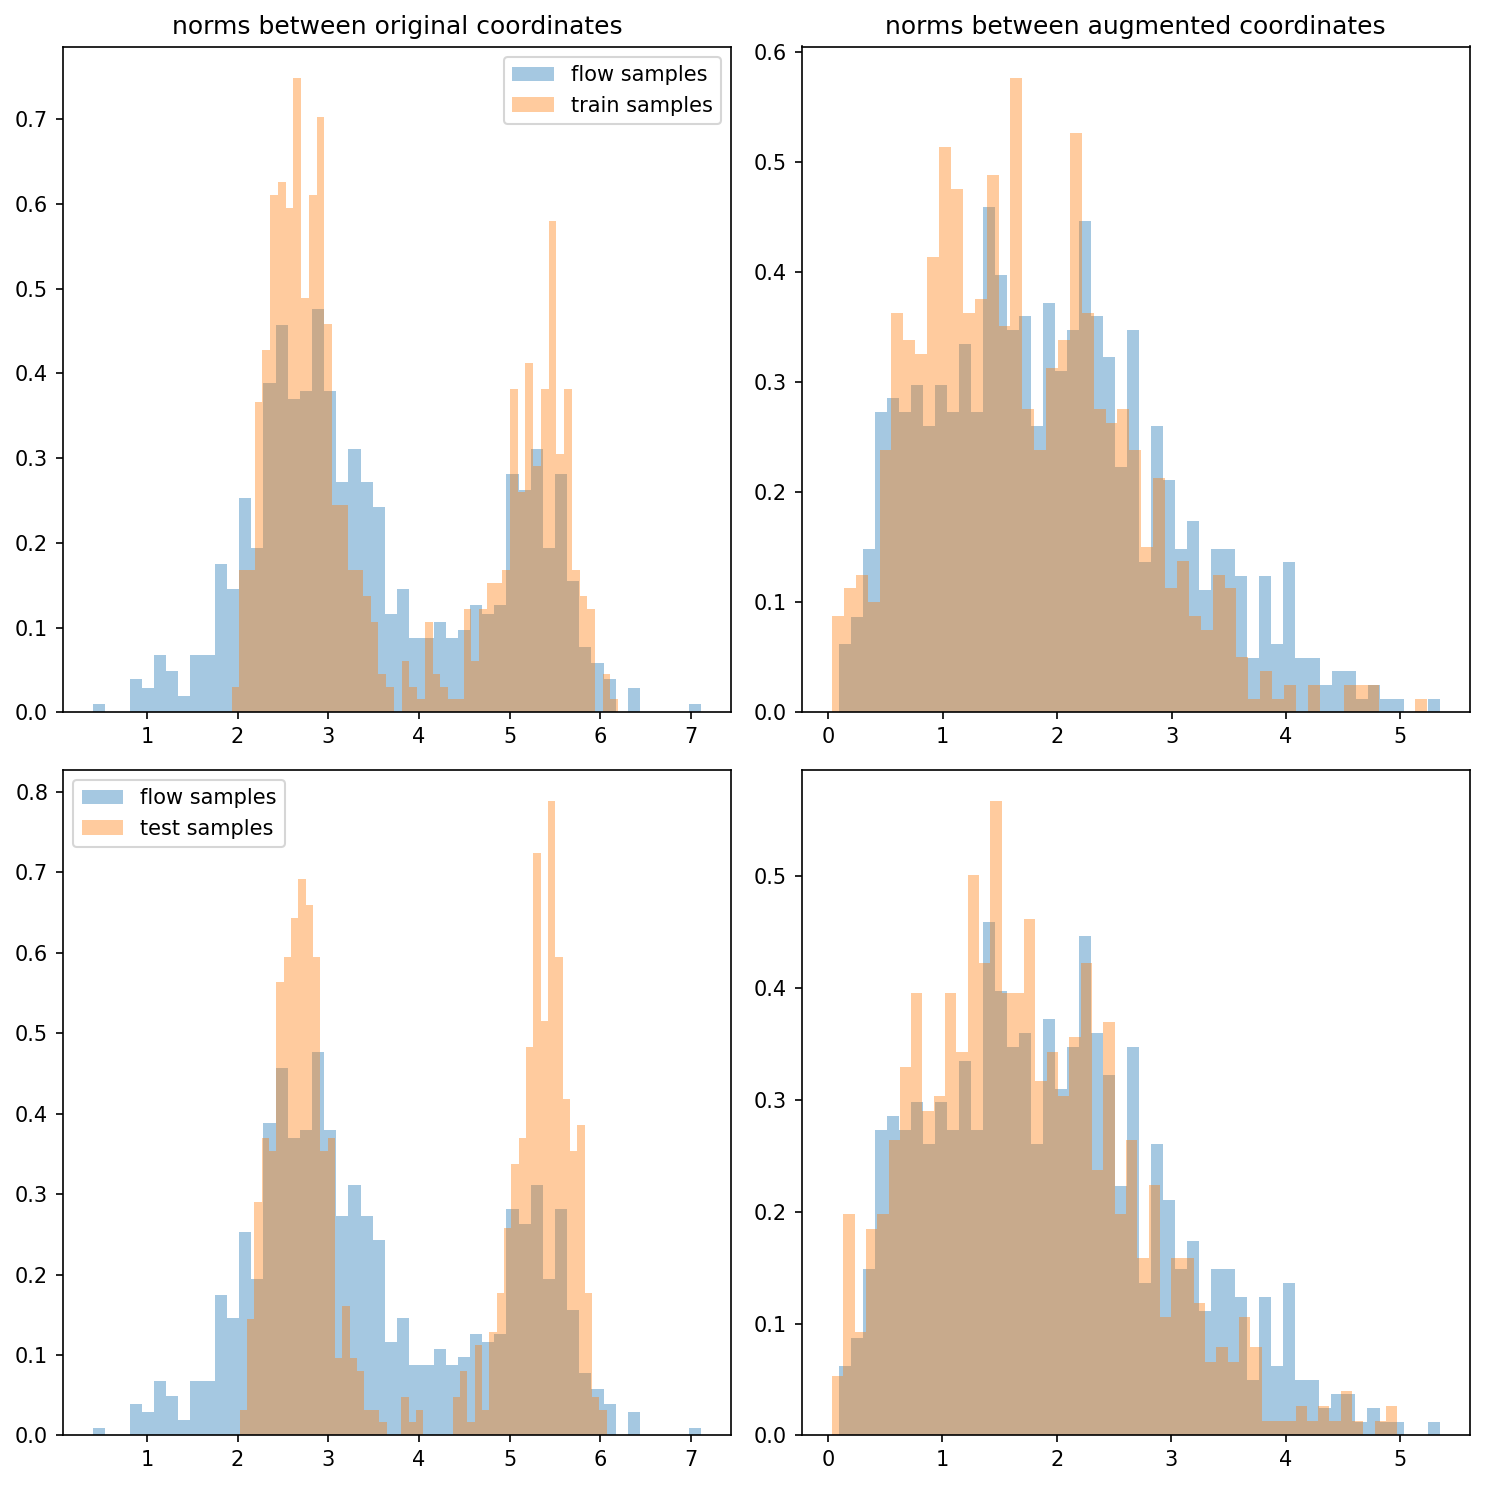

 67%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                      | 67/100 [00:55<00:09,  3.31it/s]

{'eval_log_lik': Array(-24.935658, dtype=float32), 'eval_marginal_log_lik': Array(-14.571479, dtype=float32)}


 78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                    | 78/100 [00:58<00:05,  4.04it/s]

{'eval_log_lik': Array(-25.061264, dtype=float32), 'eval_marginal_log_lik': Array(-14.728027, dtype=float32)}


 79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                  | 79/100 [00:58<00:05,  4.10it/s]

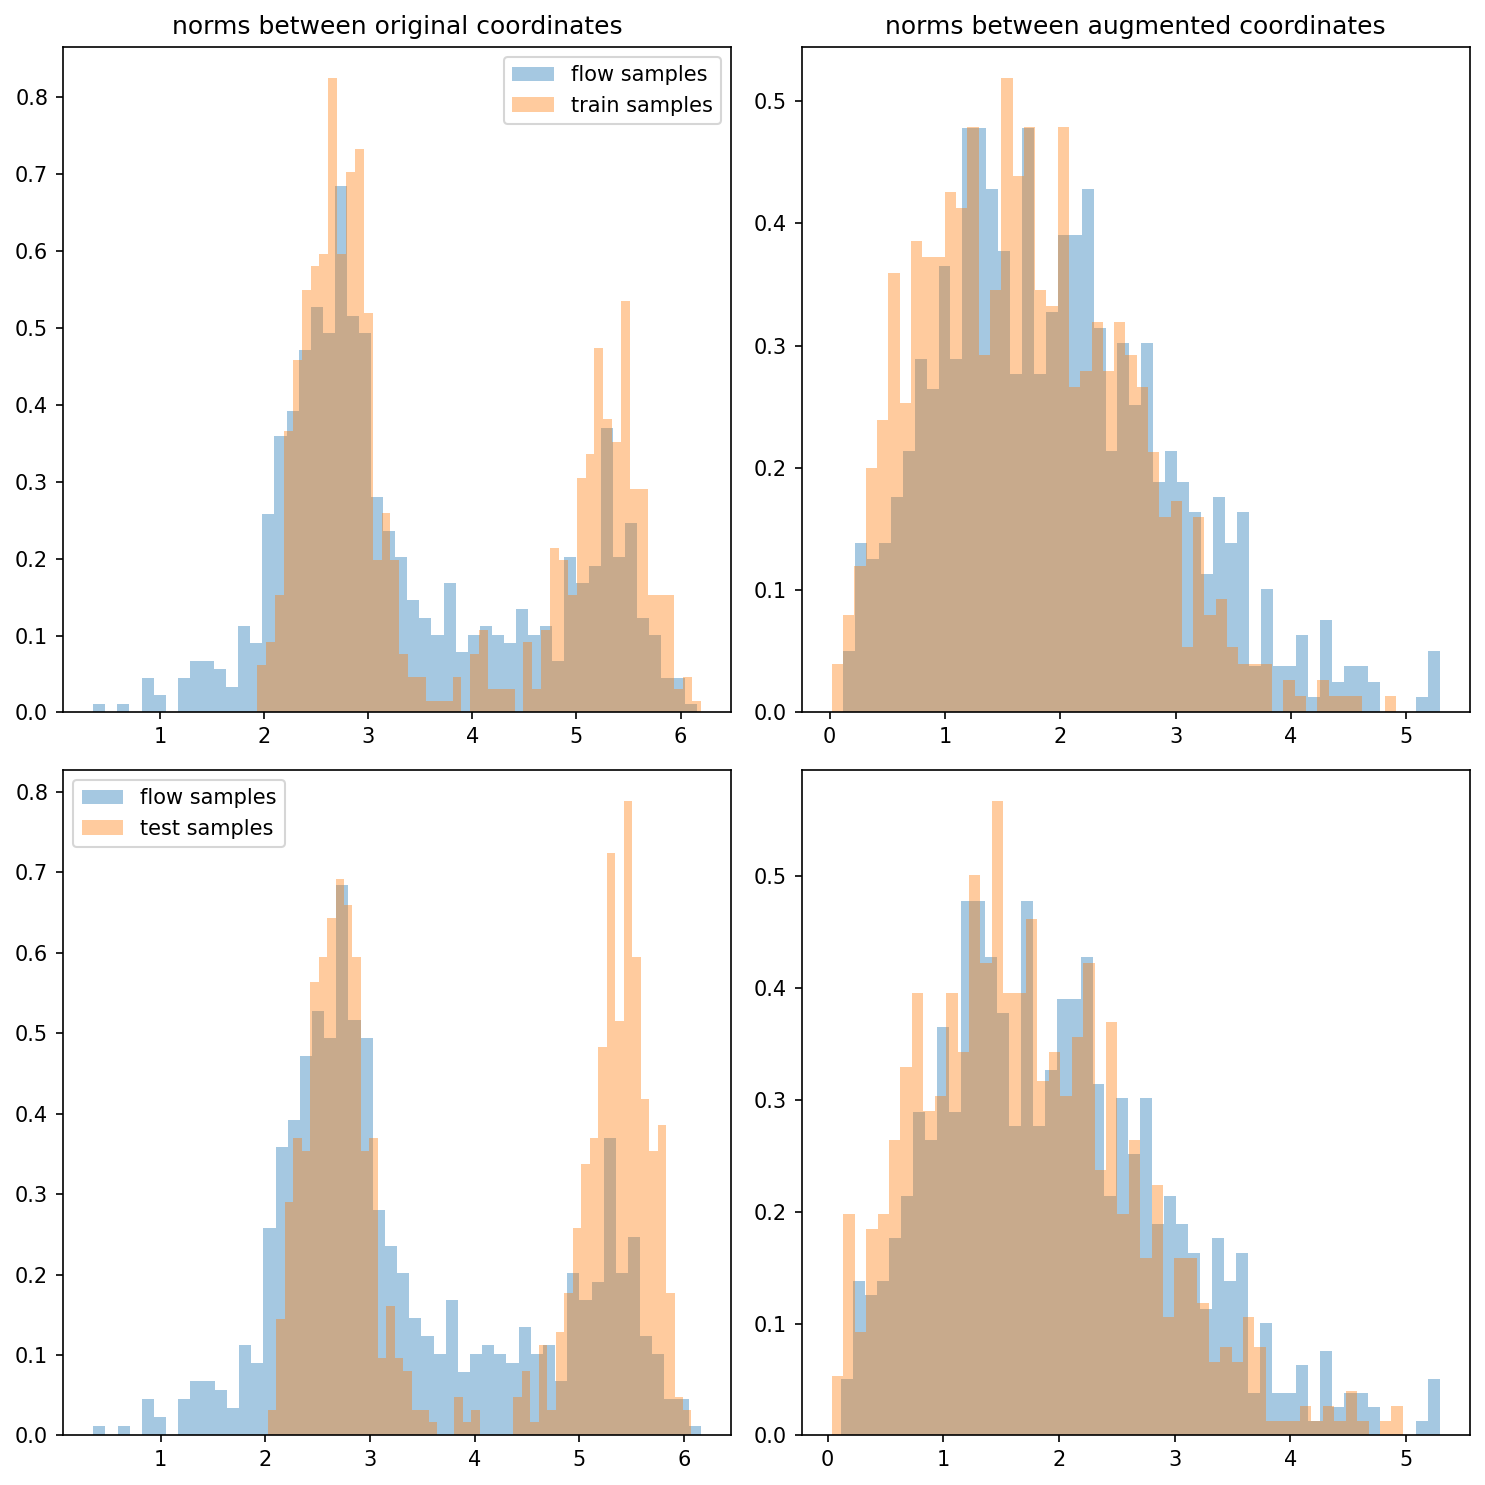

 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                  | 89/100 [01:03<00:02,  3.67it/s]

{'eval_log_lik': Array(-25.757294, dtype=float32), 'eval_marginal_log_lik': Array(-15.495203, dtype=float32)}


 99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎ | 99/100 [01:05<00:00,  4.26it/s]

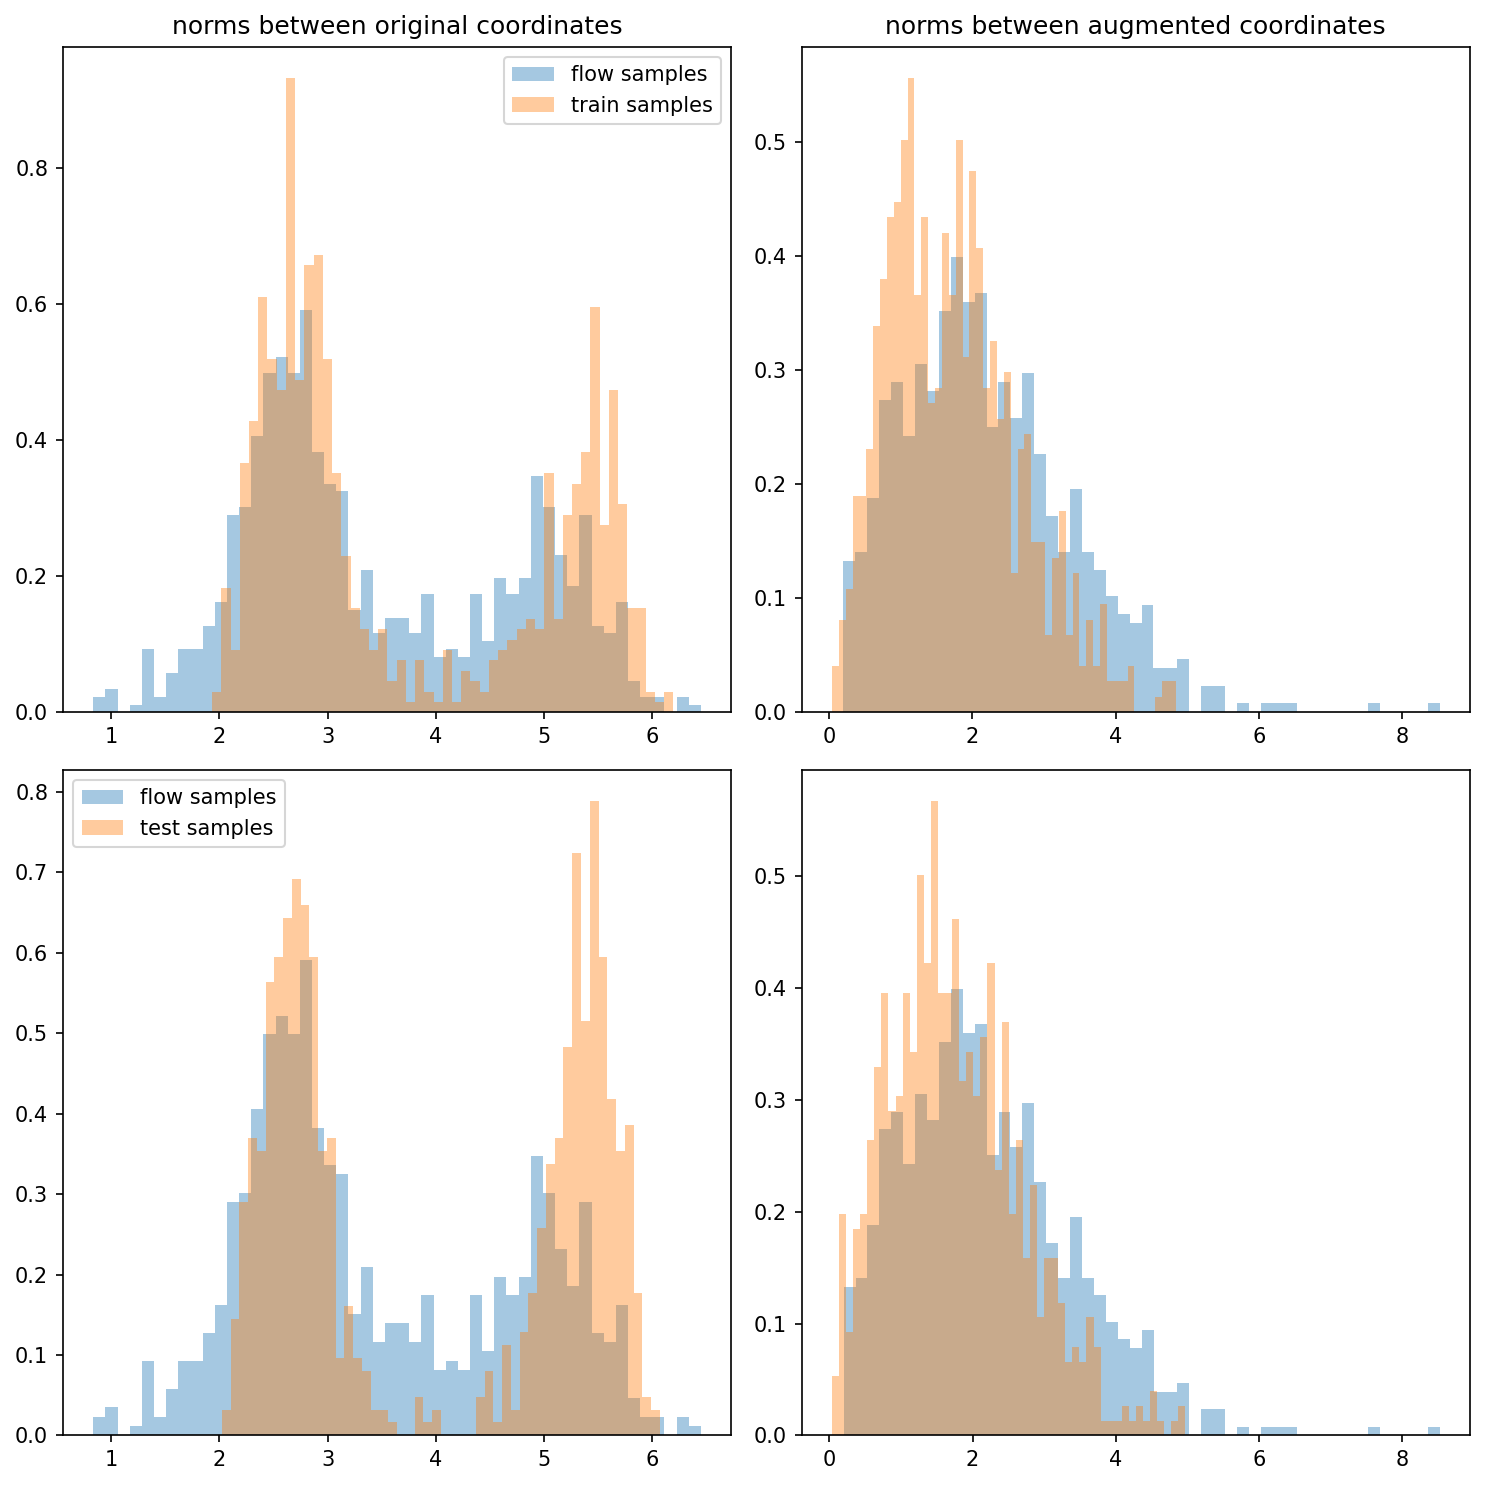

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [01:07<00:00,  1.47it/s]


{'eval_log_lik': Array(-26.672482, dtype=float32), 'eval_marginal_log_lik': Array(-16.32252, dtype=float32)}


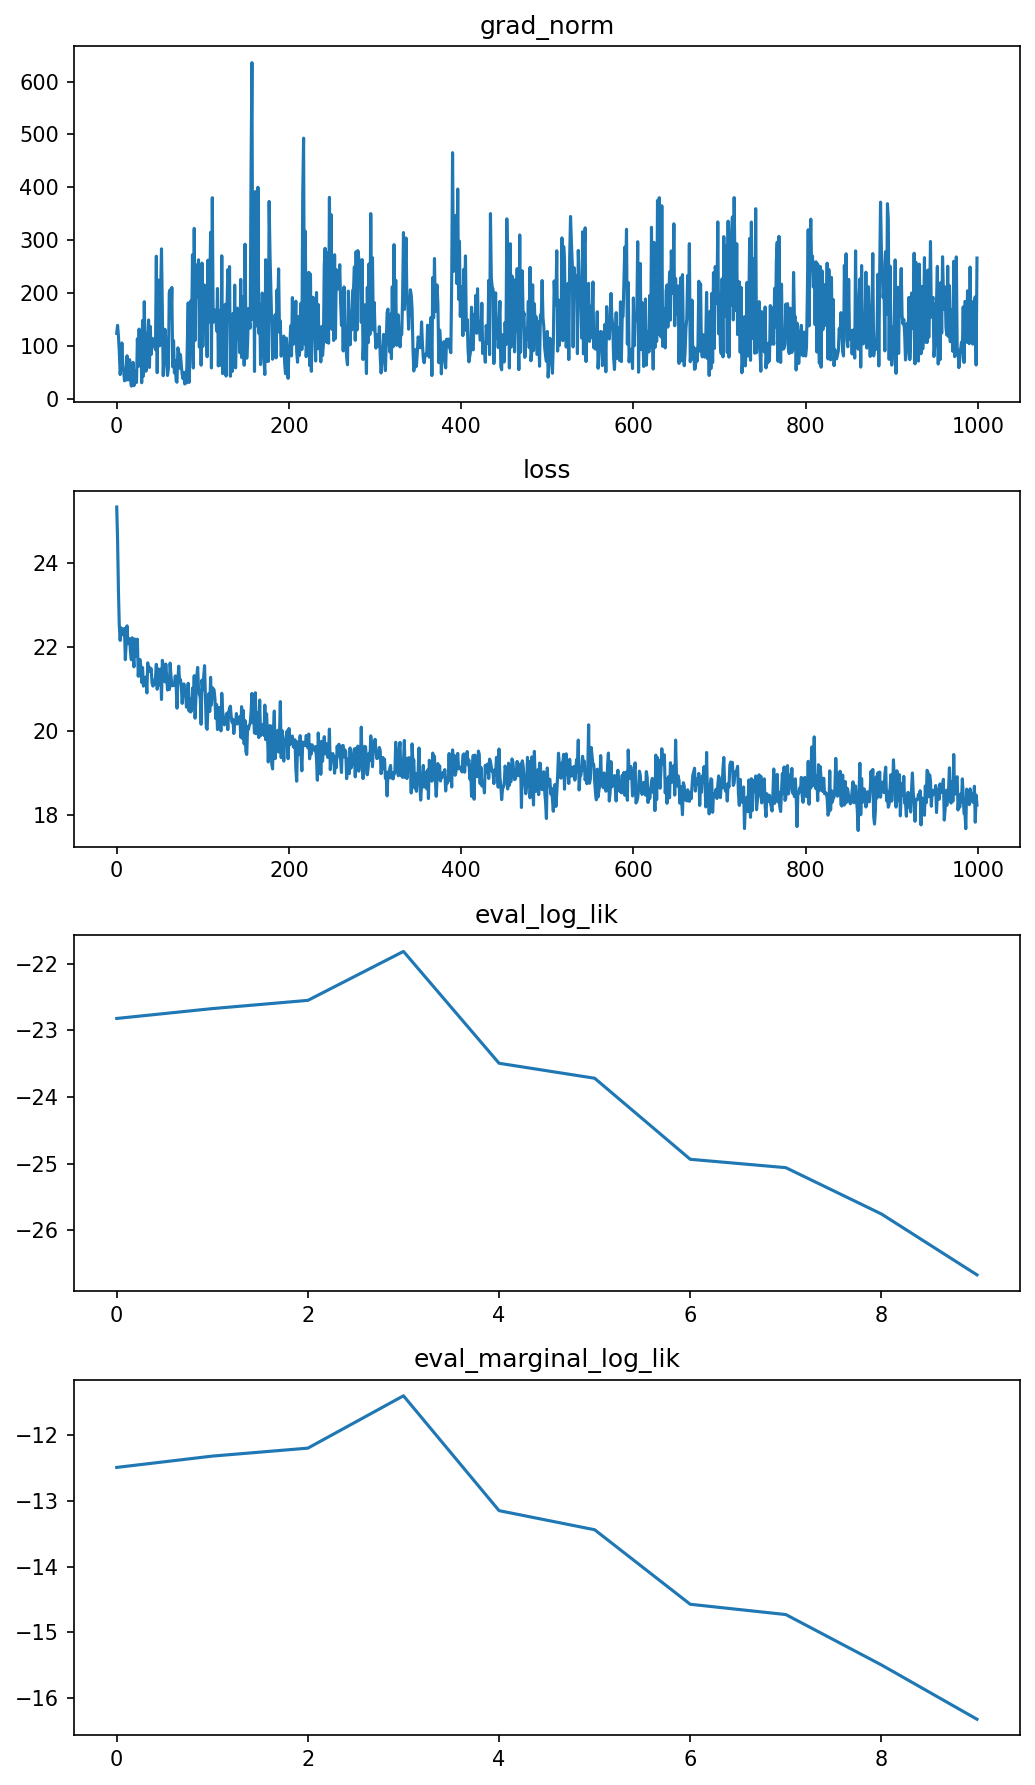

In [16]:
experiment_config = create_train_config(cfg, dim=2, n_nodes=4,
                                        load_dataset=load_dataset)

logger, params, log_prob_fn, sample_and_log_prob_fn = train(experiment_config)

## Compare to scale and shift flow

In [17]:
cfg.flow.type= "vector_scale_shift"
cfg.training.n_epoch = 200

training data size of 1000


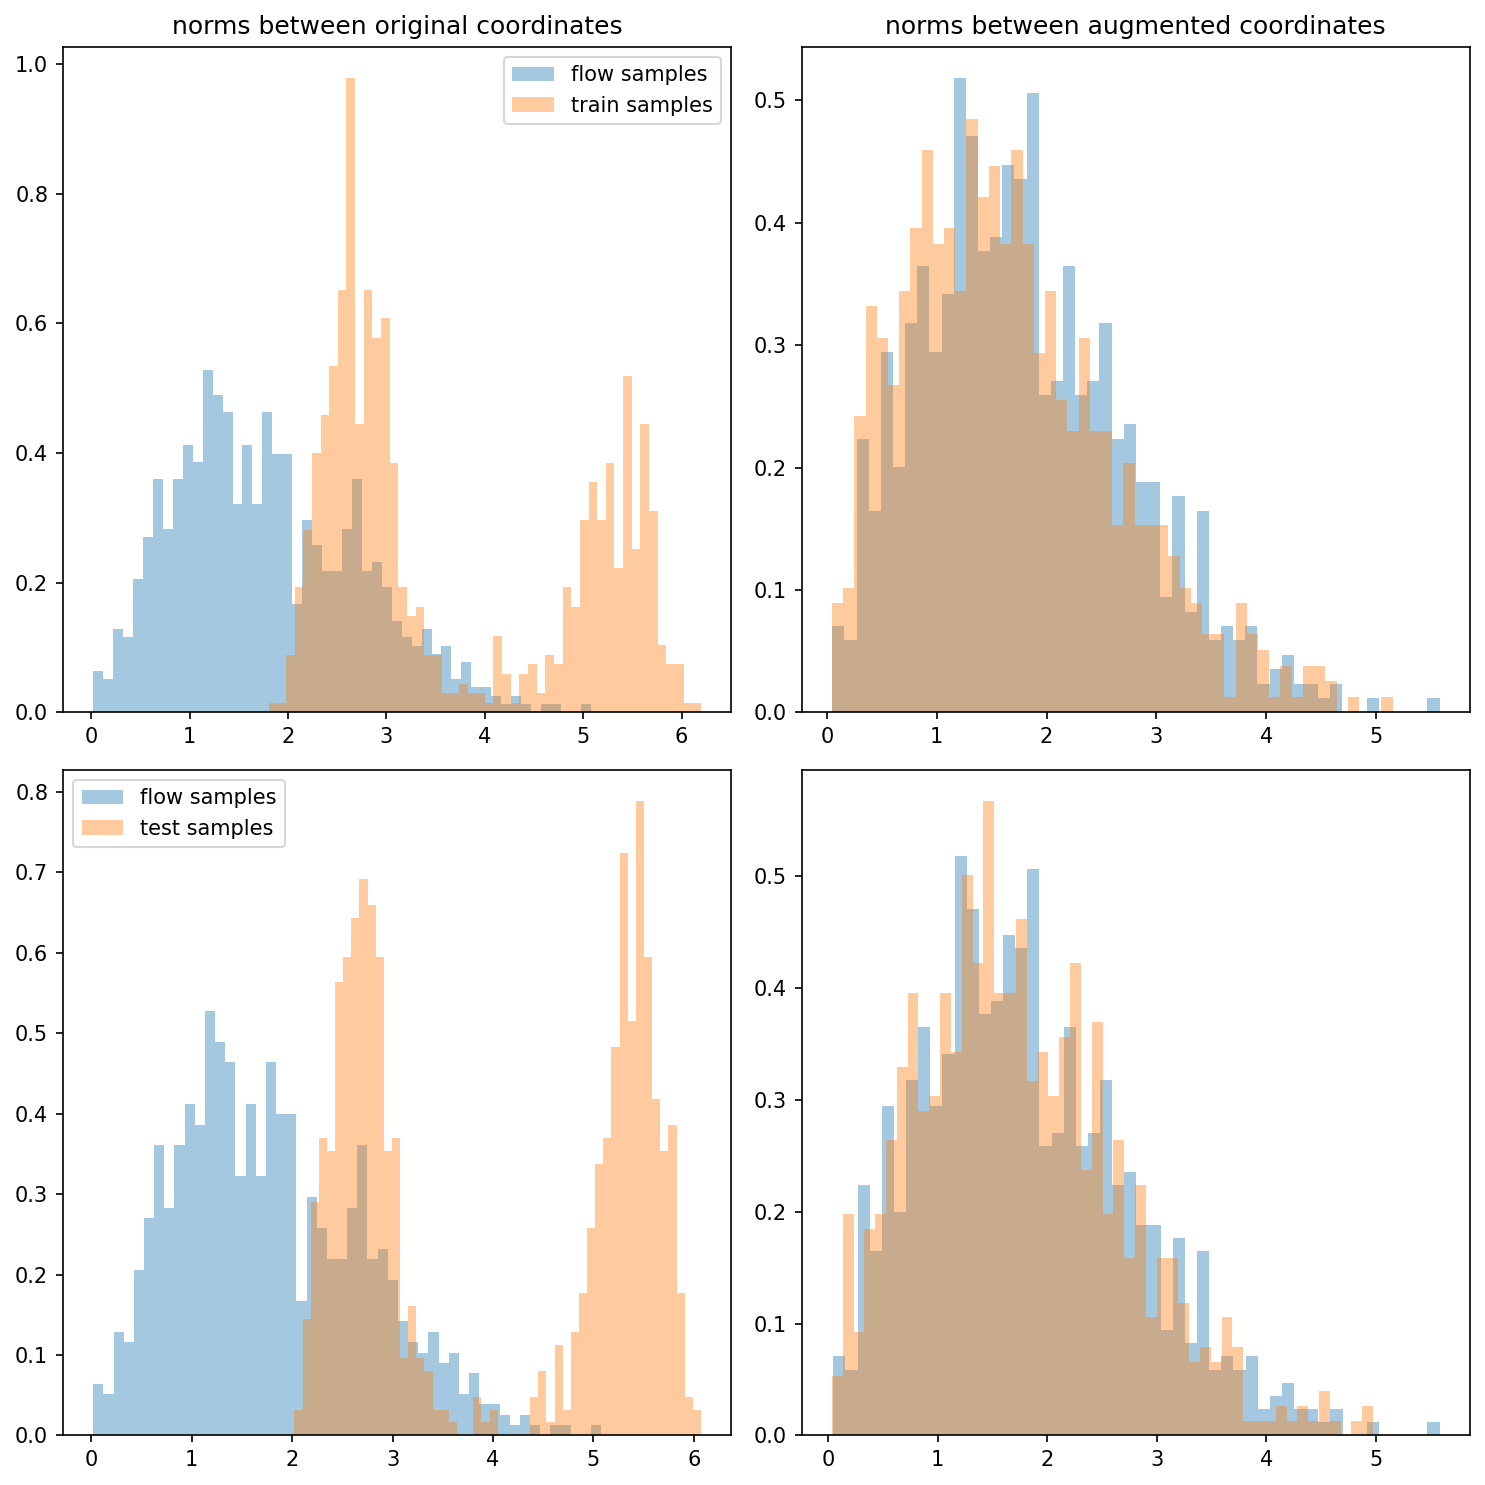

  0%|                                                                                                                                                                              | 0/200 [00:00<?, ?it/s]

non numeric history values being saved


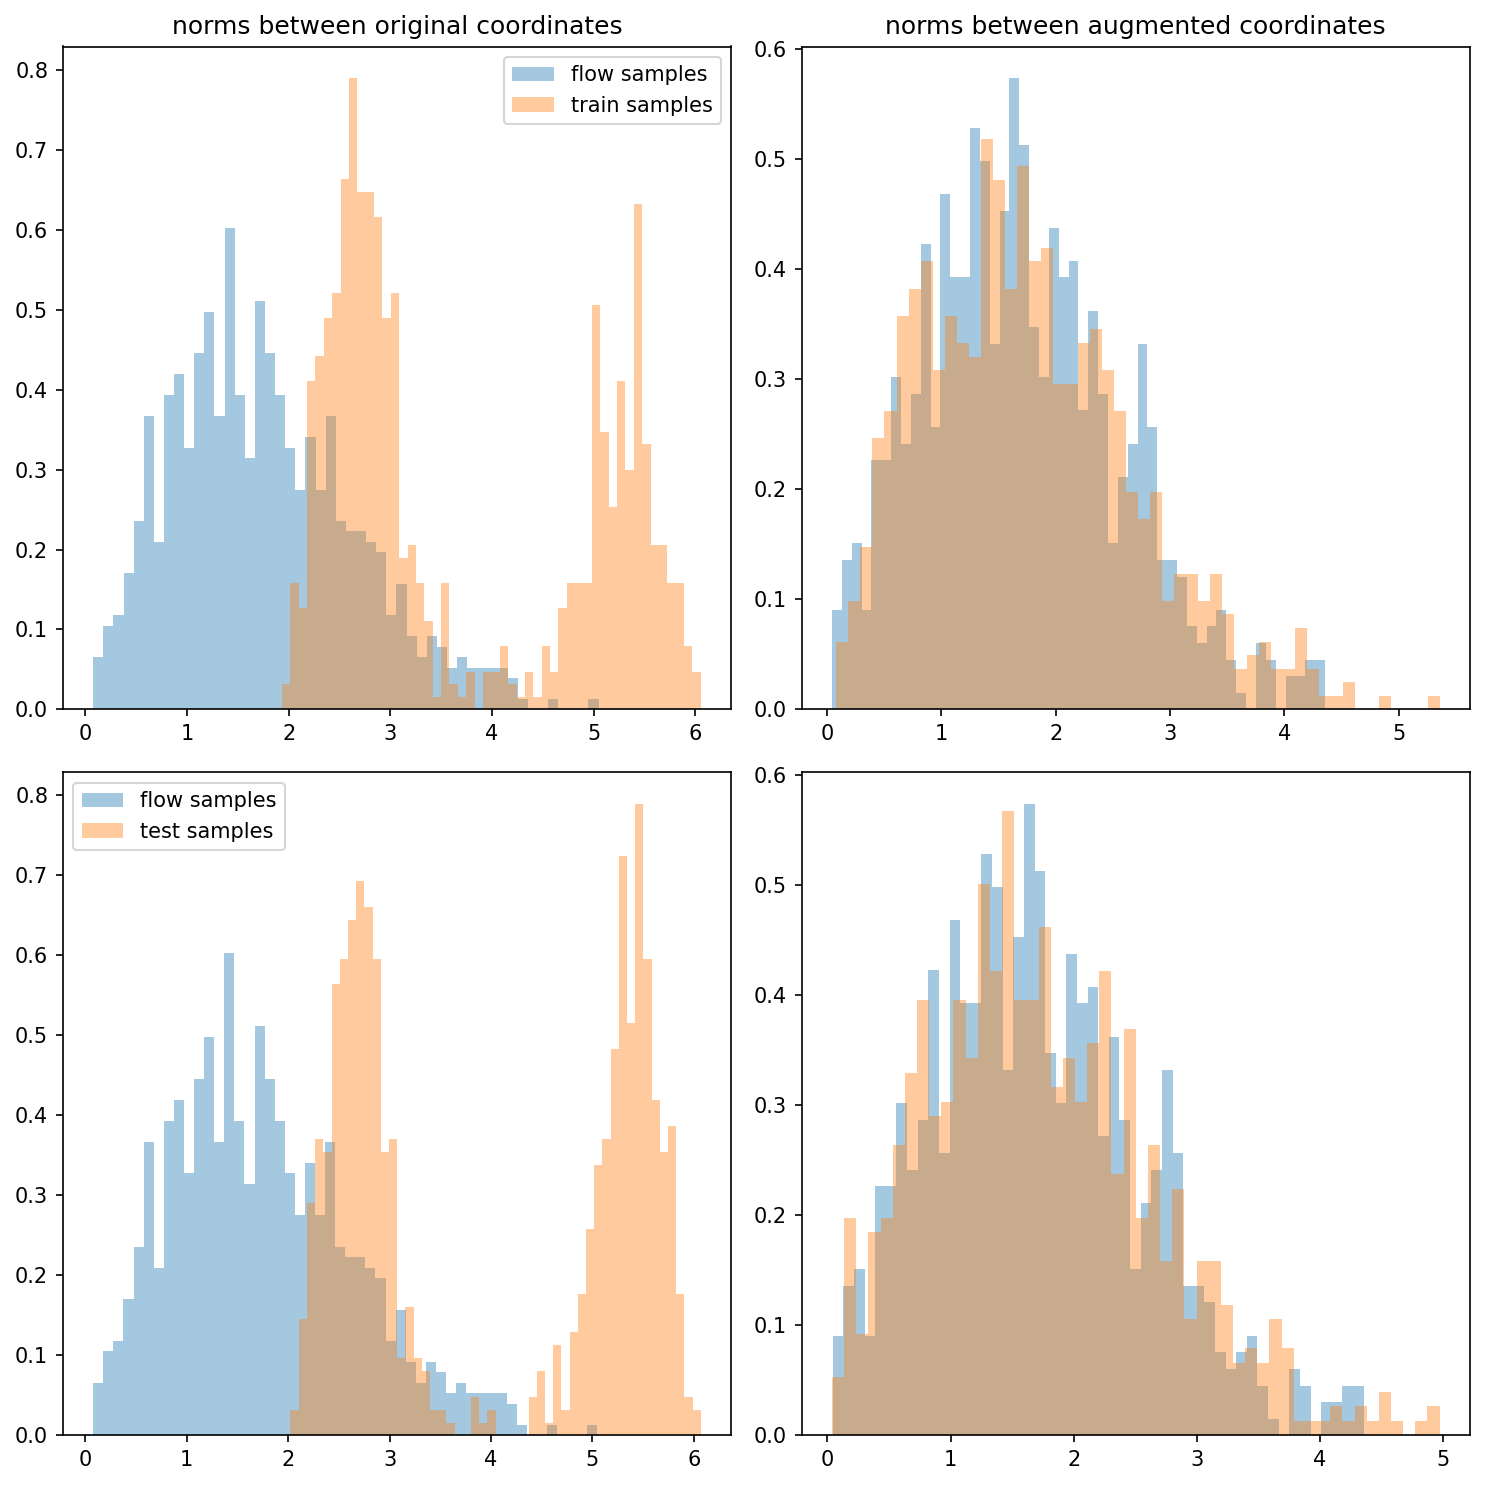

  1%|█▋                                                                                                                                                                    | 2/200 [00:24<33:02, 10.01s/it]

{'eval_log_lik': Array(-27.352013, dtype=float32), 'eval_marginal_log_lik': Array(-17.019854, dtype=float32)}


 12%|███████████████████▊                                                                                                                                                 | 24/200 [00:26<00:20,  8.52it/s]

{'eval_log_lik': Array(-22.16786, dtype=float32), 'eval_marginal_log_lik': Array(-11.871895, dtype=float32)}


 20%|████████████████████████████████▏                                                                                                                                    | 39/200 [00:28<00:17,  8.97it/s]

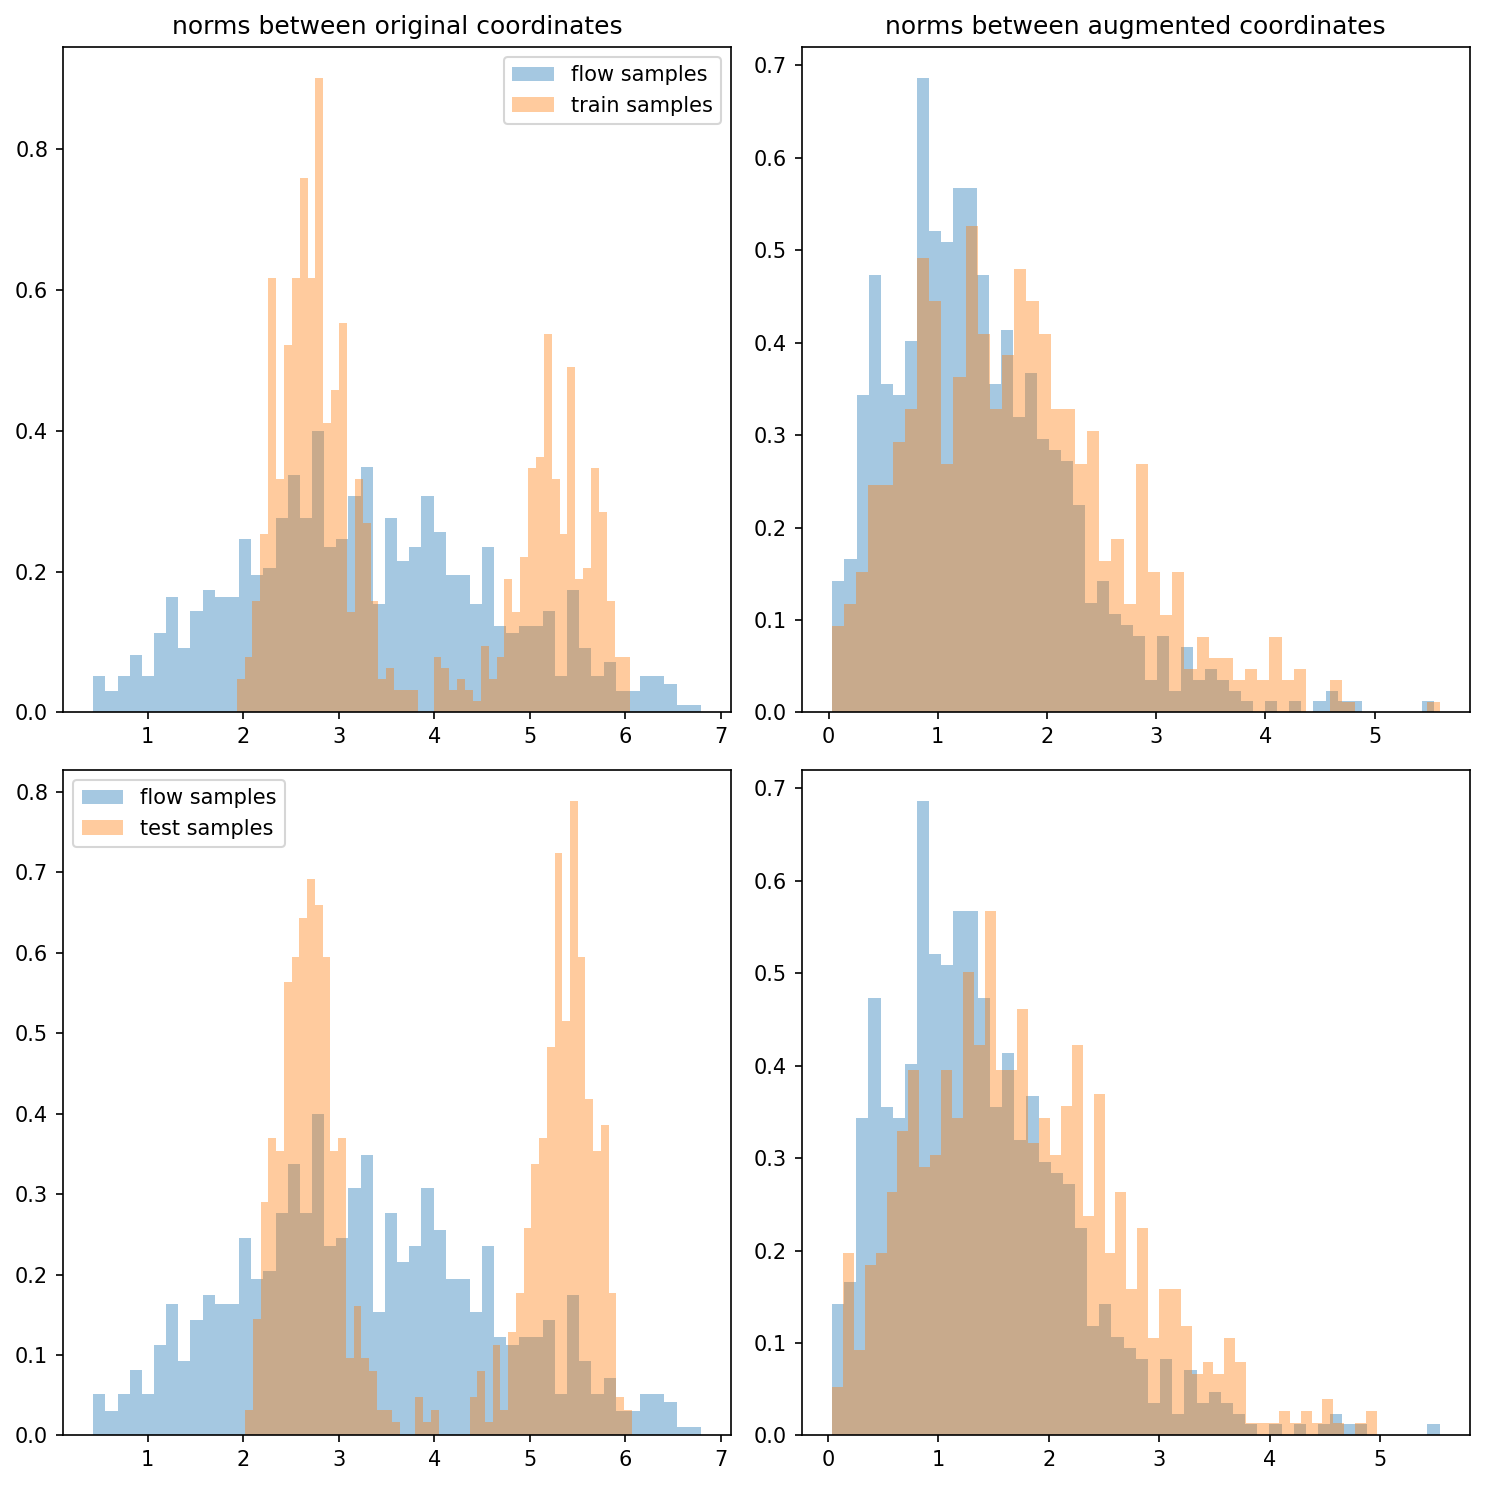

 23%|█████████████████████████████████████▉                                                                                                                               | 46/200 [00:31<00:29,  5.16it/s]

{'eval_log_lik': Array(-21.29535, dtype=float32), 'eval_marginal_log_lik': Array(-11.050254, dtype=float32)}


 34%|████████████████████████████████████████████████████████                                                                                                             | 68/200 [00:33<00:15,  8.65it/s]

{'eval_log_lik': Array(-20.500278, dtype=float32), 'eval_marginal_log_lik': Array(-10.19052, dtype=float32)}


 40%|█████████████████████████████████████████████████████████████████▏                                                                                                   | 79/200 [00:35<00:13,  8.67it/s]

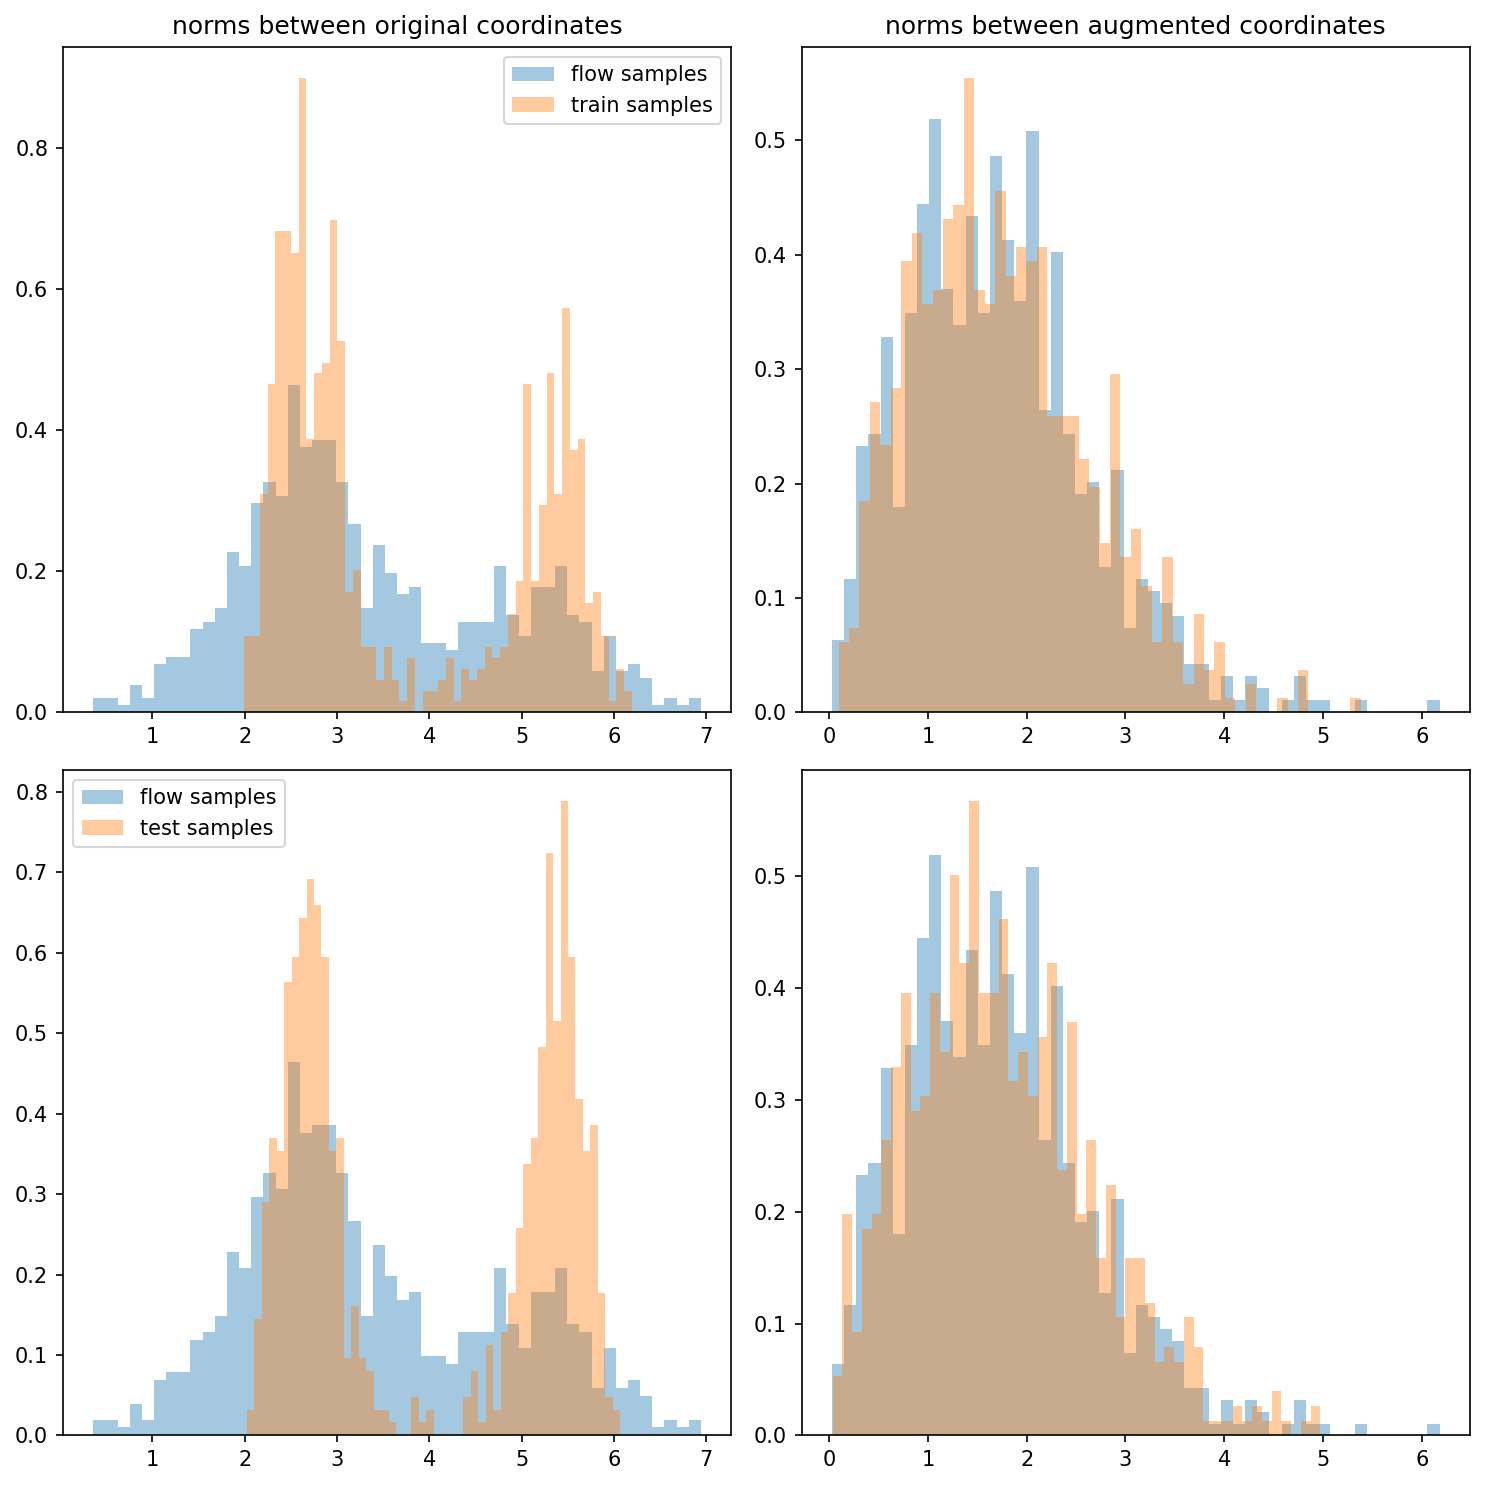

 45%|██████████████████████████████████████████████████████████████████████████▎                                                                                          | 90/200 [00:38<00:15,  7.18it/s]

{'eval_log_lik': Array(-20.290363, dtype=float32), 'eval_marginal_log_lik': Array(-10.059044, dtype=float32)}


 56%|███████████████████████████████████████████████████████████████████████████████████████████▊                                                                        | 112/200 [00:41<00:10,  8.67it/s]

{'eval_log_lik': Array(-20.185118, dtype=float32), 'eval_marginal_log_lik': Array(-9.901477, dtype=float32)}


 60%|█████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                  | 119/200 [00:41<00:09,  8.96it/s]

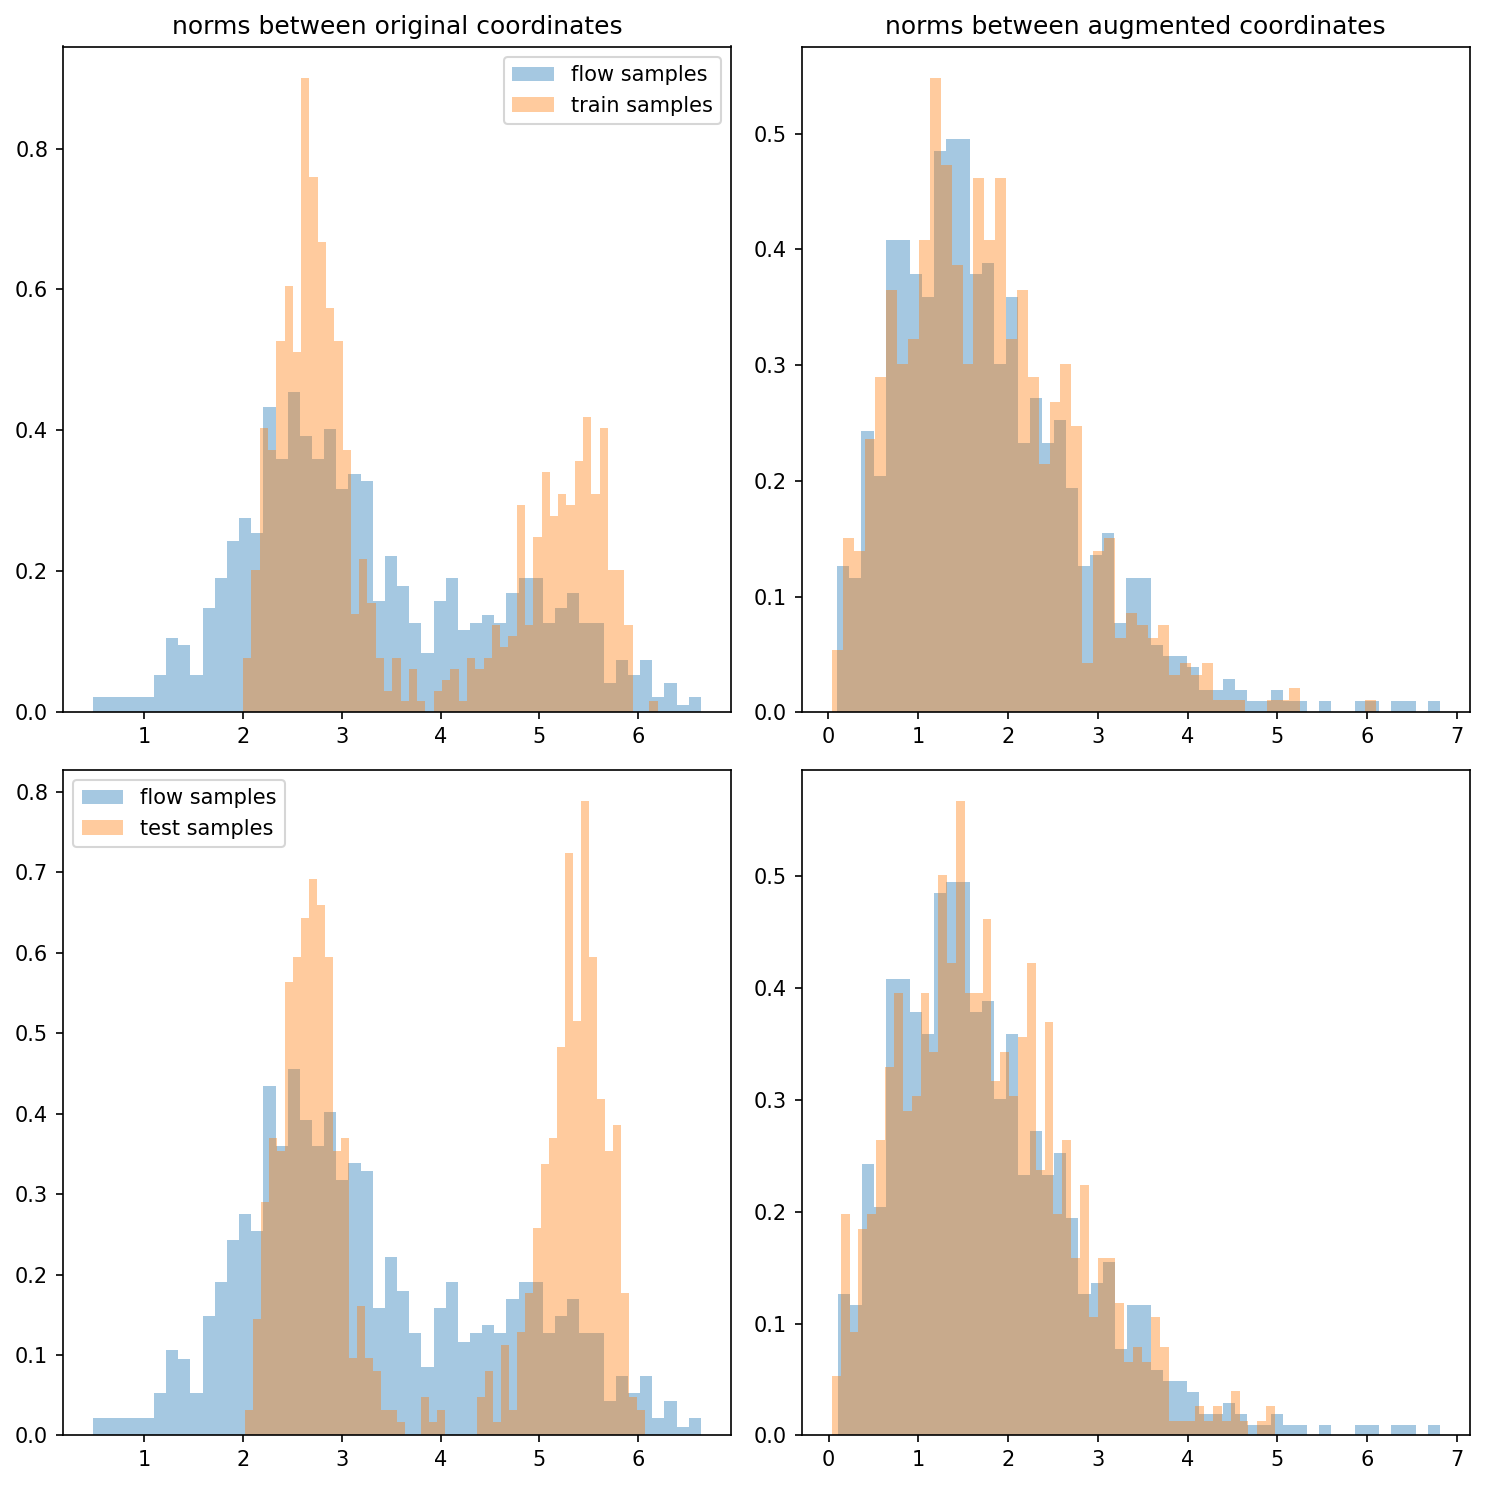

 67%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                      | 134/200 [00:45<00:08,  7.84it/s]

{'eval_log_lik': Array(-20.083899, dtype=float32), 'eval_marginal_log_lik': Array(-9.8169, dtype=float32)}


 78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                    | 156/200 [00:48<00:05,  8.63it/s]

{'eval_log_lik': Array(-19.96201, dtype=float32), 'eval_marginal_log_lik': Array(-9.591319, dtype=float32)}


 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                 | 159/200 [00:48<00:04,  8.37it/s]

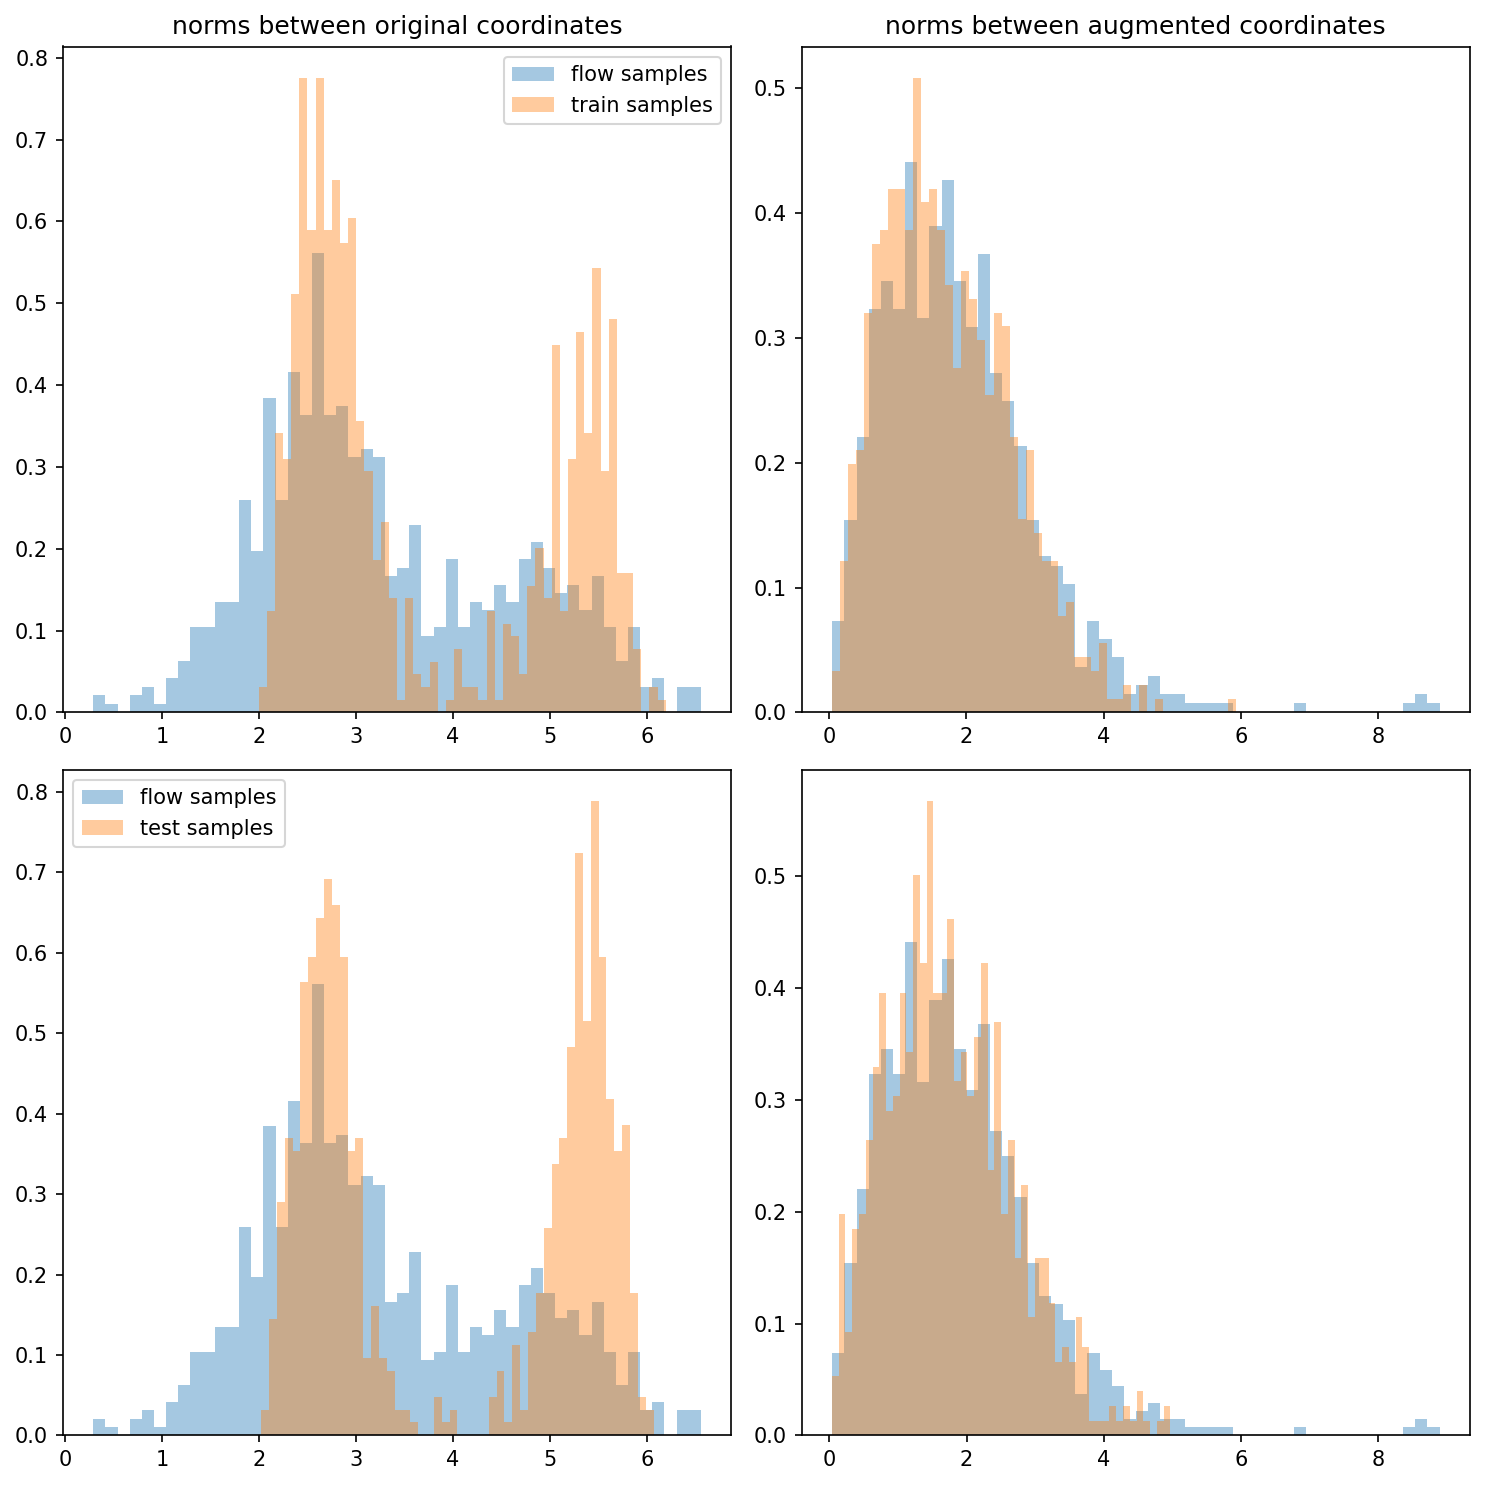

 89%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                  | 178/200 [00:53<00:03,  6.73it/s]

{'eval_log_lik': Array(-20.026655, dtype=float32), 'eval_marginal_log_lik': Array(-9.714573, dtype=float32)}


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏| 199/200 [00:55<00:00,  8.94it/s]

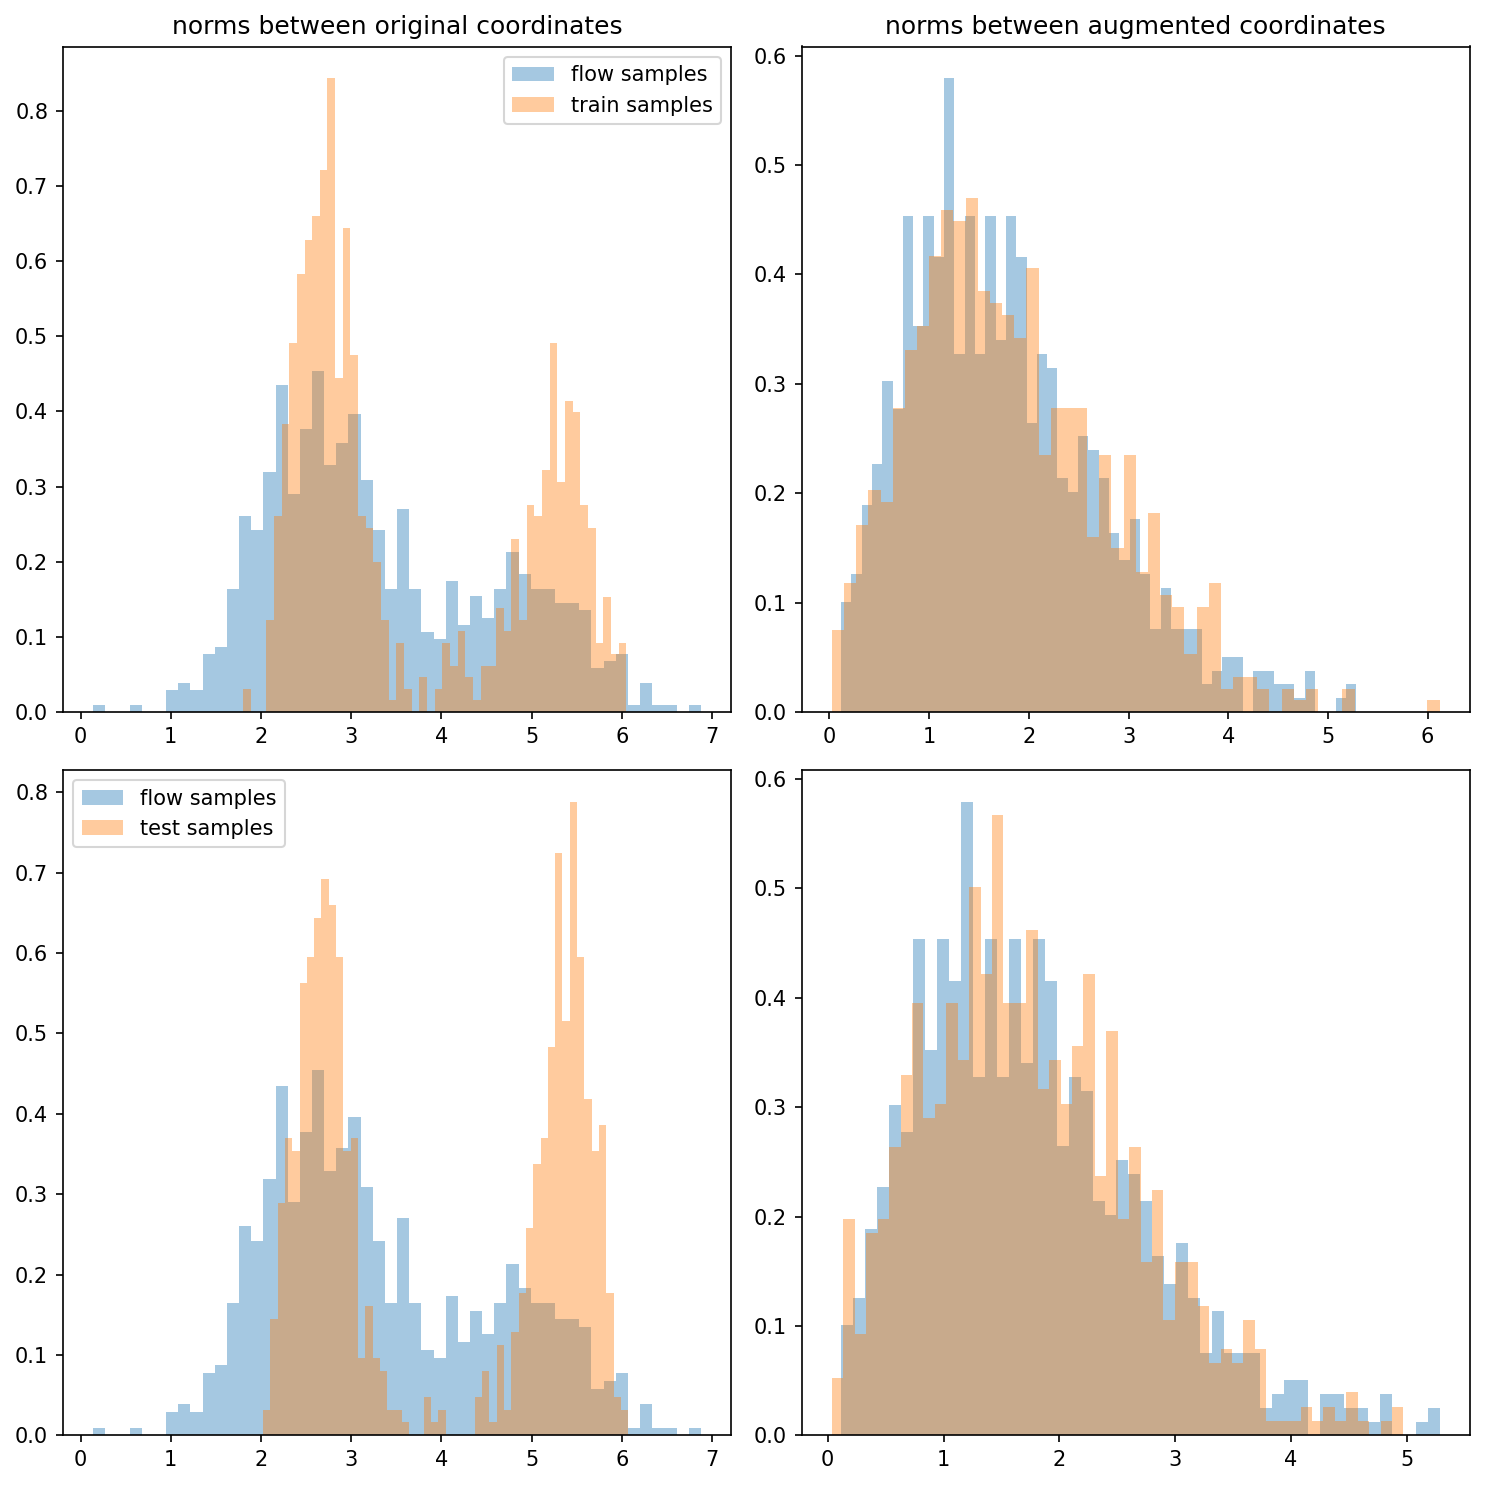

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:58<00:00,  3.43it/s]


{'eval_log_lik': Array(-19.86741, dtype=float32), 'eval_marginal_log_lik': Array(-9.47258, dtype=float32)}


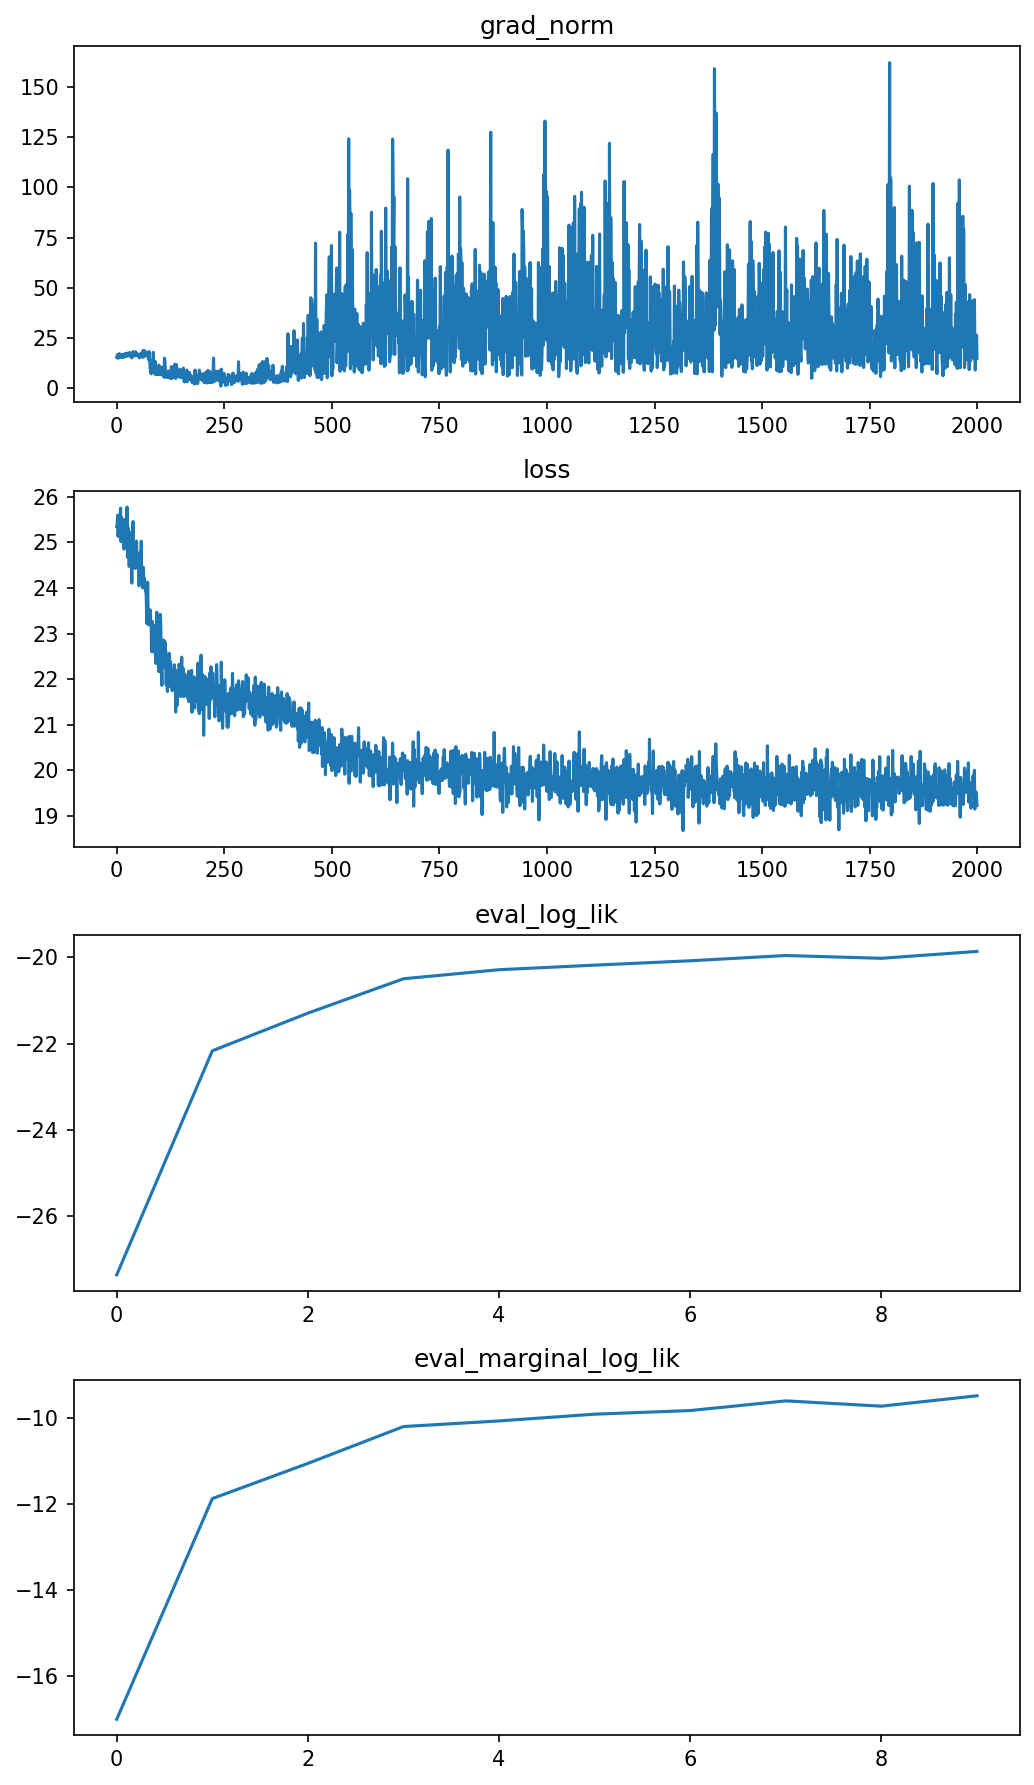

In [18]:
experiment_config = create_train_config(cfg, dim=2, n_nodes=4,
                                        load_dataset=load_dataset)

logger, params, log_prob_fn, sample_and_log_prob_fn = train(experiment_config)